# FIT5196 Assessment 2: Data Cleansing
#### Student Name: Tan Kah Wang
#### Student ID: 29442826

Date: 03/10/2018

Environment: Python 3.6.4 and Jupyter notebook
Libraries used: 
* pandas (for dataframes cleansing, included in Anaconda Python 3.6.4) 
* matplotlib.pylab (for exploratory data analysis, included in Anaconda Python 3.6.4) 
* numpy (for aggregation functions within dataframes, radians, cos, sin, arcsin, sqrt for haversine formula, included in Anaconda Python 3.6.4)
* sklearn.linear_model (for linear regression in imputing missing values, included in Anaconda Python 3.6.4)
* sklearn.model_selection (for testing and training linear regression model, included in Anaconda Python 3.6.4)
* sklearn.metrics (for calculation of mean-squared error in linear regression model, included in Anaconda Python 3.6.4)

## 1. Introduction

This assignment is about exploring and understanding the data, while identifying any syntactic, semantic or coverage errors and correct them before parsing the data out into an excel csv file. Graphical and non-graphical exploratory data analysis were first performed to better understand the data and identify potential errors. 

The dataset is about delivering packages using drones in Victoria, Australia and a description of the columns was provided as follows:

1. <b>Id</b> - A unique id for the delivery
2. <b>Drone Type</b> - A categorical attribute for the type of the drone. We know that each type of drone has three phases of flight ( namely takeOff ,onRoute , and Landing ). The drone may have different speeds at different phases. takeOff and Landing phases only take five minutes.
3. <b>Post Type</b> - A categorical attribute for the type of delivery (0:normal, 1:express)
4. <b>Package Weight</b> - The weight of the package
5. <b>Origin Region</b> - A categorical attribute representing the region for the origin of the delivery
6. <b>Destination Region</b> - A categorical attribute representing the region for the destination of the delivery
7. <b>Origin Latitude</b> - Latitude of the origin
8. <b>Origin Longitude</b> - Longitude of the origin
9. <b>Destination Latitude</b> - Latitude of the destination
10. <b>Destination Longitude</b> - Longitude of the destination
11. <b>Journey Distance</b> - Distance of the journey
12. <b>Departure Date</b> - Date of the departure
13. <b>Departure Time</b> - Time of the departure. We know that the delivery company has a specific rule to define morning (6:00:00 - 11:59:59), afternoon (12:00:00 - 20:59:59), and night (21:00 - 5:59:59)
14. <b>Travel Time</b> - Travel time (i.e., duration) of the journey
15. <b>Delivery Time</b> - The time of the delivery
16. <b>Delivery Fare</b> - Delivery fare. We know that the fare has a linear relation with some of the attributes of the dataset.

We are also given the information that the radius of the earth is 6378km.

## 2. Import libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from numpy import radians, cos, sin, arcsin, sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

## 3. Exploratory Data Analysis

We first read in the dataset and store it in variable `data`.
We then print out the first 10 rows of the data to have a rough idea of how the dataset looks like.

From the first 10 rows of the data, we have information on the following:
1. <b>Package Weight</b> - Most likely in grams as 39.026kg on a drone seems unreasonable
2. <b>Origin/Destination Latitude</b> - Towards the North direction as Victoria has latitude of around 37 degree South [1]
3. <b>Origin/Destination Longitude</b> - Towards the East direction as Victoria has longitude of around 144 degree East [1]
4. <b>Journey Distance</b> - Most likely in kilometres as it's more appropriate for a drone to travel 243 kilometres in 4 hours, than 243metres in 4 hours
5. <b>Departure Date</b> - Seems to be in yyyy-mm-dd format
6. <b>Departure/Delivery Time</b> - In hh:mm:ss 24 hour format
7. <b>Travel Time</b> - In minutes as <b>Travel Time</b> seems to be the time difference between <b>Delivery Time</b> and <b>Departure Time</b>, 11:04:36 to 15:03:32 is about 4 hours which is roughly 240minutes

In [2]:
data=pd.read_csv("./29442826.csv")
data.head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1647165072,2.0,0.0,39.026,37.0,10.0,-38.952201,144.703351,-37.317709,142.848358,243.882,2018-06-04,11:04:36,238.94,15:03:32,128.28
1,ID5409408834,2.0,1.0,36.443,23.0,39.0,-36.634606,143.201274,-37.287760,146.951739,341.399,2018-04-26,13:50:32,331.81,19:22:20,185.86
2,ID1860010758,1.0,0.0,27.170,5.0,13.0,-38.884370,145.426791,-36.758926,144.082466,264.476,2018-07-23,21:31:03,271.14,2:02:11,115.01
3,ID1704840028,2.0,0.0,13.864,42.0,45.0,-36.970133,148.265338,-36.599126,147.638070,69.519,2018-04-25,08:18:31,72.88,9:31:23,117.30
4,ID5788248903,1.0,1.0,18.974,2.0,24.0,-37.549350,145.105556,-37.154190,143.586818,141.405,2018-04-18,07:47:19,148.07,10:15:23,120.89
5,ID1428243193,1.0,0.0,17.618,21.0,28.0,-38.904771,146.985301,-37.871515,143.313257,340.384,2018-05-17,09:40:25,347.05,15:27:28,95.35
6,ID1474928624,1.0,0.0,40.308,18.0,8.0,-36.881003,143.002272,-37.871031,145.550539,250.905,2018-02-10,05:04:46,257.57,9:22:20,116.39
7,ID5831039536,2.0,1.0,32.490,34.0,30.0,-38.982812,143.195163,-37.900937,144.593470,171.364,2018-07-01,08:13:11,169.87,11:03:03,166.57
8,ID1757067202,2.0,0.0,24.965,19.0,17.0,-36.549566,148.132767,-38.209558,147.611392,190.453,2018-02-08,12:59:24,188.05,16:07:27,138.62
9,ID5532246471,3.0,1.0,22.140,6.0,39.0,-37.167673,144.671240,-37.357550,146.901174,198.681,2018-03-14,11:48:06,165.94,14:34:02,203.71


We know we are working on 39933 rows (i.e. 39933 deliveries) and 16 columns.

In [3]:
data.shape

(39933, 16)

With the `.info()` function, we know the columns' data type and data format:

1. <b>Id</b> - Categorical, in string format
2. <b>Drone Type</b> - Ordinal Categorical, in float format
3. <b>Post Type</b> - Ordinal Categorical, in float format
4. <b>Package Weight</b> - Continuous Numerical, in float format
5. <b>Origin Region</b> - Ordinal Categorical, in float format
6. <b>Destination Region</b> - Ordinal Categorical, in float format
7. <b>Origin Latitude</b> - Continuous Numerical, in float format
8. <b>Origin Longitude</b> - Continuous Numerical, in float format
9. <b>Destination Latitude</b> - Continuous Numerical, in float format
10. <b>Destination Longitude</b> - Continuous Numerical, in float format
11. <b>Journey Distance</b> - Continous Numerical, in float format
12. <b>Departure Date</b> - Discrete Numerical, in string format
13. <b>Departure Time</b> - Continuous Numerical, in string format
14. <b>Travel Time</b> - Continuous Numerical, in float format
15. <b>Delivery Time</b> - Continuous Numerical, in string format
16. <b>Delivery Fare</b> - Continuous Numerical, in float format

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 16 columns):
Id                       39909 non-null object
Drone Type               39923 non-null float64
Post Type                39913 non-null float64
Package Weight           39933 non-null float64
Origin Region            39923 non-null float64
Destination Region       39923 non-null float64
Origin Latitude          39933 non-null float64
Origin Longitude         39933 non-null float64
Destination Latitude     39933 non-null float64
Destination Longitude    39933 non-null float64
Journey Distance         39933 non-null float64
Departure Date           39933 non-null object
Departure Time           39933 non-null object
Travel Time              39893 non-null float64
Delivery Time            39933 non-null object
Delivery Fare            39903 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.9+ MB


We were told in the description of the columns that for <b> Departure Time </b>, the delivery company has a specific rule to define which categorized the timing into `morning`,`afternoon` and `night`.

Before exploring further into the dataset, we should create a new column that categorized <b> Departure Time </b> according to the rule in order to add more information into the dataset and explore possible relationship between the variables.

We do this by writing a function that will categorized <b>Departure Time</b> into `morning` represented by `1` if it's between 06:00:00 to 11:59:59, `afternoon` represented by `2` if it's between 12:00:00 to 20:59:59 or `night` represented by `3` if it's between 21:00:00 to 05:59:59. A new column <b> Time Period </b> which is of ordinal categorical and in float format, will store this information.

In [5]:
# we first write a function that returns 'morning','afternoon' or 'night' based on 'Departure Time'
def cat_time(time):
    # split 'Departure Time' and categorized based on the hour
    hour=int(time.split(':')[0])
    if hour>=6 and hour<=11:
        return 1
    elif hour>=12 and hour<=20:
        return 2
    else:
        return 3
# create a column 'Time Period' by applying the cat_time function on 'Departure Time'  
data['Time Period']=data['Departure Time'].apply(cat_time)
data.head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
0,ID1647165072,2.0,0.0,39.026,37.0,10.0,-38.952201,144.703351,-37.317709,142.848358,243.882,2018-06-04,11:04:36,238.94,15:03:32,128.28,1
1,ID5409408834,2.0,1.0,36.443,23.0,39.0,-36.634606,143.201274,-37.287760,146.951739,341.399,2018-04-26,13:50:32,331.81,19:22:20,185.86,2
2,ID1860010758,1.0,0.0,27.170,5.0,13.0,-38.884370,145.426791,-36.758926,144.082466,264.476,2018-07-23,21:31:03,271.14,2:02:11,115.01,3
3,ID1704840028,2.0,0.0,13.864,42.0,45.0,-36.970133,148.265338,-36.599126,147.638070,69.519,2018-04-25,08:18:31,72.88,9:31:23,117.30,1
4,ID5788248903,1.0,1.0,18.974,2.0,24.0,-37.549350,145.105556,-37.154190,143.586818,141.405,2018-04-18,07:47:19,148.07,10:15:23,120.89,1
5,ID1428243193,1.0,0.0,17.618,21.0,28.0,-38.904771,146.985301,-37.871515,143.313257,340.384,2018-05-17,09:40:25,347.05,15:27:28,95.35,1
6,ID1474928624,1.0,0.0,40.308,18.0,8.0,-36.881003,143.002272,-37.871031,145.550539,250.905,2018-02-10,05:04:46,257.57,9:22:20,116.39,3
7,ID5831039536,2.0,1.0,32.490,34.0,30.0,-38.982812,143.195163,-37.900937,144.593470,171.364,2018-07-01,08:13:11,169.87,11:03:03,166.57,1
8,ID1757067202,2.0,0.0,24.965,19.0,17.0,-36.549566,148.132767,-38.209558,147.611392,190.453,2018-02-08,12:59:24,188.05,16:07:27,138.62,2
9,ID5532246471,3.0,1.0,22.140,6.0,39.0,-37.167673,144.671240,-37.357550,146.901174,198.681,2018-03-14,11:48:06,165.94,14:34:02,203.71,1


Since we know there were 39933 rows in total, there are null values (i.e. Coverage errors) in the following columns:
1. <b>Id</b> - 24
2. <b>Drone Type</b> - 10
3. <b>Post Type</b> - 20
4. <b>Origin Region</b> - 10
5. <b>Destination Region</b> - 10
6. <b>Travel Time</b> - 40
7. <b>Delivery Fare</b> - 30

In [6]:
data.isnull().sum()

Id                       24
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
Time Period               0
dtype: int64

### 3.1 Numerical Variables EDA

If we look at the summary of the columns that are in numerical float format, we can understand the following for each column:

1. <b>Drone Type</b> - 3 types of Drone, 50% are of type 1, 25% of type 2 and 25% of type 3
2. <b>Post Type</b> - 50% type 0, 50% type 1
3. <b>Package Weight</b> - 50% is 23.05grams, 75% is 32.229grams, but max is 50.995grams. This might indicate a left-skewed distribution, whereas the mean (23.219) is more than the median (23.055), which suggests otherwise.
4. <b>Origin Region</b> - Categorical representation from 1.0 to 47.0, indicating 47 regions.
5. <b>Destination Region</b> - Similar categorical representation as Origin Region from 1.0 to 47.0, indicating 47 regions.
6. <b>Origin Latitude</b> - Max is a positive 38.93 which indicates a possible syntactic error as we have previously identified Origin Latitude is towards the North hence, should have a negative value 
7. <b>Origin Longitude</b> - Min is a negative 148.33 which indicates a possible syntactic error as we have previously identified Origin Longitude is towards the East hence, should have a positive value 
8. <b>Destination Latitude</b> - Max is a positive 39.01 which indicates a possible syntactic error as we have previously identified Origin Latitude is towards the North hence, should have a negative value 
9. <b>Destination Longitude</b> - Min is a negative 148.29 which indicates a possible syntactic error as we have previously identified Origin Longitude is towards the East hence, should have a positive value 
10. <b>Journey Distance/Travel Time</b> - Seems to have a similar distribution, indicating possible correlation between them
11. <b>Travel Time</b> - Min is 7.55 minutes but we are told the takeOff and Landing phases of each drone take 5 minutes each, meaning the total travel time should be at least 10 minutes, hence possible semantic error
12. <b>Delivery Fare</b> - Mean of 144.02, 75% at 167.58 but max is a 1174.55, indicating possible outliers in this column

In [7]:
data.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Time Period
count,39923.000000,39913.000000,39933.000000,39923.000000,39923.000000,39933.000000,39933.000000,39933.000000,39933.000000,39933.000000,39893.000000,39903.000000,39933.000000
mean,1.693610,0.295944,23.218876,24.086817,23.996543,-37.714625,145.487280,-37.713670,145.479734,215.928647,210.991432,144.017901,2.119726
std,0.779802,0.456472,10.638854,13.559722,13.563550,1.849479,6.730717,1.850702,6.736279,111.920139,107.400441,58.179104,0.782724
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006969,-148.326299,-39.006969,-148.290294,0.858000,7.550000,69.950000,1.000000
25%,1.000000,0.000000,14.071000,12.000000,12.000000,-38.415744,144.163057,-38.415134,144.161760,129.502000,128.240000,109.520000,1.000000
50%,1.000000,0.000000,23.055000,24.000000,24.000000,-37.760241,145.665964,-37.763268,145.652279,204.426000,199.070000,138.020000,2.000000
75%,2.000000,1.000000,32.229000,36.000000,36.000000,-37.120834,147.069006,-37.115198,147.070571,290.402000,280.470000,167.580000,3.000000
max,3.000000,1.000000,50.995000,47.000000,47.000000,38.932827,148.450220,39.000974,148.450220,525.763000,532.430000,1174.550000,3.000000


We then try to explore the data further using graphical method by plotting a boxplot on the 12 numerical float columns:

1. <b>Origin Latitude</b> - Syntactic error as observed earlier
2. <b>Origin Longitude</b> - Syntactic error as observed earlier
3. <b>Destination Latitude</b> - Syntactic error as observed earlier
4. <b>Destination Longitude</b> - Syntactic error as observed earlier
5. <b>Travel Time</b> - Possible outliers
6. <b>Delivery Fare</b> - Possible outliers
7. <b>Travel Time, Delivery Fare</b> - Similar distribution as observed earlier

And we can't really tell much for the remaining columns.

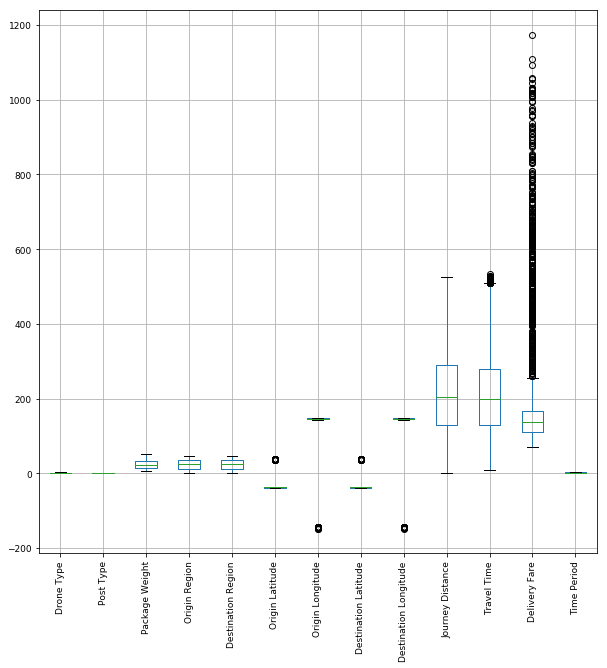

In [8]:
data.boxplot(rot=90,fontsize=9,figsize=(10,10))

### 3.1.1 Numerical Variables EDA - Travel Time

We try to explore specifically into <b>Travel Time</b> to see those points we spotted in the plot in Section 3.1 are indeed outliers. From the plot in Section 3.1, we noticed those points have <b>Travel Time</b> above 500.

Looking at the first 10 rows with <b>Travel Time</b> > 500, we noticed that their <b>Journey Distance</b> are around 500km as well. We will explain whether they are really outliers in Section 3.3.1 when we discuss the possible relationship between <b>Journey Distance</b> and <b>Travel Time</b>.

In [9]:
data[data['Travel Time']>500].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
1761,ID1135195343,1.0,0.0,8.855,34.0,19.0,-38.802383,143.058478,-36.517879,148.040264,507.236,2018-05-16,11:51:27,513.90,20:25:20,106.03,1
2032,ID1621992809,1.0,0.0,46.658,42.0,34.0,-36.929697,148.325184,-38.958665,143.164087,506.135,2018-06-14,23:49:07,512.80,8:21:54,1057.15,3
2100,ID5278735214,1.0,1.0,29.208,10.0,11.0,-37.229677,142.792598,-38.716958,148.192998,501.880,2018-06-02,10:04:41,508.55,18:33:14,148.01,1
3056,ID1601967657,1.0,0.0,22.850,19.0,44.0,-36.634381,148.167170,-37.852329,142.771020,496.950,2018-02-24,15:47:23,503.62,0:11:00,115.64,2
3317,ID1858250606,1.0,0.0,12.296,19.0,34.0,-36.536098,148.120365,-38.935163,143.345019,497.936,2018-01-28,00:10:48,504.60,8:35:24,129.74,3
4010,ID1355274337,1.0,0.0,25.823,34.0,42.0,-38.856676,143.248727,-36.885179,148.315876,496.308,2018-01-09,23:06:01,502.98,7:28:59,135.16,3
4019,ID1708664784,1.0,0.0,17.684,18.0,42.0,-36.963358,142.781339,-36.904668,148.330907,493.768,2018-02-04,10:24:53,500.43,18:45:18,112.29,1
6131,ID1134451983,1.0,0.0,30.651,44.0,42.0,-37.761434,142.883565,-36.981346,148.414328,496.850,2018-06-17,14:44:14,503.52,23:07:45,119.33,2
6582,ID1165578831,1.0,0.0,16.621,16.0,44.0,-37.528632,148.382114,-37.924073,142.793471,493.944,2018-05-06,15:02:52,500.61,23:23:28,121.32,2
6850,ID1141310938,1.0,0.0,29.110,12.0,19.0,-38.253239,142.817451,-36.514905,148.008646,498.176,2018-06-20,23:14:28,504.84,7:39:18,131.23,3


### 3.1.2 Numerical Variables EDA - Package Weight

We will try to explore the distribution of <b>Package Weight</b> in greater detail as we have found in Section 3.1 that 50% of the <b>Package Weight</b> is 23.05grams, 75% is 32.229grams, but max is 50.995grams. This might indicate a left-skewed distribution, whereas the mean (23.219) is more than the median (23.055), which suggests otherwise.

Plotting a histogram of <b>Package Weight</b>, we see that there were no deliveries of <b>Package Weight</b> from 41.0g to 46.0g. Majority of the deliveries were for <b>Package Weight</b> smaller than 41.0g.

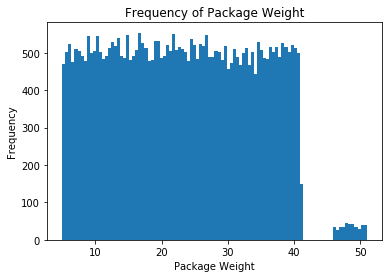

In [10]:
plt.hist(data["Package Weight"],bins=100)
plt.xlabel('Package Weight')
plt.ylabel('Frequency')
plt.title('Frequency of Package Weight')
plt.show()

In [11]:
data.loc[(data['Package Weight']>=41.0) & (data['Package Weight']<=46.0),:]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period


Let's do a boxplot for those with <b>Package Weight</b> less than 41.0g.

Notice that the <b>Delivery Fare</b> seems to not have any outliers as compared to when we did a boxplot across the whole data.

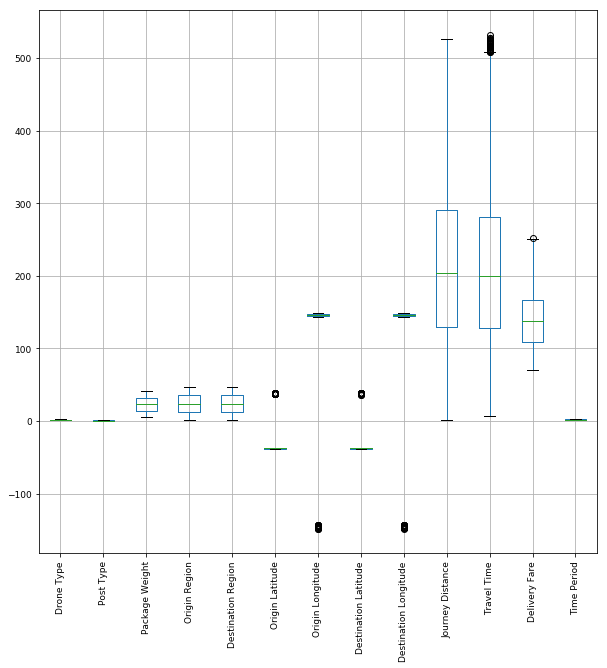

In [12]:
data.loc[data['Package Weight']<41.0,:].boxplot(rot=90,fontsize=9,figsize=(10,10))

Let's do a boxplot for those with <b>Package Weight</b> greater than 46.0g.

Notice that the <b>Delivery Fare</b> seems to have lesser outliers compared to when we did boxplot for the whole data earlier on and it's values are more spread out (i.e. higher standard deviation).

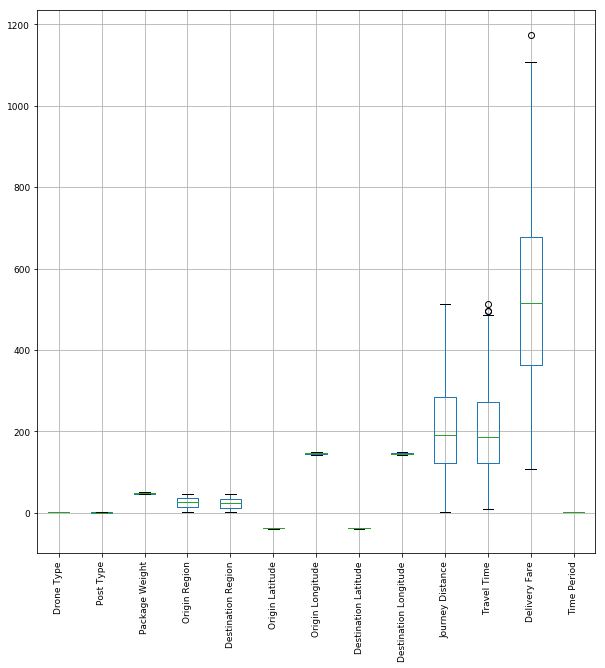

In [13]:
data.loc[data['Package Weight']>46.0,:].boxplot(rot=90,fontsize=9,figsize=(10,10))

### 3.1.3 Numerical Variables EDA - Delivery Fare

We try to explore specifically into <b>Delivery Fare</b> to see those points we spotted in the plot in Section 3.1 are indeed outliers. 

From the lecture notes in Week 8, for a point x to be classified as an outlier based on boxplots:
- Lower outlier if x < Q1 - 1.5 (IQR)
- Upper outlier if x > Q3 + 1.5 (IQR)<br>
,where Q1 refers to 25% quartile, Q3 refers to 75% quartile and IQR refers to Interquartile range (Q3 - Q1)

We know from Section 3.1 that Q1 is 109.52, Q3 is 167.58. Hence IQR = Q3 - Q1 = 58.06.
Hence, point x is an outlier in <b>Delivery Fare</b> if:
- Lower outlier if x < 109.52 - 1.5 (58.06) = 22.43
- Upper outlier if x > 167.58 + 1.5 (58.06) = 254.67

We see that there are no lower outliers in <b>Delivery Fare</b>.

In [14]:
data.loc[data['Delivery Fare']<22.43,:].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period


Whereas, there are 362 cases of possible upper outliers.

In [15]:
# returns number of possible upper outliers
print(len(data.loc[data['Delivery Fare']>254.67,:]))
# returns first 10 rows of possible upper outliers
data.loc[data['Delivery Fare']>254.67,:].head(10)

362


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
185,ID1419817673,2.0,0.0,46.004,9.0,19.0,-38.858992,144.295380,-36.520724,148.339056,441.092,2018-06-03,21:59:49,426.75,5:06:34,957.84,3
449,ID1787580272,3.0,0.0,48.012,22.0,5.0,-37.168393,145.594925,-38.669468,145.439778,167.650,2018-02-16,02:52:18,141.12,5:13:25,500.69,3
472,ID1183058545,2.0,0.0,49.724,34.0,19.0,-38.774657,143.177588,-36.588407,148.304793,512.972,2018-06-05,01:59:26,495.21,10:14:38,1174.55,3
500,ID1909984883,1.0,0.0,46.166,23.0,6.0,-36.588223,143.268785,-37.106783,144.787058,147.049,2018-02-12,18:24:55,153.72,20:58:38,358.01,2
548,ID5685317708,1.0,1.0,47.744,37.0,33.0,-38.965106,144.684500,-38.324803,145.893500,126.998,2018-04-23,17:54:38,133.67,20:08:18,369.36,2
783,ID1428966490,2.0,0.0,46.998,36.0,20.0,-37.652313,143.971841,-37.854522,146.985546,266.187,2018-02-17,21:34:20,260.18,1:54:30,643.85,3
848,ID1574718472,1.0,0.0,46.616,3.0,18.0,-37.302362,143.965579,-36.844481,143.027114,97.699,2018-07-01,15:09:17,104.37,16:53:39,268.37,2
940,ID5865693553,1.0,1.0,48.657,6.0,36.0,-37.313296,144.711658,-37.810267,143.997774,83.836,2018-02-18,19:39:56,90.50,21:10:26,288.94,2
1129,ID1270092597,1.0,0.0,48.203,44.0,15.0,-37.789252,142.831628,-36.560007,145.334941,260.800,2018-07-23,23:19:51,267.47,3:47:19,603.13,3
1159,ID5223959262,2.0,1.0,49.108,35.0,24.0,-39.001370,146.157627,-37.035871,143.552858,316.280,2018-06-18,07:22:03,307.89,12:29:56,783.45,1


If we were to observe the <b>Package Weight</b> for the first 10 rows, notice that they were all above 46.0g which seem to coincide with what we have found in Section 3.1.2 that <b>Package Weight</b> is either below 41.0g or above 46.0g.

Checking with the rest of the rows, these 362 rows indeed have <b>Package Weight</b> greater than 46.0g.

In [16]:
data.loc[(data['Delivery Fare']>254.67) & (data['Package Weight']<=46.0),:]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period


Looking at the boxplot we did in Section 3.1.2 with data consisting only of <b>Package Weight</b> greater than 46.0g, the number of possible outliers seem to have reduced significantly and the distribution is wider with higher standard deviation.

If we were to look at the distribution of the data consisting only of <b>Package Weight</b> greater than 46.0g, Q1 of <b>Delivery Fare</b> is now 364.19, Q3 is now 677.1525.

Hence we recalculate the IQR and see if there are any possible outliers in this group.
IQR = Q3 - Q1 = 312.9625<br>
Hence, point x is an outlier in <b>Delivery Fare</b> if:
- Lower outlier if x < 364.19 - 1.5 (312.9625) = -105.2537
- Upper outlier if x > 677.1525 + 1.5 (312.9625) = 1146.596

We see from the distribution that the max <b>Delivery Fare</b> is 1174.55 which makes it a possible upper outlier since it's higher than Q3 + 1.5 (IQR).

In [17]:
data.loc[data['Package Weight']>46.0,:].describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Time Period
count,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,398.000000,400.000000,400.00000
mean,1.700000,0.29250,48.554825,25.330000,23.93250,-37.777077,145.672029,-37.756508,145.531365,208.356887,203.868844,534.585050,2.14750
std,0.794719,0.45548,1.421115,13.699646,13.24165,0.761285,1.669101,0.782773,1.692352,113.434839,108.462988,227.784373,0.77927
min,1.000000,0.00000,46.004000,1.000000,1.00000,-39.004869,142.784194,-39.006604,142.787742,1.747000,8.410000,107.240000,1.00000
25%,1.000000,0.00000,47.405250,13.750000,13.00000,-38.443142,144.239216,-38.436511,144.104180,122.067750,122.665000,364.190000,2.00000
50%,1.000000,0.00000,48.571000,26.000000,24.00000,-37.750066,145.770021,-37.793936,145.498378,192.291500,187.285000,514.105000,2.00000
75%,2.000000,1.00000,49.729500,37.000000,35.00000,-37.167699,147.014445,-37.109664,146.899825,283.599750,271.102500,677.152500,3.00000
max,3.000000,1.00000,50.995000,47.000000,47.00000,-36.511089,148.446650,-36.510330,148.450220,512.972000,512.800000,1174.550000,3.00000


Hence, we have identified that <b>Delivery Fare</b> contains only one outlier.

In [18]:
data.loc[data['Delivery Fare']>1146.596,:]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
472,ID1183058545,2.0,0.0,49.724,34.0,19.0,-38.774657,143.177588,-36.588407,148.304793,512.972,2018-06-05,01:59:26,495.21,10:14:38,1174.55,3


### 3.2 Categorical Variables EDA

We then look at the summary of the columns that are in categorical string format, we can understand the following for each column:

1. <b>Id</b> - ID1614045163 has count of 2, which indicates semantic error as each Id is supposed to be unique
2. <b>Departure Date</b> - Most frequent depature date is 2018-02-10 at 243 counts
3. <b>Departure Time</b> - Most frequent depature time is 11:59:24 at 6 counts
4. <b>Delivery Time</b> - Most frequent delivery time is 6:54:54 at 5 counts

In [19]:
data.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,39909,39933,39933,39933
unique,39873,276,31972,32006
top,ID5924428494,2018-02-10,11:59:24,22:55:14
freq,2,243,6,5


### 3.2.1 Categorical Variables EDA - Departure Date

At the beginning of the EDA in Section 3, by looking at the first 10 rows of the data, we suspect that the <b>Departure Date</b> is in the format of yyyy-mm-dd format.

However, if we were to look at all the values of <b>Departure Date</b> in the data, we noticed that there were some entries of count 1 whereby the format is in yyyy-dd-mm instead (e.g. 2018-25-02). 

Since the majority of the dates were in yyyy-mm-dd format, hence we can conclude <b>Departure Date</b> contains a syntactic error whereby the format of the dates are inconsistent. 

In [20]:
data["Departure Date"].value_counts()

2018-02-10    243
2018-04-05    241
2018-03-28    238
2018-06-09    234
2018-07-09    231
2018-03-19    230
2018-03-17    226
2018-06-16    226
2018-06-13    225
2018-06-05    225
2018-01-09    225
2018-03-27    224
2018-07-01    224
2018-03-23    223
2018-05-16    223
2018-06-06    223
2018-06-04    222
2018-01-12    221
2018-07-26    220
2018-03-07    220
2018-06-07    220
2018-07-17    220
2018-06-03    219
2018-02-25    219
2018-01-13    219
2018-04-06    219
2018-03-03    219
2018-05-08    218
2018-04-17    218
2018-05-23    218
             ... 
2018-13-06      1
2018-27-06      1
2018-20-07      1
2018-14-05      1
2018-18-04      1
2018-20-03      1
2018-21-04      1
2018-23-03      1
2018-19-06      1
2018-25-07      1
2018-14-04      1
2018-18-01      1
2018-16-01      1
2018-15-03      1
2018-28-01      1
2018-28-04      1
2018-18-02      1
2018-26-05      1
2018-16-04      1
2018-30-06      1
2018-15-07      1
2018-25-02      1
2018-19-02      1
2018-25-03      1
2018-20-06

### 3.3 Relationship between Variables

Next, we explore if the variables have any relationship between them.

We first explore the correlation between the numerical valued variables in the dataset.

Looking at the correlation coefficient values, we know the following:

1. <b>Drone Type</b> might be correlated with <b>Delivery Fare</b> with correlation coefficient of 0.512
2. <b>Post Type</b> might be correlated with <b>Delivery Fare</b> with correlation coefficient of 0.298
3. <b>Package Weight</b> might be correlated with <b>Delivery Fare</b> with correlation coefficient of 0.173
4. <b>Journey Distance</b> is highly correlated with <b>Travel Time</b> with correlation coefficient of 0.985
5. <b>Journey Distance</b> might be correlated with <b>Delivery Fare</b> with correlation coefficient of 0.176
6. <b>Delivery Fare</b> might be correlated with <b>Time Period</b> with correlation coefficient of 0.159

In [21]:
data.corr()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Time Period
Drone Type,1.000000,0.002951,-0.004816,-0.007538,-0.003657,-0.003381,0.000360,-0.004035,0.000200,0.004334,-0.139235,0.511833,0.007384
Post Type,0.002951,1.000000,-0.000283,-0.005649,-0.009036,0.008904,-0.007081,-0.002807,-0.002901,0.008464,0.008042,0.297859,-0.005113
Package Weight,-0.004816,-0.000283,1.000000,0.000394,-0.002338,0.000754,-0.001722,-0.012340,0.009557,0.000660,0.001631,0.173411,0.001946
Origin Region,-0.007538,-0.005649,0.000394,1.000000,-0.003231,-0.030953,0.027028,-0.001550,-0.000541,-0.007363,-0.006229,-0.003363,-0.003226
Destination Region,-0.003657,-0.009036,-0.002338,-0.003231,1.000000,0.007545,-0.005179,-0.029779,0.032470,0.005541,0.005048,-0.004948,0.000799
Origin Latitude,-0.003381,0.008904,0.000754,-0.030953,0.007545,1.000000,-0.878603,-0.001469,0.000624,0.016160,0.016558,0.004507,0.008317
Origin Longitude,0.000360,-0.007081,-0.001722,0.027028,-0.005179,-0.878603,1.000000,-0.000105,0.000650,0.002187,0.001699,0.000006,-0.003814
Destination Latitude,-0.004035,-0.002807,-0.012340,-0.001550,-0.029779,-0.001469,-0.000105,1.000000,-0.877988,0.021049,0.021803,-0.000570,-0.002900
Destination Longitude,0.000200,-0.002901,0.009557,-0.000541,0.032470,0.000624,0.000650,-0.877988,1.000000,0.001188,0.001072,-0.000192,0.001698
Journey Distance,0.004334,0.008464,0.000660,-0.007363,0.005541,0.016160,0.002187,0.021049,0.001188,1.000000,0.985423,0.175787,0.000750


### 3.3.1 Relationship between Journey Distance & Travel Time

Note that earlier on, we observed that the distribution between <b>Journey Distance</b> and <b>Travel Time</b> is similar and a correlation coefficient of 0.985 strongly suggested that these two columns are highly correlated with each other, we can plot these 2 variables and indeed we see an increase in <b>Journey Distance</b> leads to increasing <b>Travel Time</b>.

Hence we conclude this two variables are indeed correlated.

Note that we can see 3 distinct lines, which could possibly suggest the 3 drone types.

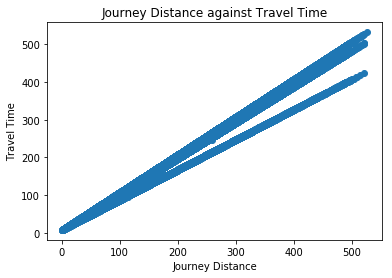

In [22]:
plt.scatter(data['Journey Distance'],data['Travel Time'])
plt.xlabel('Journey Distance')
plt.ylabel('Travel Time')
plt.title('Journey Distance against Travel Time')
plt.show()

Referring back to Section 3.1.1 when we were discussing if <b>Travel Time </b> contains outliers, since now we know that <b>Travel Time</b> is indeed correlated to <b>Journey Distance</b>, we can plot those <b>Travel Time</b> which we suspect are outliers (i.e. >500minutes) with it's <b>Journey Distance</b>

From the plot, we can generally see a positive linear relationship between <b>Travel Time</b> and <b>Journey Distance</b>.

Hence, we can conclude that those <b>Travel Time</b> which we suspect are outliers (i.e. >500minutes) are not outliers in this dataset.

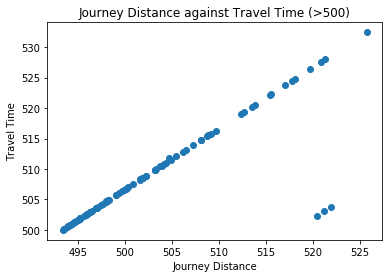

In [23]:
plt.scatter('Journey Distance','Travel Time',data=data.loc[(data['Travel Time']>500),:])
plt.xlabel('Journey Distance')
plt.ylabel('Travel Time')
plt.title('Journey Distance against Travel Time (>500)')
plt.show()

### 3.3.2 Relationship between Origin Region & Origin Latitude/Origin Longitude

It's logical to suspect that <b>Origin Region</b> might be a categorical attribute that represents <b>Origin Latitude</b> and <b>Origin Longitude</b>. 

We try grouping the means of <b>Origin Latitude</b> and <b>Origin Longitude</b> by <b>Origin Region</b>, and sorting the results after that to see if each <b>Origin Region</b> does indeed represents a unique set of values of <b>Origin Latitude</b> and <b>Origin Longitude</b>

Observe that indeed each <b>Origin Region</b> is uniquely represented by a set of values of <b>Origin Latitude</b> and <b>Origin Longitude</b>.

In [24]:
data.loc[:,['Origin Latitude','Origin Longitude']].groupby(data['Origin Region']).mean().sort_values(by=['Origin Latitude','Origin Longitude'])

,Origin Latitude,Origin Longitude
Origin Region,,
35.0,-38.938321,145.983004
21.0,-38.907632,146.897653
37.0,-38.839300,144.433446
34.0,-38.833316,143.220218
5.0,-38.789187,145.392713
40.0,-38.761527,147.184557
9.0,-38.725396,144.170508
11.0,-38.655282,148.172540
25.0,-38.548308,144.767009


We can try visualising each <b>Origin Latitude</b> or <b>Origin Longitude</b> across all <b>Origin Region</b>.

Notice that from both the plots below, each <b>Origin Region</b> has an unique range of both <b>Origin Latitude</b> and <b>Origin Longitude</b>. Hence, we can conclude that the <b>Origin Region</b> is a categorical representation of both <b>Origin Latitude</b> and <b>Origin Longitude</b>.

Notice also that in both plots, there are some possible semantic errors in <b>Origin Region</b> as their <b>Origin Latitude</b> or <b>Origin Longitude</b> did not match that under the particular <b>Origin Region</b>.

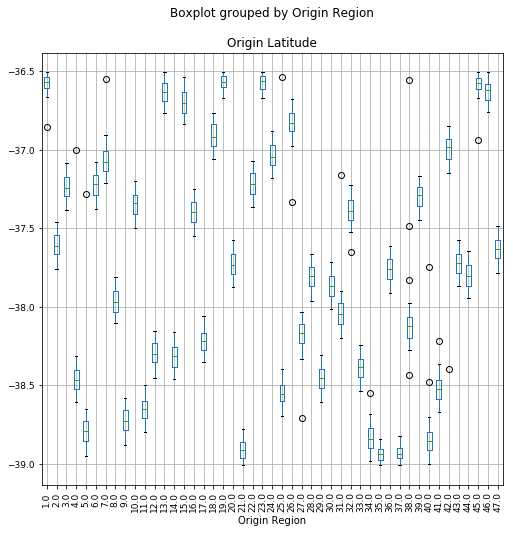

In [25]:
data.loc[data['Origin Latitude']<0,:].boxplot('Origin Latitude',by='Origin Region',rot=90,fontsize=9,figsize=(8,8))

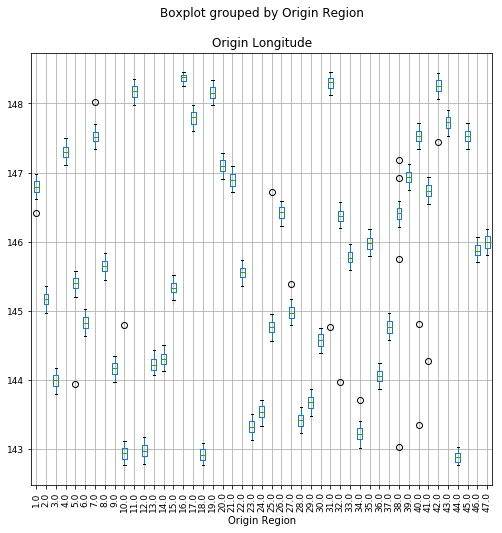

In [26]:
data.loc[data['Origin Longitude']>0,:].boxplot('Origin Longitude',by='Origin Region',rot=90,fontsize=9,figsize=(8,8))

### 3.3.3 Relationship between Destination Region & Destination Latitude/Destination Longitude

Similarly, we also suspect that <b>Destination Region</b> might be a categorical attribute that represents <b>Destination Latitude</b> and <b>Destination Longitude</b>. 

We try grouping the means of <b>Destination Latitude</b> and <b>Destination Longitude</b> by <b>Destination Region</b>, and sorting the results after that to see if each <b>Destination Region</b> does indeed represents a unique set of values of <b>Destination Latitude</b> and <b>Destination Longitude</b>

Observe that indeed each <b>Destination Region</b> is uniquely represented by a set of values of <b>Destination Latitude</b> and <b>Destination Longitude</b>. Hence we can conclude that <b>Destination Region</b> is indeed the categorical representation of <b>Destination Latitude</b> and <b>Destination Longitude</b>

In [27]:
data.loc[:,['Destination Latitude','Destination Longitude']].groupby(data['Destination Region']).mean().sort_values(by=['Destination Latitude','Destination Longitude'])

,Destination Latitude,Destination Longitude
Destination Region,,
37.0,-38.927942,144.771475
21.0,-38.911021,146.894034
40.0,-38.847397,147.533662
34.0,-38.836779,143.212536
35.0,-38.752060,145.285016
9.0,-38.727457,144.169462
5.0,-38.705533,145.051474
11.0,-38.655478,148.175297
25.0,-38.548866,144.759895


We can try visualising each <b>Destination Latitude</b> or <b>Destination Longitude</b> across all <b>Destination Region</b>.

Notice that from both the plots below, each <b>Destination Region</b> has an unique range of both <b>Destination Latitude</b> and <b>Destination Longitude</b>. Hence, we can conclude that the <b>Destination Region</b> is a categorical representation of both <b>Destination Latitude</b> and <b>Destination Longitude</b>.

Notice also that in both plots, there are some possible semantic errors in <b>Destination Region</b> as their <b>Destination Latitude</b> or <b>Destination Longitude</b> did not match that under the particular <b>Destination Region</b>.

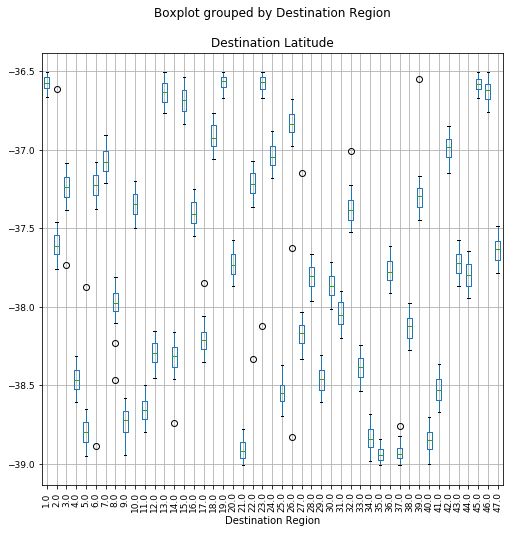

In [28]:
data.loc[data['Destination Latitude']<0,:].boxplot('Destination Latitude',by='Destination Region',rot=90,fontsize=9,figsize=(8,8))

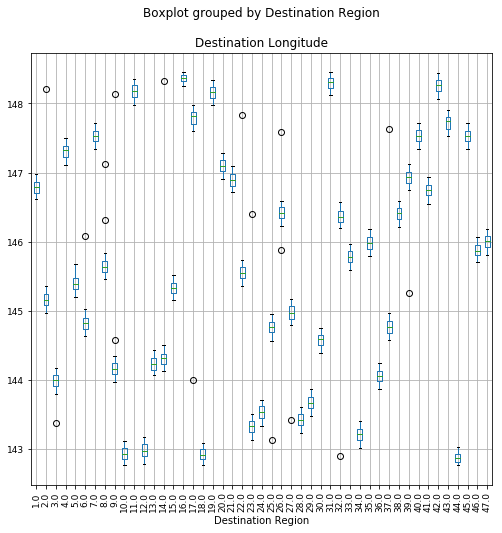

In [29]:
data.loc[data['Destination Longitude']>0,:].boxplot('Destination Longitude',by='Destination Region',rot=90,fontsize=9,figsize=(8,8))

### 3.3.4 Relationship between Departure Time, Delivery Time & Travel Time

It is logical to suspect that the time difference between <b>Delivery Time</b> and <b>Departure Time</b> should be equal to <b>Travel Time</b> since it represents the duration of the journey. We can check if this is true by using the time difference between <b>Delivery Time</b> and <b>Departure Time</b> in minutes, and compared it with the value of <b>Travel Time</b>.

Since <b>Delivery Time</b> and <b>Departure Time</b> are both in string format, we first convert them into minutes and creating new columns <b>Delivery Minutes</b> and <b>Departure Minutes</b>. We then create another column <b>Calculated Time</b> by taking the difference between <b>Delivery Minutes</b> and <b>Departure Minutes</b>.

In [30]:
# create a function to convert a timestamp in string to minutes
def time_to_min(timestamp):
    [h,m,s]=timestamp.split(':')
    return (int(h)*60)+int(m)+(int(s)/60)
# Create a column 'Delivery Minutes' which is 'Delivery Time' in minutes
data['Delivery Minutes']=data['Delivery Time'].apply(time_to_min)
# Create a column 'Departure Minutes' which is 'Departure Time' in minutes
data['Departure Minutes']=data['Departure Time'].apply(time_to_min)
# create a column 'Calculated Time' using 'Delivery Minutes' - 'Departure Minutes'
data['Calculated Time']=data['Delivery Minutes']-data['Departure Minutes']

# print out the first 10 rows of the data with the new columns
data.head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Delivery Minutes,Departure Minutes,Calculated Time
0,ID1647165072,2.0,0.0,39.026,37.0,10.0,-38.952201,144.703351,-37.317709,142.848358,243.882,2018-06-04,11:04:36,238.94,15:03:32,128.28,1,903.533333,664.600000,238.933333
1,ID5409408834,2.0,1.0,36.443,23.0,39.0,-36.634606,143.201274,-37.287760,146.951739,341.399,2018-04-26,13:50:32,331.81,19:22:20,185.86,2,1162.333333,830.533333,331.800000
2,ID1860010758,1.0,0.0,27.170,5.0,13.0,-38.884370,145.426791,-36.758926,144.082466,264.476,2018-07-23,21:31:03,271.14,2:02:11,115.01,3,122.183333,1291.050000,-1168.866667
3,ID1704840028,2.0,0.0,13.864,42.0,45.0,-36.970133,148.265338,-36.599126,147.638070,69.519,2018-04-25,08:18:31,72.88,9:31:23,117.30,1,571.383333,498.516667,72.866667
4,ID5788248903,1.0,1.0,18.974,2.0,24.0,-37.549350,145.105556,-37.154190,143.586818,141.405,2018-04-18,07:47:19,148.07,10:15:23,120.89,1,615.383333,467.316667,148.066667
5,ID1428243193,1.0,0.0,17.618,21.0,28.0,-38.904771,146.985301,-37.871515,143.313257,340.384,2018-05-17,09:40:25,347.05,15:27:28,95.35,1,927.466667,580.416667,347.050000
6,ID1474928624,1.0,0.0,40.308,18.0,8.0,-36.881003,143.002272,-37.871031,145.550539,250.905,2018-02-10,05:04:46,257.57,9:22:20,116.39,3,562.333333,304.766667,257.566667
7,ID5831039536,2.0,1.0,32.490,34.0,30.0,-38.982812,143.195163,-37.900937,144.593470,171.364,2018-07-01,08:13:11,169.87,11:03:03,166.57,1,663.050000,493.183333,169.866667
8,ID1757067202,2.0,0.0,24.965,19.0,17.0,-36.549566,148.132767,-38.209558,147.611392,190.453,2018-02-08,12:59:24,188.05,16:07:27,138.62,2,967.450000,779.400000,188.050000
9,ID5532246471,3.0,1.0,22.140,6.0,39.0,-37.167673,144.671240,-37.357550,146.901174,198.681,2018-03-14,11:48:06,165.94,14:34:02,203.71,1,874.033333,708.100000,165.933333


Looking at the values of <b>Calculated Time</b>, there are some entries of negative values.

In [31]:
data['Calculated Time'].value_counts()

 135.266667     8
 154.250000     7
 83.016667      7
 177.016667     7
 138.250000     7
 273.616667     6
 212.266667     6
 151.750000     6
 170.500000     6
 132.116667     6
 158.866667     6
 145.650000     6
 84.250000      6
 66.500000      6
 127.250000     6
 101.000000     5
 258.866667     5
 93.750000      5
 95.500000      5
 123.216667     5
 50.516667      5
 112.733333     5
 125.566667     5
 143.266667     5
 145.016667     5
 152.016667     5
 147.183333     5
 252.833333     5
 237.116667     5
 111.750000     5
               ..
 269.300000     1
-1157.866667    1
 110.766667     1
 89.400000      1
 70.716667      1
 45.133333      1
 274.383333     1
 404.383333     1
 74.316667      1
 103.750000     1
 17.616667      1
 347.716667     1
 151.366667     1
 315.316667     1
 172.950000     1
 157.550000     1
 152.683333     1
 238.550000     1
 440.116667     1
 91.100000      1
 257.516667     1
 300.266667     1
 89.150000      1
 182.800000     1
-1277.4333

Note that for these rows with negative <b>Calculated Time</b>, the <b>Delivery Time</b> is one day after <b>Departure Time</b> which will result in negative values as the formula we used to calculate <b>Calculated Time</b> was <b>Delivery Time</b> - <b>Departure Time</b>.

In [32]:
data.loc[(data['Calculated Time']<0),:].head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Delivery Minutes,Departure Minutes,Calculated Time
2,ID1860010758,1.0,0.0,27.170,5.0,13.0,-38.884370,145.426791,-36.758926,144.082466,264.476,2018-07-23,21:31:03,271.14,2:02:11,115.01,3,122.183333,1291.050000,-1168.866667
11,ID1668598705,3.0,0.0,31.482,7.0,11.0,-37.063291,147.483286,-38.736157,148.059476,192.973,2018-07-17,21:48:12,161.38,0:29:34,185.60,3,29.566667,1308.200000,-1278.633333
13,ID1118348694,1.0,0.0,14.799,16.0,28.0,-37.392018,148.262984,-37.677135,143.433822,427.416,2018-05-16,17:30:58,434.08,0:45:02,118.84,2,45.033333,1050.966667,-1005.933333
17,ID1393360593,2.0,0.0,24.974,43.0,23.0,-37.578033,147.684450,-36.604138,143.348977,399.898,2018-03-06,23:11:04,387.52,5:38:35,164.40,3,338.583333,1391.066667,-1052.483333
21,ID1958571926,3.0,0.0,24.275,21.0,42.0,-38.949383,146.797132,-37.025813,148.332015,252.940,2018-01-05,21:52:48,209.35,1:22:08,193.94,3,82.133333,1312.800000,-1230.666667


We fix these rows with negative <b>Calculated Time</b> by adding one day worth of minutes (i.e. 1440 minutes) to get the correct <b>Calculated Time</b> if the <b>Delivery Time</b> is one day after <b>Departure Time</b>

In [33]:
# we add one day worth of minutes (i.e. 1440 minutes) to these columns
data.loc[data['Calculated Time']<0,'Calculated Time']+= 1440

Once with the column <b>Calculated Time</b>, we can do a plot with <b>Travel Time</b>. If the resulting plot is a linear line, we can conclude that: <br> <b>Delivery Time</b> - <b>Departure Time</b> = <b>Travel Time</b>.

From the plot, we do see a positive correlated line which suggests our intuition that <b>Delivery Time</b> - <b>Departure Time</b> = <b>Travel Time</b> was right.

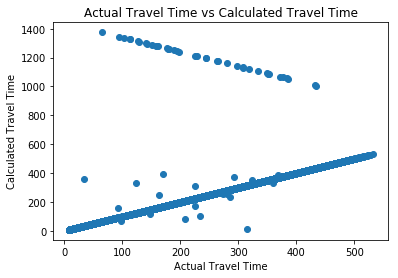

In [34]:
plt.scatter('Travel Time','Calculated Time',data=data)
plt.xlabel('Actual Travel Time')
plt.ylabel('Calculated Travel Time')
plt.title('Actual Travel Time vs Calculated Travel Time')
plt.show()

Another thing to note is for values greater than 1000 in <b>Calculated Time</b>, the actual <b>Travel Time</b> definitely do not tally and there exhibits some sort of negative linear relationship.

If we look at those with <b>Calculated Time</b> greater than 1000, notice that the <b>Delivery Time</b> is always one day after <b>Departure Time</b> but the <b>Travel Time</b> clearly does not tally with this point. And in Section 3.3.1 when we were studying the relationship between <b>Travel Time</b> and <b>Journey Distance</b>, the two have a strong linear relationship and if we notice the <b>Journey Distance</b> in the data rows below, they seems to agree more with <b>Travel Time</b> (i.e. 191.431 km in 188.98 minutes). 

Furthermore, <b>Travel Time</b> will make more sense if we use <b>Departure Time</b> - <b>Delivery Time</b>. From this, we can confirm that both <b>Departure Time</b> and <b>Delivery Time </b> contain semantic errors as they do not tally with <b>Travel Time</b>, with the possibility of them being switched (12:54:47 to 16:03:45 is roughly 3 hours and equivalent to 180 minutes).

In [35]:
data.loc[(data['Calculated Time']>1000),:].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Delivery Minutes,Departure Minutes,Calculated Time
762,ID1479439566,2.0,0.0,5.008,1.0,6.0,-36.581841,146.730593,-37.155480,144.704071,191.431,2018-04-15,16:03:45,188.98,12:54:47,131.66,2,774.783333,963.750000,1251.033333
766,ID1128656837,2.0,0.0,34.076,2.0,1.0,-37.757637,145.136078,-36.550378,146.828202,201.484,2018-02-15,16:00:56,198.56,12:42:23,137.37,2,762.383333,960.933333,1241.450000
793,ID1757677866,1.0,0.0,22.015,36.0,16.0,-37.829297,144.157921,-37.327455,148.315477,370.981,2018-04-13,23:37:01,377.65,17:19:23,111.34,3,1039.383333,1417.016667,1062.366667
799,ID1648563842,1.0,0.0,28.280,17.0,33.0,-38.262222,147.727579,-38.350628,145.766534,171.579,2018-06-07,22:13:28,178.25,19:15:13,98.10,3,1155.216667,1333.466667,1261.750000
2171,ID1348620108,1.0,0.0,11.196,5.0,16.0,-38.692621,145.408449,-37.407901,148.444526,302.105,2018-05-13,22:46:16,308.77,17:37:30,105.70,3,1057.500000,1366.266667,1131.233333
2800,ID1382723485,3.0,0.0,26.846,45.0,46.0,-36.540672,147.408585,-36.727639,145.939882,132.835,2018-02-10,21:03:00,113.27,19:09:44,170.05,3,1149.733333,1263.000000,1326.733333
6170,ID5380894668,1.0,1.0,40.232,27.0,35.0,-38.253590,144.983722,-38.892562,146.092731,119.893,2018-03-09,19:15:37,126.56,17:09:04,132.44,2,1029.066667,1155.616667,1313.450000
6888,ID1204706270,1.0,0.0,39.165,5.0,35.0,-38.678401,145.324527,-38.860616,145.949486,57.909,2018-03-27,20:07:20,64.58,19:02:46,85.49,2,1142.766667,1207.333333,1375.433333
8992,ID5556310854,3.0,1.0,17.780,12.0,20.0,-38.383068,142.953946,-37.791815,147.177972,375.856,2018-05-16,13:32:45,307.69,08:25:04,215.94,2,505.066667,812.750000,1132.316667
9028,ID1258739605,1.0,0.0,9.478,47.0,7.0,-37.626143,145.902297,-37.051044,147.472679,153.018,2018-02-14,23:00:55,159.68,20:21:15,89.46,3,1221.250000,1380.916667,1280.333333


If we were to explore those points that did not fit the positive linear line, we notice that the errors are the same as discussed previously whereby the <b>Journey Distance</b> seems to tally with <b>Travel Time</b>, but not <b>Departure Time</b> and <b>Delivery Time </b>, other than the fact that for these points the <b>Delivery Time</b> is not one day after <b>Departure Time</b>.

In [36]:
# explore some of the data points that were not on the positive linear line
data.loc[(data['Calculated Time']>300) & (data['Calculated Time']<400) & (data['Travel Time']<200),:]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Delivery Minutes,Departure Minutes,Calculated Time
12750,ID1612804809,2.0,0.0,12.518,30.0,46.0,-37.880583,144.729247,-36.661888,145.926138,172.174,2018-02-20,08:47:57,170.64,15:21:59,124.56,1,921.983333,527.950000,394.033333
22606,ID5149839805,1.0,1.0,19.397,35.0,8.0,-38.960706,146.144132,-37.975148,145.666026,117.356,2018-06-01,14:08:48,124.02,19:42:45,134.50,2,1182.750000,848.800000,333.950000
27108,ID1769155748,1.0,0.0,29.182,19.0,19.0,-36.588407,148.304793,-36.552074,148.008921,26.759,2018-02-19,19:40:59,33.43,1:37:32,85.47,2,97.533333,1180.983333,356.550000


In [37]:
# drop the columns Departure Minutes, Delivery Minutes and Calculated Time
data=data.drop(['Departure Minutes','Delivery Minutes','Calculated Time'],1)

### 3.3.5 Relationship between Origin/Destination Latitude/Longitude and Journey Distance

Since we are given the origin latitude/longitude and destination latitude/longitude, we can calculate the distance between the two coordinates and compared if <b>Journey Distance </b> is equal to the calculated distance.

Given that the radius of the Earth is 6378 km, we can apply a haversine formula [3] which calculates the great circle distance between two points on the Earth given their longitudes and latitudes.

In [38]:
# haversine formula obtained from reference source [3]
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6378 * c
    return round(km,3)

Once we have the haversine formula, we create a new column <b>Calculated Distance</b> which calculate the distance using the <b>Origin Latitude</b>, <b>Origin Longitude</b>, <b>Destination Latitude</b> and <b>Destination Longitude</b>.

With the new column, we then plot it against <b> Journey Distance </b> to see if they are equal. If they are equal, we will expect a linear line in the plot.

Notice that the plot we get is a linear positive line, but there are a few points that didn't really fit the line which means there are some differences between the <b>Calculated Distance</b> and given <b>Journey Distance</b>.

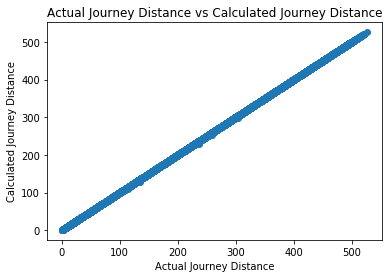

In [39]:
# create a new column 'Calculated Distance' which store the calculated distance after applying haversine function
data['Calculated Distance']=haversine(data['Origin Longitude'],data['Origin Latitude'],data['Destination Longitude'],data['Destination Latitude'])

# plot Journey Distance against Calculated Distance
plt.scatter('Journey Distance','Calculated Distance',data=data.loc[(data['Origin Latitude']<0)&(data['Destination Latitude']<0)])
plt.xlabel('Actual Journey Distance')
plt.ylabel('Calculated Journey Distance')
plt.title('Actual Journey Distance vs Calculated Journey Distance')
plt.show()

We create a column <b>Dist Diff</b> which is the difference between <b>Calculated Distance</b> and given <b>Journey Distance</b>. Since <b>Journey Distance</b> is given up to 3 decimal places in the dataset, we take those entries with <b>Dist Diff</b> of 0.001 and above.

There are a total of 15 rows which contains significant <b>Dist Diff</b> (i.e. 0.001 and above). Hence, we conclude that there are semantic error in <b>Journey Distance</b>

In [40]:
# create column Dist Diff based on difference between Calculated Distance and Journey Distance 
data['Dist Diff']=abs(data['Calculated Distance']-data['Journey Distance'])
# returns number of rows with significant Dist Diff
print(len(data.loc[data['Dist Diff']>0.001,:]))
#return first 10 rows with significant Dist Diff
data.loc[data['Dist Diff']>0.001,:].head(10)

55


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Calculated Distance,Dist Diff
351,ID1584485821,3.0,0.0,39.360,29.0,10.0,38.483066,-143.824750,-37.395911,142.931245,144.216,2018-05-14,15:03:36,122.37,17:05:58,176.69,2,11293.911,11149.695
2279,ID1197075289,1.0,0.0,37.986,23.0,14.0,-36.525059,143.228321,-38.377477,144.386945,236.321,2018-01-18,03:43:38,236.89,7:40:31,116.13,3,230.221,6.100
2387,ID5427635439,3.0,1.0,23.280,18.0,10.0,36.841598,-142.798274,-37.432454,143.015724,68.545,2018-06-21,00:59:17,61.84,2:01:07,211.03,3,11246.049,11177.504
2429,ID1936667596,1.0,0.0,21.726,20.0,24.0,-37.860834,147.067048,37.025027,-143.659089,315.219,2018-03-11,15:42:08,321.89,21:04:01,111.58,2,10956.322,10641.103
4318,ID1627211112,1.0,0.0,8.038,21.0,17.0,-38.984131,146.952464,-38.240824,147.853328,117.157,2018-06-20,00:28:39,120.62,2:29:16,110.14,3,113.957,3.200
5810,ID5169985793,2.0,1.0,5.393,38.0,7.0,-38.199708,146.232397,37.020094,-147.502095,172.562,2018-01-19,21:05:49,171.01,23:56:49,188.38,3,10784.401,10611.839
6365,ID1735456635,1.0,0.0,5.645,40.0,6.0,-38.840154,147.570518,-37.281397,144.799955,303.428,2018-05-18,05:03:02,305.09,10:08:07,118.61,3,298.428,5.000
6381,ID1882488438,1.0,0.0,29.610,35.0,9.0,-38.953835,145.805104,-38.761136,144.346285,134.061,2018-07-07,20:34:20,134.93,22:49:15,94.61,2,128.261,5.800
6521,ID1661053382,2.0,0.0,17.085,37.0,20.0,-38.961665,144.684500,37.652150,-147.137204,259.118,2018-02-16,10:20:28,253.45,14:33:54,129.16,1,11012.890,10753.772
8256,ID5296767547,1.0,1.0,10.146,34.0,29.0,-38.824616,143.197182,38.456429,-143.804370,66.835,2018-03-02,14:55:01,73.50,16:08:31,123.11,2,11377.888,11311.053


In [41]:
data=data.drop(['Calculated Distance','Dist Diff'],1)

### 3.3.6 Relationship between Post Type, Delivery Fare & Departure Time Period

We saw in Section 3.3 that suggested <b>Post Type</b> having a possible correlation with <b>Delivery Fare</b>.

If we were to look at the mean of <b>Delivery Fare</b> between each <b>Post Type</b>, the mean of <b>Delivery Fare</b> in <b>Post Type 0.0</b> which indicates normal delivery is 132.78, while <b>Post Type 1.0</b> which indicates express delivery is 170.77. This is logical as express delivery will definitely cost more than normal delivery.

In [42]:
data['Delivery Fare'].groupby([data['Post Type']]).mean()

Post Type
0.0    132.788780
1.0    170.761341
Name: Delivery Fare, dtype: float64

Since we are given the information that the company has specific rule to define the <b>Departure Time</b> into morning, afternoon and night, we can see if this specific rule will affect the <b>Delivery Fare</b> between express and normal <b>Post Type</b>.

Using the <b>Time Period</b> column defined in Section 3 that categorized <b>Departure Time</b> into `morning` represented by `1` if it's between 06:00:00 to 11:59:59, `afternoon` represented by `2` if it's between 12:00:00 to 20:59:59 or `night` represented by `3` if it's between 21:00:00 to 05:59:59, we do a cross-tabulation with <b>Time Period</b> and <b>Post Type</b>, while aggregating the mean of <b>Delivery Fare</b> between them.

From the cross-tabulation, we do see that the mean of <b>Delivery Fare</b> does varies distinctly across different <b>Post Type</b> and <b>Time Period</b>. For instance, a <b>Delivery Fare</b> of 140 dollars can be <b>Post Type 0.0</b> if it's <b>Time Period</b> is night, or  <b>Post Type 0.0</b> if it's <b>Time Period</b> is morning.

In [43]:
# we then do a crosstab with 'Time Period' and 'Post Type', while aggregating the mean of 'Delivery Fare' between them
pd.crosstab(data['Time Period'],data["Post Type"],values=data['Delivery Fare'],aggfunc=np.mean)

Post Type,0.0,1.0
Time Period,,
1,119.506178,158.269402
2,130.819409,169.290871
3,143.695327,180.912080


## 3.4 Summary of EDA

Summarising what we have found in the EDA:

Syntactic Errors
1. <b>Origin Latitude</b> - Positive value instead of negative value
2. <b>Origin Longitude</b> - Negative value instead of positive value
3. <b>Destination Latitude</b> - Positive value instead of negative value
4. <b>Destination Longitude</b> - Negative value instead of positive value
5. <b>Departure Date</b> - Inconsistent date format (yyyy-dd-mm instead of yyyy-mm-dd)
6. <b>Delivery Fare</b> - One outlier

Semantic Errors
1. <b>Id</b> - Duplicated value
2. <b>Departure Time</b> - Does not tally with <b>Travel Time</b>
3. <b>Delivery Time</b> - Does not tally with <b>Travel Time</b>
4. <b>Journey Distance</b> - Does not tally with <b>Origin/Destination Latitude/Longitude</b> based on haversine formula
5. <b>Origin Region</b> - Does not tally with <b>Origin Latitude</b> and <b>Origin Longitude</b>
6. <b>Destination Region</b> - Does not tally with <b>Destination Latitude</b> and <b>Destination Longitude</b>

Coverage Errors
1. <b>Id</b> - 24 missing values
2. <b>Drone Type</b> - 10 missing values
3. <b>Post Type</b> - 20 missing values
4. <b>Origin Region</b> - 10 missing values
5. <b>Destination Region</b> - 10 missing values
6. <b>Travel Time</b> - 40 missing values
7. <b>Delivery Fare</b> - 30 missing values

## 4. Fixing the errors

### 4.1 Id (Semantic Error - Duplicates)

We first take a look at the rows with duplicated values.

There are 36 unique rows with duplicated <b>Id</b> and if by looking at the first 10 rows of the duplicated ones, we noticed the duplicated row refers to the same package being delivered which means if this apply to all the 36 unique duplicated rows, we can just remove one and keep the other one between each 2 duplicated rows in our dataset.

In [44]:
# returns the number of rows with duplicated Id
print(len(data.loc[(data.duplicated(['Id'])) & (data.Id.notnull()) ,:]))
# returns the first 10 rows with duplicated Id and not null
data.loc[(data.duplicated(['Id'],keep=False)) & (data.Id.notnull()) ,:].sort_values('Id').head(10)

36


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
39913,ID1112900970,3.0,0.0,31.472,20.0,12.0,-37.588510,147.049326,-38.369349,143.006710,365.176,2018-04-21,23:23:03,299.14,4:22:11,202.89,3
6160,ID1112900970,3.0,0.0,31.472,20.0,12.0,-37.588510,147.049326,-38.369349,143.006710,365.176,2018-04-21,23:23:03,299.14,4:22:11,202.89,3
1477,ID1153883818,1.0,0.0,40.413,22.0,27.0,-37.111321,145.393564,-38.143410,144.992835,120.198,2018-07-01,16:51:37,126.86,18:58:28,91.77,2
39899,ID1153883818,1.0,0.0,40.413,22.0,27.0,-37.111321,145.393564,-38.143410,144.992835,120.198,2018-07-01,16:51:37,126.86,18:58:28,91.77,2
20724,ID1172826249,1.0,0.0,31.127,10.0,10.0,-37.259079,142.790420,-37.289468,142.852447,6.452,2018-01-23,14:26:47,13.12,14:39:54,80.02,2
39877,ID1172826249,1.0,0.0,31.127,10.0,10.0,-37.259079,142.790420,-37.289468,142.852447,6.452,2018-01-23,14:26:47,13.12,14:39:54,80.02,2
14303,ID1207081923,3.0,0.0,28.419,37.0,20.0,-38.944027,144.931879,-37.679520,146.965512,226.628,2018-06-19,02:10:41,188.30,5:18:59,189.12,3
39919,ID1207081923,3.0,0.0,28.419,37.0,20.0,-38.944027,144.931879,-37.679520,146.965512,226.628,2018-06-19,02:10:41,188.30,5:18:59,189.12,3
39887,ID1217119121,3.0,0.0,26.122,31.0,47.0,-38.096077,148.406396,-37.710742,145.847413,228.815,2018-07-09,21:36:45,190.05,0:46:48,186.86,3
4591,ID1217119121,3.0,0.0,26.122,31.0,47.0,-38.096077,148.406396,-37.710742,145.847413,228.815,2018-07-09,21:36:45,190.05,0:46:48,186.86,3


We write a function to check if the values of each column in each row is exactly the same as the other row with duplicated <b>Id</b>, and will return the <b>Id</b> containing columns that are not the same as it's duplicated row.

After checking, since the function returned an empty list, it's indeed true that the 36 unique duplicated <b>Id</b> rows contain the same exact information across all columns as it's duplicated row with the same <b>Id</b>.

In [45]:
# return all the 72 rows with duplicated ids and sort them according to ids
duplicated_id=data.loc[(data.duplicated(['Id'],keep=False)) & (data.Id.notnull()) ,:].sort_values(['Id'])
# write a function to check for each row i, are all the columns the same as the duplicated row i-1
def check_diff(dataframe):
    result=[]
    # using indexes of rows, loop through all rows for i and i-1 at each iteration
    for i in range (1,dataframe.shape[0],2):
        # using indexes of columns, loop through all columns for the given row i and row i-1 iteration
        for j in range (0,dataframe.shape[1]):
            # as long as there's a different column value, append the ID of that row to result and proceed with next row 
            if dataframe.iloc[i][j]!=dataframe.iloc[i-1][j]:
                result.append(dataframe.Id.iloc[i])
                break
    return result

check_diff(duplicated_id)

[]

Hence, we can just fix this error by removing all duplicated rows and keeping only one of the row between the two. 

Note that we can't use the `drop_duplicates` function here as <b>Id</b> still contains NaN rows and using the function will drop them.

Once dropped, we noted that there are now no rows with <b>Id</b> which are duplicated and the shape of the dataframe is now 39897 rows (39933 - 36 rows), which means the 36 duplicated rows have been correctly removed.

In [46]:
# store the first index of each Id with duplicated rows
first_duplicated_id=data.loc[(data.duplicated(['Id'],keep='first')) & (data.Id.notnull()) ,:].index.tolist()
# drop only one of the two duplicated rows with the same Id
data=data.drop(first_duplicated_id)
# reset the index once again after dropping rows
data=data.reset_index(drop=True)

# returns number of duplicated Id rows
print(len(data.loc[(data.duplicated(['Id'])) & (data.Id.notnull()) ,:]))
# returns the shape of the data after duplicated Id rows have been removed
data.shape

0


(39897, 17)

###  4.2 Id (Coverage Error - Missing Values)

We know in the EDA that <b>Id</b> contains 24 missing values (Coverage Error). 
We first take a look at the 24 rows with missing <b>Id</b>.

Looking at the first 10 rows with missing <b>Id</b>, note that the indexes of the missing <b>Id</b> happened at the end of the dataset.

In [47]:
data[data.Id.isnull()].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
39873,NaN,1.0,0.0,28.882,16.0,17.0,-37.451964,148.394499,-38.273658,147.737992,108.144,2018-02-04,23:42:40,114.81,1:37:28,105.02,3
39874,NaN,1.0,0.0,34.528,1.0,22.0,-36.514881,146.625956,-37.259769,145.682984,117.999,2018-05-06,04:15:03,124.67,6:19:43,108.00,3
39875,NaN,2.0,0.0,9.680,14.0,22.0,-38.415330,144.239014,-37.258451,145.444052,166.752,2018-05-28,01:34:39,165.48,4:20:07,142.75,3
39876,NaN,1.0,1.0,10.380,16.0,30.0,-37.251781,148.441133,-37.736716,144.688627,335.767,2018-02-24,13:29:56,342.43,19:12:21,145.03,2
39877,NaN,1.0,0.0,16.962,16.0,32.0,-37.360626,148.257150,-37.393713,146.499976,155.479,2018-07-17,02:09:48,162.15,4:51:57,110.56,3
39878,NaN,2.0,0.0,30.873,1.0,27.0,-36.554268,146.794701,-38.089773,145.114579,226.568,2018-04-26,05:10:13,222.45,8:52:39,151.25,3
39879,NaN,1.0,0.0,28.670,1.0,29.0,-36.658602,146.727856,-38.327773,143.535251,337.657,2018-01-13,08:56:30,344.32,14:40:49,100.42,1
39880,NaN,2.0,0.0,26.069,36.0,7.0,-37.754199,144.034028,-36.984502,147.376099,307.810,2018-05-16,13:09:58,299.82,18:09:47,148.32,2
39881,NaN,3.0,0.0,29.094,38.0,14.0,-38.114188,146.527688,-38.257595,144.434562,183.831,2018-02-03,14:18:00,154.06,16:52:03,170.11,2
39882,NaN,1.0,1.0,11.146,22.0,4.0,-37.251585,145.729416,-38.403446,147.274644,186.809,2018-04-15,05:14:51,193.48,8:28:19,147.71,3


We can try looking at specific rows of the dataset around indexes of the missing <b>Id</b> rows to see if we can find any relationship between the other columns and <b>Id</b>.

Let's look at rows between 39873 and 39881 (since we have missing <b>Id</b> in 39874, 39876, 39879).

There does not seem to be any information that suggests that <b>Id</b> is based on other columns.

In [48]:
data.iloc[39873:39881]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
39873,NaN,1.0,0.0,28.882,16.0,17.0,-37.451964,148.394499,-38.273658,147.737992,108.144,2018-02-04,23:42:40,114.81,1:37:28,105.02,3
39874,NaN,1.0,0.0,34.528,1.0,22.0,-36.514881,146.625956,-37.259769,145.682984,117.999,2018-05-06,04:15:03,124.67,6:19:43,108.00,3
39875,NaN,2.0,0.0,9.680,14.0,22.0,-38.415330,144.239014,-37.258451,145.444052,166.752,2018-05-28,01:34:39,165.48,4:20:07,142.75,3
39876,NaN,1.0,1.0,10.380,16.0,30.0,-37.251781,148.441133,-37.736716,144.688627,335.767,2018-02-24,13:29:56,342.43,19:12:21,145.03,2
39877,NaN,1.0,0.0,16.962,16.0,32.0,-37.360626,148.257150,-37.393713,146.499976,155.479,2018-07-17,02:09:48,162.15,4:51:57,110.56,3
39878,NaN,2.0,0.0,30.873,1.0,27.0,-36.554268,146.794701,-38.089773,145.114579,226.568,2018-04-26,05:10:13,222.45,8:52:39,151.25,3
39879,NaN,1.0,0.0,28.670,1.0,29.0,-36.658602,146.727856,-38.327773,143.535251,337.657,2018-01-13,08:56:30,344.32,14:40:49,100.42,1
39880,NaN,2.0,0.0,26.069,36.0,7.0,-37.754199,144.034028,-36.984502,147.376099,307.810,2018-05-16,13:09:58,299.82,18:09:47,148.32,2


We then explore the option to see if these 24 rows contain the same exact information in the other columns other than the <b>Id</b> column, compared to the rest of the dataset.

Looking at the first 10 rows of the check, we noticed that each row with missing <b>Id</b> contains the exact information in the remaining columns as one other row in the dataset. Hence, we can conclude that the 24 missing <b>Id</b> rows are duplicates in this dataset and we should just remove them from our dataset without the need for further imputation.

In [49]:
# store the column names of the dataframe in a dataset
column_names=data.columns.tolist()
# remove the first column (i.e. Id) from the column_names
column_names=column_names[1:len(column_names)]
# check for duplicated column values other than Id
data[data.duplicated(column_names,keep=False)].sort_values(column_names).head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
10254,ID1336882613,1.0,0.0,6.038,36.0,4.0,-37.786312,144.055813,-38.455952,147.371134,299.733,2018-07-21,19:28:00,306.40,0:34:23,107.85,2
39886,NaN,1.0,0.0,6.038,36.0,4.0,-37.786312,144.055813,-38.455952,147.371134,299.733,2018-07-21,19:28:00,306.40,0:34:23,107.85,2
4715,ID1753577651,1.0,0.0,16.962,16.0,32.0,-37.360626,148.257150,-37.393713,146.499976,155.479,2018-07-17,02:09:48,162.15,4:51:57,110.56,3
39877,NaN,1.0,0.0,16.962,16.0,32.0,-37.360626,148.257150,-37.393713,146.499976,155.479,2018-07-17,02:09:48,162.15,4:51:57,110.56,3
33241,ID1245943727,1.0,0.0,23.620,45.0,37.0,-36.600212,147.524916,-38.965106,144.679214,363.253,2018-04-17,13:40:36,369.92,19:50:31,104.28,2
39892,NaN,1.0,0.0,23.620,45.0,37.0,-36.600212,147.524916,-38.965106,144.679214,363.253,2018-04-17,13:40:36,369.92,19:50:31,104.28,2
33186,ID1477292552,1.0,0.0,24.869,36.0,6.0,-37.738678,143.892728,-37.304901,144.809601,94.256,2018-06-27,18:24:21,100.92,20:05:16,87.83,2
39884,NaN,1.0,0.0,24.869,36.0,6.0,-37.738678,143.892728,-37.304901,144.809601,94.256,2018-06-27,18:24:21,100.92,20:05:16,87.83,2
32500,ID1217582402,1.0,0.0,28.670,1.0,29.0,-36.658602,146.727856,-38.327773,143.535251,337.657,2018-01-13,08:56:30,344.32,14:40:49,100.42,1
39879,NaN,1.0,0.0,28.670,1.0,29.0,-36.658602,146.727856,-38.327773,143.535251,337.657,2018-01-13,08:56:30,344.32,14:40:49,100.42,1


We use the function `dropna` to just drop the 24 rows and the resulting number of rows in the dataframe is currently 39873 rows (39897 - 24 rows).

In [50]:
# drop the 24 missing Id rows
data=data.dropna(subset=['Id'])
data.shape

(39873, 17)

### 4.3 Origin Latitude (Syntactic Error - Wrong Sign)

We know in the EDA that <b>Origin Latitude</b> contains syntactic error in which there were values that were positive when instead they should be negative.

Let's look at how many rows contain this error and the first 10 rows of them.

There's a total of 20 rows that contain positive <b>Origin Latitude</b> and observe that for these rows, their <b>Origin Longitude</b> are also in the wrong format (i.e. negative instead of positive). Hence, we suspect that the signs of the 2 columns for these 20 rows have been switched.

In [51]:
# returns number of rows with Origin Latitude in the positive values
print(len(data.loc[data["Origin Latitude"]>0,:]))
# returns the first 10 rows 
data.loc[data["Origin Latitude"]>0,:].head(10)

20


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
351,ID1584485821,3.0,0.0,39.360,29.0,10.0,38.483066,-143.824750,-37.395911,142.931245,144.216,2018-05-14,15:03:36,122.37,17:05:58,176.69,2
2387,ID5427635439,3.0,1.0,23.280,18.0,10.0,36.841598,-142.798274,-37.432454,143.015724,68.545,2018-06-21,00:59:17,61.84,2:01:07,211.03,3
8529,ID5284900786,1.0,1.0,40.993,40.0,33.0,38.860323,-147.715724,-38.323246,145.600709,193.483,2018-02-23,18:37:34,200.15,21:57:43,141.49,2
10590,ID1406282093,1.0,0.0,29.159,13.0,23.0,36.623235,-144.253899,-36.651747,143.374505,78.615,2018-01-06,06:10:01,85.28,7:35:17,85.25,1
14672,ID1902698135,2.0,0.0,17.104,37.0,46.0,38.932827,-144.861423,-36.642457,145.703497,265.497,2018-02-04,00:29:01,259.52,4:48:32,155.38,3
16708,ID1662570500,3.0,0.0,18.473,39.0,36.0,37.239566,-147.079238,-37.795515,144.188661,262.601,2018-05-15,11:09:26,217.08,14:46:30,169.44,1
16737,ID5649933059,1.0,1.0,29.324,26.0,21.0,36.745877,-146.391141,-38.949383,146.797132,247.869,2018-07-11,19:02:56,254.54,23:17:28,141.30,2
16743,ID1282350684,1.0,0.0,11.886,8.0,4.0,37.964900,-145.576443,-38.374664,147.156401,145.598,2018-04-28,08:14:25,152.26,10:46:40,86.46,1
18774,ID5780843824,1.0,1.0,21.408,39.0,21.0,37.411323,-146.933241,-38.938323,147.097706,170.589,2018-07-27,16:27:32,177.26,19:24:47,136.98,2
20841,ID5553086629,1.0,1.0,23.006,19.0,29.0,36.670805,-148.169714,-38.560936,143.648473,450.705,2018-03-09,19:31:26,457.37,3:08:48,154.74,2


In the EDA, we observed that <b>Origin Region</b> is a categorical representation of <b>Origin Latitude</b> and <b>Origin Longitude</b>. We can make use of the <b>Origin Region</b> of these 20 rows and check if indeed the signs of <b>Origin Latitude</b> and <b>Origin Longitude</b> have been switched.

Looking at the first row above, note that the <b>Origin Region</b> is `29.0`, <b>Origin Latitude</b> is `
38.483066` and <b>Origin Longitude</b> is `-143.824750`. Comparing these values with the table printed out by grouping the means of <b>Origin Latitude</b> and <b>Origin Longitude</b> with <b>Origin Region</b>, at <b>Origin Region</b> of `29.0`, the mean of <b>Origin Latitude</b> is `-38.278561` and <b>Origin Longitude</b> is `143.014385`.

This confirms the error that the signs of <b>Origin Latitude</b> and <b>Origin Longitude</b> in the 20 rows have been switched.

In [52]:
data.loc[:,['Origin Latitude','Origin Longitude']].groupby(data['Origin Region']).mean()

,Origin Latitude,Origin Longitude
Origin Region,,
1.0,-36.573667,146.792528
2.0,-37.609958,145.166471
3.0,-37.146542,143.654930
4.0,-38.462312,147.298950
5.0,-38.789187,145.392713
6.0,-37.224402,144.827216
7.0,-37.071060,147.520525
8.0,-37.869556,145.270582
9.0,-38.725478,144.170648


Hence to fix the 20 rows which contain the wrong sign of <b>Origin Latitude</b>, we use a function to multiply the current <b>Origin Latitude</b> of these 20 rows by -1, which will convert it to a negative sign instead.

We then print out the first 10 rows after the change has been made to confirm the errors are fixed.

In [53]:
# we first store the indexes of these 20 rows in a variable in order to check whether they are correctly changed after that
error_indexes=data.loc[data["Origin Latitude"]>0].index.tolist()

# define a function to convert positive values to negative values
def convert_sign(value):
    return (value * -1)

# fix those origin latitude > 0 by taking their negatives by applying the convert_sign function
data.loc[data["Origin Latitude"]>0,'Origin Latitude']=data.loc[data["Origin Latitude"]>0,'Origin Latitude'].apply(convert_sign)

# We see that the 20 rows of origin latitude with incorrect sign has been fixed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
351,ID1584485821,3.0,0.0,39.360,29.0,10.0,-38.483066,-143.824750,-37.395911,142.931245,144.216,2018-05-14,15:03:36,122.37,17:05:58,176.69,2
2387,ID5427635439,3.0,1.0,23.280,18.0,10.0,-36.841598,-142.798274,-37.432454,143.015724,68.545,2018-06-21,00:59:17,61.84,2:01:07,211.03,3
8529,ID5284900786,1.0,1.0,40.993,40.0,33.0,-38.860323,-147.715724,-38.323246,145.600709,193.483,2018-02-23,18:37:34,200.15,21:57:43,141.49,2
10590,ID1406282093,1.0,0.0,29.159,13.0,23.0,-36.623235,-144.253899,-36.651747,143.374505,78.615,2018-01-06,06:10:01,85.28,7:35:17,85.25,1
14672,ID1902698135,2.0,0.0,17.104,37.0,46.0,-38.932827,-144.861423,-36.642457,145.703497,265.497,2018-02-04,00:29:01,259.52,4:48:32,155.38,3
16708,ID1662570500,3.0,0.0,18.473,39.0,36.0,-37.239566,-147.079238,-37.795515,144.188661,262.601,2018-05-15,11:09:26,217.08,14:46:30,169.44,1
16737,ID5649933059,1.0,1.0,29.324,26.0,21.0,-36.745877,-146.391141,-38.949383,146.797132,247.869,2018-07-11,19:02:56,254.54,23:17:28,141.30,2
16743,ID1282350684,1.0,0.0,11.886,8.0,4.0,-37.964900,-145.576443,-38.374664,147.156401,145.598,2018-04-28,08:14:25,152.26,10:46:40,86.46,1
18774,ID5780843824,1.0,1.0,21.408,39.0,21.0,-37.411323,-146.933241,-38.938323,147.097706,170.589,2018-07-27,16:27:32,177.26,19:24:47,136.98,2
20841,ID5553086629,1.0,1.0,23.006,19.0,29.0,-36.670805,-148.169714,-38.560936,143.648473,450.705,2018-03-09,19:31:26,457.37,3:08:48,154.74,2


### 4.4 Origin Longitude (Syntactic Error - Wrong Sign)

As observed in Section 4.3, according to the fact that <b>Origin Region</b> is a categorical representation of <b>Origin Latitude</b> and <b>Origin Longitude</b>, we observed that the signs of <b>Origin Latitude</b> and <b>Origin Longitude</b> have been switched.

Let's look at how many rows contain this error and the first 10 rows of them.

There's a total of 20 rows that contain positive <b>Origin Longitude</b> and observe that for these rows, they were the exact same rows with errors in <b>Origin Latitude</b> that we have fixed in Section 4.3.

In [54]:
# returns number of rows with Origin Longitude in the negative values
print(len(data.loc[data["Origin Longitude"]<0,:]))
# returns the first 10 rows 
data.loc[data["Origin Longitude"]<0,:].head(10)

20


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
351,ID1584485821,3.0,0.0,39.360,29.0,10.0,-38.483066,-143.824750,-37.395911,142.931245,144.216,2018-05-14,15:03:36,122.37,17:05:58,176.69,2
2387,ID5427635439,3.0,1.0,23.280,18.0,10.0,-36.841598,-142.798274,-37.432454,143.015724,68.545,2018-06-21,00:59:17,61.84,2:01:07,211.03,3
8529,ID5284900786,1.0,1.0,40.993,40.0,33.0,-38.860323,-147.715724,-38.323246,145.600709,193.483,2018-02-23,18:37:34,200.15,21:57:43,141.49,2
10590,ID1406282093,1.0,0.0,29.159,13.0,23.0,-36.623235,-144.253899,-36.651747,143.374505,78.615,2018-01-06,06:10:01,85.28,7:35:17,85.25,1
14672,ID1902698135,2.0,0.0,17.104,37.0,46.0,-38.932827,-144.861423,-36.642457,145.703497,265.497,2018-02-04,00:29:01,259.52,4:48:32,155.38,3
16708,ID1662570500,3.0,0.0,18.473,39.0,36.0,-37.239566,-147.079238,-37.795515,144.188661,262.601,2018-05-15,11:09:26,217.08,14:46:30,169.44,1
16737,ID5649933059,1.0,1.0,29.324,26.0,21.0,-36.745877,-146.391141,-38.949383,146.797132,247.869,2018-07-11,19:02:56,254.54,23:17:28,141.30,2
16743,ID1282350684,1.0,0.0,11.886,8.0,4.0,-37.964900,-145.576443,-38.374664,147.156401,145.598,2018-04-28,08:14:25,152.26,10:46:40,86.46,1
18774,ID5780843824,1.0,1.0,21.408,39.0,21.0,-37.411323,-146.933241,-38.938323,147.097706,170.589,2018-07-27,16:27:32,177.26,19:24:47,136.98,2
20841,ID5553086629,1.0,1.0,23.006,19.0,29.0,-36.670805,-148.169714,-38.560936,143.648473,450.705,2018-03-09,19:31:26,457.37,3:08:48,154.74,2


Hence to fix the 20 rows which contain the wrong sign of <b>Origin Longitude</b>, we use the same `convert_sign` function used in Section 4.3 to multiply the current <b>Origin Longitude</b> of these 20 rows by -1, which will convert it to a positive sign instead.

We then print out the first 10 rows after the change has been made to confirm the errors are fixed corrected.

In [55]:
# we first store the indexes of these 20 rows in a variable in order to check whether they are correctly changed after that
error_indexes=data.loc[data["Origin Longitude"]<0].index.tolist()

# fix those origin longitude < 0 by taking their positives by applying the convert_sign function
data.loc[data["Origin Longitude"]<0,'Origin Longitude']=data.loc[data["Origin Longitude"]<0,'Origin Longitude'].apply(convert_sign)

# We see that the 20 rows of origin longitude with incorrect sign has been fixed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
351,ID1584485821,3.0,0.0,39.360,29.0,10.0,-38.483066,143.824750,-37.395911,142.931245,144.216,2018-05-14,15:03:36,122.37,17:05:58,176.69,2
2387,ID5427635439,3.0,1.0,23.280,18.0,10.0,-36.841598,142.798274,-37.432454,143.015724,68.545,2018-06-21,00:59:17,61.84,2:01:07,211.03,3
8529,ID5284900786,1.0,1.0,40.993,40.0,33.0,-38.860323,147.715724,-38.323246,145.600709,193.483,2018-02-23,18:37:34,200.15,21:57:43,141.49,2
10590,ID1406282093,1.0,0.0,29.159,13.0,23.0,-36.623235,144.253899,-36.651747,143.374505,78.615,2018-01-06,06:10:01,85.28,7:35:17,85.25,1
14672,ID1902698135,2.0,0.0,17.104,37.0,46.0,-38.932827,144.861423,-36.642457,145.703497,265.497,2018-02-04,00:29:01,259.52,4:48:32,155.38,3
16708,ID1662570500,3.0,0.0,18.473,39.0,36.0,-37.239566,147.079238,-37.795515,144.188661,262.601,2018-05-15,11:09:26,217.08,14:46:30,169.44,1
16737,ID5649933059,1.0,1.0,29.324,26.0,21.0,-36.745877,146.391141,-38.949383,146.797132,247.869,2018-07-11,19:02:56,254.54,23:17:28,141.30,2
16743,ID1282350684,1.0,0.0,11.886,8.0,4.0,-37.964900,145.576443,-38.374664,147.156401,145.598,2018-04-28,08:14:25,152.26,10:46:40,86.46,1
18774,ID5780843824,1.0,1.0,21.408,39.0,21.0,-37.411323,146.933241,-38.938323,147.097706,170.589,2018-07-27,16:27:32,177.26,19:24:47,136.98,2
20841,ID5553086629,1.0,1.0,23.006,19.0,29.0,-36.670805,148.169714,-38.560936,143.648473,450.705,2018-03-09,19:31:26,457.37,3:08:48,154.74,2


### 4.5 Destination Latitude (Syntactic Error - Wrong Sign)

We know in the EDA that <b>Destination Latitude</b> contains syntactic error in which there were values that were positive when instead they should be negative.

Let's look at how many rows contain this error and the first 10 rows of them.

There's a total of 20 rows that contain positive <b>Destination Latitude</b> and observe that for these rows, their <b>Destination Longitude</b> are also in the wrong format (i.e. negative instead of positive). Hence, we suspect that the signs of the 2 columns for these 20 rows have been switched.

In [56]:
# returns number of rows with Destination Latitude in the negative values
print(len(data.loc[data["Destination Latitude"]>0,:]))
# returns the first 10 rows 
data.loc[data["Destination Latitude"]>0,:].head(10)

20


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
2429,ID1936667596,1.0,0.0,21.726,20.0,24.0,-37.860834,147.067048,37.025027,-143.659089,315.219,2018-03-11,15:42:08,321.89,21:04:01,111.58,2
5810,ID5169985793,2.0,1.0,5.393,38.0,7.0,-38.199708,146.232397,37.020094,-147.502095,172.562,2018-01-19,21:05:49,171.01,23:56:49,188.38,3
6521,ID1661053382,2.0,0.0,17.085,37.0,20.0,-38.961665,144.684500,37.652150,-147.137204,259.118,2018-02-16,10:20:28,253.45,14:33:54,129.16,1
8256,ID5296767547,1.0,1.0,10.146,34.0,29.0,-38.824616,143.197182,38.456429,-143.804370,66.835,2018-03-02,14:55:01,73.50,16:08:31,123.11,2
8575,ID1418899978,1.0,0.0,9.820,11.0,35.0,-38.708181,148.254551,39.000974,-145.911262,205.725,2018-03-04,00:20:21,212.39,3:52:44,105.08,3
8605,ID1292134421,1.0,0.0,18.002,40.0,1.0,-38.888291,147.478614,36.518467,-146.794701,270.588,2018-05-23,04:39:55,277.26,9:17:10,120.02,3
10614,ID1239625040,1.0,0.0,10.912,15.0,24.0,-36.598776,145.358791,37.003921,-143.524065,169.637,2018-03-17,22:49:55,176.30,1:46:13,109.45,3
10642,ID1952006623,1.0,0.0,16.249,42.0,1.0,-37.092308,148.151674,36.562170,-146.678808,143.893,2018-04-04,14:10:15,150.56,16:40:48,86.53,2
11327,ID1525841345,3.0,0.0,23.426,36.0,13.0,-37.710907,144.101524,36.697949,-144.234175,113.371,2018-03-15,11:57:41,97.70,13:35:23,156.37,1
12694,ID1539710833,3.0,0.0,6.998,7.0,38.0,-37.020094,147.502095,38.139391,-146.466272,154.512,2018-05-26,08:44:50,130.61,10:55:26,157.89,1


In the EDA, we observed that <b>Destination Region</b> is a categorical representation of <b>Destination Latitude</b> and <b>Destination Longitude</b>. We can make use of the <b>Destination Region</b> of these 20 rows and check if indeed the signs of <b>Destination Latitude</b> and <b>Destination Longitude</b> have been switched.

Looking at the first row above, note that the <b>Destination Region</b> is `24.0`, <b>Destination Latitude</b> is `
37.025027` and <b>Destination Longitude</b> is `-143.659089`. Comparing these values with the table printed out by grouping the means of <b>Destination Latitude</b> and <b>Destination Longitude</b> with <b>Destination Region</b>, at <b>Destination Region</b> of `24.0`, the mean of <b>Destination Latitude</b> is `-36.859289` and <b>Destination Longitude</b> is `142.847595`.

This confirms the error that the signs of <b>Destination Latitude</b> and <b>Destination Longitude</b> in the 20 rows have been switched.

In [57]:
data.loc[:,['Destination Latitude','Destination Longitude']].groupby(data['Destination Region']).mean()

,Destination Latitude,Destination Longitude
Destination Region,,
1.0,-36.402527,146.089973
2.0,-37.606479,145.165053
3.0,-37.236834,143.990737
4.0,-38.462782,147.310583
5.0,-38.705368,145.051091
6.0,-37.227855,144.824546
7.0,-36.984974,147.188996
8.0,-37.969573,145.639816
9.0,-38.727517,144.169449


Hence to fix the 20 rows which contain the wrong sign of <b>Destination Latitude</b>, we use the same `convert_sign` function used in Section 4.3 to multiply the current <b>Destination Latitude</b> of these 20 rows by -1, which will convert it to a negative sign instead.

We then print out the first 10 rows after the change has been made to confirm the errors are fixed corrected.

In [58]:
# we first store the indexes of these 20 rows in a variable in order to check whether they are correctly changed after that
error_indexes=data.loc[data["Destination Latitude"]>0].index.tolist()

# fix those destination latitude > 0 by taking their negatives by applying the convert_sign function
data.loc[data["Destination Latitude"]>0,'Destination Latitude']=data.loc[data["Destination Latitude"]>0,'Destination Latitude'].apply(convert_sign)

# We see that the 20 rows of destination latitude with incorrect sign has been fixed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
2429,ID1936667596,1.0,0.0,21.726,20.0,24.0,-37.860834,147.067048,-37.025027,-143.659089,315.219,2018-03-11,15:42:08,321.89,21:04:01,111.58,2
5810,ID5169985793,2.0,1.0,5.393,38.0,7.0,-38.199708,146.232397,-37.020094,-147.502095,172.562,2018-01-19,21:05:49,171.01,23:56:49,188.38,3
6521,ID1661053382,2.0,0.0,17.085,37.0,20.0,-38.961665,144.684500,-37.652150,-147.137204,259.118,2018-02-16,10:20:28,253.45,14:33:54,129.16,1
8256,ID5296767547,1.0,1.0,10.146,34.0,29.0,-38.824616,143.197182,-38.456429,-143.804370,66.835,2018-03-02,14:55:01,73.50,16:08:31,123.11,2
8575,ID1418899978,1.0,0.0,9.820,11.0,35.0,-38.708181,148.254551,-39.000974,-145.911262,205.725,2018-03-04,00:20:21,212.39,3:52:44,105.08,3
8605,ID1292134421,1.0,0.0,18.002,40.0,1.0,-38.888291,147.478614,-36.518467,-146.794701,270.588,2018-05-23,04:39:55,277.26,9:17:10,120.02,3
10614,ID1239625040,1.0,0.0,10.912,15.0,24.0,-36.598776,145.358791,-37.003921,-143.524065,169.637,2018-03-17,22:49:55,176.30,1:46:13,109.45,3
10642,ID1952006623,1.0,0.0,16.249,42.0,1.0,-37.092308,148.151674,-36.562170,-146.678808,143.893,2018-04-04,14:10:15,150.56,16:40:48,86.53,2
11327,ID1525841345,3.0,0.0,23.426,36.0,13.0,-37.710907,144.101524,-36.697949,-144.234175,113.371,2018-03-15,11:57:41,97.70,13:35:23,156.37,1
12694,ID1539710833,3.0,0.0,6.998,7.0,38.0,-37.020094,147.502095,-38.139391,-146.466272,154.512,2018-05-26,08:44:50,130.61,10:55:26,157.89,1


### 4.6 Destination Longitude (Syntactic Error - Wrong Sign)

As observed in Section 4.5, according to the fact that <b>Destination Region</b> is a categorical representation of <b>Destination Latitude</b> and <b>Destination Longitude</b>, we observed that the signs of <b>Destination Latitude</b> and <b>Destination Longitude</b> have been switched.

Let's look at how many rows contain this error and the first 10 rows of them.

There's a total of 20 rows that contain positive <b>Destination Longitude</b> and observe that for these rows, they were the exact same rows with errors in <b>Destination Latitude</b> that we have fixed in Section 4.5.

In [59]:
# returns number of rows with Destination Longitude in the negative values
print(len(data.loc[data["Destination Longitude"]<0,:]))
# returns the first 10 rows 
data.loc[data["Destination Longitude"]>0,:].head(10)

20


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
0,ID1647165072,2.0,0.0,39.026,37.0,10.0,-38.952201,144.703351,-37.317709,142.848358,243.882,2018-06-04,11:04:36,238.94,15:03:32,128.28,1
1,ID5409408834,2.0,1.0,36.443,23.0,39.0,-36.634606,143.201274,-37.287760,146.951739,341.399,2018-04-26,13:50:32,331.81,19:22:20,185.86,2
2,ID1860010758,1.0,0.0,27.170,5.0,13.0,-38.884370,145.426791,-36.758926,144.082466,264.476,2018-07-23,21:31:03,271.14,2:02:11,115.01,3
3,ID1704840028,2.0,0.0,13.864,42.0,45.0,-36.970133,148.265338,-36.599126,147.638070,69.519,2018-04-25,08:18:31,72.88,9:31:23,117.30,1
4,ID5788248903,1.0,1.0,18.974,2.0,24.0,-37.549350,145.105556,-37.154190,143.586818,141.405,2018-04-18,07:47:19,148.07,10:15:23,120.89,1
5,ID1428243193,1.0,0.0,17.618,21.0,28.0,-38.904771,146.985301,-37.871515,143.313257,340.384,2018-05-17,09:40:25,347.05,15:27:28,95.35,1
6,ID1474928624,1.0,0.0,40.308,18.0,8.0,-36.881003,143.002272,-37.871031,145.550539,250.905,2018-02-10,05:04:46,257.57,9:22:20,116.39,3
7,ID5831039536,2.0,1.0,32.490,34.0,30.0,-38.982812,143.195163,-37.900937,144.593470,171.364,2018-07-01,08:13:11,169.87,11:03:03,166.57,1
8,ID1757067202,2.0,0.0,24.965,19.0,17.0,-36.549566,148.132767,-38.209558,147.611392,190.453,2018-02-08,12:59:24,188.05,16:07:27,138.62,2
9,ID5532246471,3.0,1.0,22.140,6.0,39.0,-37.167673,144.671240,-37.357550,146.901174,198.681,2018-03-14,11:48:06,165.94,14:34:02,203.71,1


Hence to fix the 20 rows which contain the wrong sign of <b>Destination Longitude</b>, we use the same `convert_sign` function used in Section 4.3 to multiply the current <b>Destination Longitude</b> of these 20 rows by -1, which will convert it to a positive sign instead.

We then print out the first 10 rows after the change has been made to confirm the errors are fixed corrected.

In [60]:
# we first store the indexes of these 20 rows in a variable in order to check whether they are correctly changed after that
error_indexes=data.loc[data["Destination Longitude"]<0].index.tolist()

# fix those destination longitude < 0 by taking their positives by applying the convert_sign function
data.loc[data["Destination Longitude"]<0,'Destination Longitude']=data.loc[data["Destination Longitude"]<0,'Destination Longitude'].apply(convert_sign)

# We see that the 20 rows of destination longitude with incorrect sign has been fixed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
2429,ID1936667596,1.0,0.0,21.726,20.0,24.0,-37.860834,147.067048,-37.025027,143.659089,315.219,2018-03-11,15:42:08,321.89,21:04:01,111.58,2
5810,ID5169985793,2.0,1.0,5.393,38.0,7.0,-38.199708,146.232397,-37.020094,147.502095,172.562,2018-01-19,21:05:49,171.01,23:56:49,188.38,3
6521,ID1661053382,2.0,0.0,17.085,37.0,20.0,-38.961665,144.684500,-37.652150,147.137204,259.118,2018-02-16,10:20:28,253.45,14:33:54,129.16,1
8256,ID5296767547,1.0,1.0,10.146,34.0,29.0,-38.824616,143.197182,-38.456429,143.804370,66.835,2018-03-02,14:55:01,73.50,16:08:31,123.11,2
8575,ID1418899978,1.0,0.0,9.820,11.0,35.0,-38.708181,148.254551,-39.000974,145.911262,205.725,2018-03-04,00:20:21,212.39,3:52:44,105.08,3
8605,ID1292134421,1.0,0.0,18.002,40.0,1.0,-38.888291,147.478614,-36.518467,146.794701,270.588,2018-05-23,04:39:55,277.26,9:17:10,120.02,3
10614,ID1239625040,1.0,0.0,10.912,15.0,24.0,-36.598776,145.358791,-37.003921,143.524065,169.637,2018-03-17,22:49:55,176.30,1:46:13,109.45,3
10642,ID1952006623,1.0,0.0,16.249,42.0,1.0,-37.092308,148.151674,-36.562170,146.678808,143.893,2018-04-04,14:10:15,150.56,16:40:48,86.53,2
11327,ID1525841345,3.0,0.0,23.426,36.0,13.0,-37.710907,144.101524,-36.697949,144.234175,113.371,2018-03-15,11:57:41,97.70,13:35:23,156.37,1
12694,ID1539710833,3.0,0.0,6.998,7.0,38.0,-37.020094,147.502095,-38.139391,146.466272,154.512,2018-05-26,08:44:50,130.61,10:55:26,157.89,1


### 4.7 Origin Region (Semantic Error - Inconsistent Values)

In Section 3.3.2, it was discussed that there were some points in <b>Origin Region</b> in which it's <b>Origin Latitude</b> and <b>Origin Longitude</b> does not lie in that <b>Origin Region</b>.

We can make use of the mean of <b>Origin Latitude</b> and <b>Origin Longitude</b> across each <b>Origin Region</b>, and compare all the rows in our dataframe with the means based on each <b>Origin Region</b>, and then identify the rows whose <b>Origin Region</b> does not tally with it's <b>Origin Latitude</b> and <b>Origin Longitude</b>

We will first write a function to identify these rows.

In [61]:
# create a dataframe to store the mean of Origin Latitude and Origin Longitude across the 47 Origin Region
ori_mean=pd.DataFrame(data.loc[:,['Origin Latitude','Origin Longitude']].groupby(data['Origin Region']).mean())
# write a function to identify the rows with errors in Origin Region
def region_error(dataframe):
    # if Origin Region is not null
    if not np.isnan(dataframe['Origin Region']):
        # return error if origin latitude or origin longitude differs by more than 0.3 as compared to the means in ori_mean
        if ((abs(ori_mean.iloc[int(dataframe['Origin Region'])-1,0]-dataframe['Origin Latitude'])>0.3) or (abs(ori_mean.iloc[int(dataframe['Origin Region'])-1,1]-dataframe['Origin Longitude'])>0.3)):
            return "Error"
        # return okay if there's no error or Origin Region
        else:
            return "Okay"
    else:
        return "NAN"

After which, we will create a new column <b>Check</b> in data dataframe which will return `Error`,`NAN` or `Okay` if that the <b>Origin Region</b> in that particular row contains error with respect to it's <b>Origin Latitude</b> and <b>Origin Longitude</b>, NAN values or otherwise respectively. 

There are a total of 20 such rows with errors in <b>Origin Region</b> based on their <b>Origin Latitude</b> and <b>Origin Longitude</b>.

In [62]:
# classify rows to Error,NAN or Okay based on Origin Region by applying region_error function
data['Check']=data.apply(region_error,axis=1)
# return number of rows with errors in Origin Region
print(len(data.loc[data['Check']=='Error',:]))
# return first 10 rows with errors in Origin Region
data.loc[data['Check']=='Error',:].head(10)

20


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Check
247,ID1499308067,2.0,0.0,7.322,7.0,17.0,-36.553401,148.025364,-38.353628,147.773309,201.630,2018-02-10,10:02:28,198.70,13:21:09,126.51,1,Error
256,ID1480455200,1.0,0.0,15.791,40.0,5.0,-38.481441,144.813529,-38.741471,145.569937,71.880,2018-04-21,22:28:48,78.55,23:47:20,104.29,3,Error
4344,ID1263758336,2.0,0.0,36.310,38.0,21.0,-36.558827,146.918206,-38.834083,147.002317,253.383,2018-06-16,14:27:25,247.98,18:35:23,137.13,2,Error
4372,ID1556865157,1.0,0.0,10.115,45.0,42.0,-36.937790,147.426133,-36.922126,148.154530,64.839,2018-01-27,16:50:32,71.51,18:02:02,88.98,2,Error
6413,ID5493921769,1.0,1.0,36.246,38.0,32.0,-37.488708,143.026435,-37.342861,146.340163,293.412,2018-02-05,10:28:34,300.08,15:28:38,140.85,1,Error
14038,ID1164554863,1.0,0.0,34.152,5.0,46.0,-37.281619,143.944844,-36.616836,145.879748,187.359,2018-03-05,20:34:35,194.03,23:48:36,100.08,2,Error
16639,ID1963365135,1.0,0.0,13.915,10.0,7.0,-37.300205,144.791822,-36.980686,147.626987,254.077,2018-02-18,03:57:43,260.74,8:18:27,110.23,3,Error
18138,ID1551635703,1.0,0.0,36.527,1.0,31.0,-36.855806,146.418727,-37.967042,148.388709,213.629,2018-05-23,01:44:55,220.30,5:25:13,112.07,3,Error
18626,ID1621158791,1.0,0.0,32.076,31.0,37.0,-37.161714,144.766057,-38.883054,144.905344,192.003,2018-07-26,09:14:09,198.67,12:32:49,89.83,1,Error
18691,ID1704018835,1.0,0.0,8.940,25.0,34.0,-36.535271,146.715995,-38.869414,143.248727,400.898,2018-02-09,07:45:05,407.57,14:32:39,101.58,1,Error


In order to correct this, we make use of the means of <b>Origin Latitude</b> and <b>Origin Longitude</b> across each <b>Origin Region</b> and for each of the row with error, we compare it's <b>Origin Latitude</b> and <b>Origin Longitude</b> across the means of the two columns for all <b>Origin Region</b>, and replace the <b>Origin Region</b> with the <b>Origin Region</b> that has the smallest difference between the mean and the values in this particular row.

In [63]:
# store the index of this rows in a variable so we can compare after making changes to them
error_indexes=data.index[data['Check']=='Error'].tolist()
# first we get the mean of each 'Origin Longitude' for each 'Origin Region' using groupby function and store it in a list
olong_mean=np.around(list(data['Origin Longitude'].groupby(data['Origin Region']).mean()),2)
# then we get the mean of each 'Origin Latitude' for each 'Origin Region' using groupby function and store it in a list
olat_mean=np.around(list(data['Origin Latitude'].groupby(data['Origin Region']).mean()),2)
# we then store the 'Origin Latitude' of the rows with errors in'Origin Region' in a list to compare with olat_mean
olat_compare=np.around(list(data.loc[(data['Check']=='Error'),'Origin Latitude']),2)
# we then store the 'Origin Longitude' of the rows with errors in 'Origin Region' in a list to compare with olon_mean
olong_compare=np.around(list(data.loc[(data['Check']=='Error'),'Origin Longitude']),2)
# we then use for-loops to help us match 'Origin Latitude' and 'Origin Longitude' with the closest to the mean of these 2 columns from the whole data
# we will get a result which stores the 'imputed' 'Origin Region'
# initialise empty list to store imputed 'Origin Region'
result=[]
# loop through each of the latitude
for i in range(0,len(olat_compare)):
    temp_result=[]
    # add index of olat_mean to temp_result if the difference between this latitude and the latitude mean is <=0.2
    for j in range(0,len(olat_mean)):
        if (abs(olat_mean[j]-olat_compare[i])<=0.3):
            temp_result.append(j)
    # for each index in temp_result, we compare the olong_mean and longitude of this particular row i
    for each in temp_result:
        # if the difference is <=0.2, we the index+1 to result which represent the imputed 'Origin Region'
        if (abs(olong_mean[each]-olong_compare[i])<=0.3):
            result.append(float(each+1))

# we can then assign the imputed 'Origin Region' to the 20 error rows
data.loc[(data['Check']=='Error'),'Origin Region']=result
# drop the column 'Check'
data=data.drop(['Check'],1)
# note the 20 'Origin Region' errors has been imputed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
247,ID1499308067,2.0,0.0,7.322,19.0,17.0,-36.553401,148.025364,-38.353628,147.773309,201.630,2018-02-10,10:02:28,198.70,13:21:09,126.51,1
256,ID1480455200,1.0,0.0,15.791,25.0,5.0,-38.481441,144.813529,-38.741471,145.569937,71.880,2018-04-21,22:28:48,78.55,23:47:20,104.29,3
4344,ID1263758336,2.0,0.0,36.310,1.0,21.0,-36.558827,146.918206,-38.834083,147.002317,253.383,2018-06-16,14:27:25,247.98,18:35:23,137.13,2
4372,ID1556865157,1.0,0.0,10.115,7.0,42.0,-36.937790,147.426133,-36.922126,148.154530,64.839,2018-01-27,16:50:32,71.51,18:02:02,88.98,2
6413,ID5493921769,1.0,1.0,36.246,10.0,32.0,-37.488708,143.026435,-37.342861,146.340163,293.412,2018-02-05,10:28:34,300.08,15:28:38,140.85,1
14038,ID1164554863,1.0,0.0,34.152,3.0,46.0,-37.281619,143.944844,-36.616836,145.879748,187.359,2018-03-05,20:34:35,194.03,23:48:36,100.08,2
16639,ID1963365135,1.0,0.0,13.915,6.0,7.0,-37.300205,144.791822,-36.980686,147.626987,254.077,2018-02-18,03:57:43,260.74,8:18:27,110.23,3
18138,ID1551635703,1.0,0.0,36.527,26.0,31.0,-36.855806,146.418727,-37.967042,148.388709,213.629,2018-05-23,01:44:55,220.30,5:25:13,112.07,3
18626,ID1621158791,1.0,0.0,32.076,6.0,37.0,-37.161714,144.766057,-38.883054,144.905344,192.003,2018-07-26,09:14:09,198.67,12:32:49,89.83,1
18691,ID1704018835,1.0,0.0,8.940,1.0,34.0,-36.535271,146.715995,-38.869414,143.248727,400.898,2018-02-09,07:45:05,407.57,14:32:39,101.58,1


We see in the two boxplots below that the 20 errors in <b>Origin Region</b> has been fixed.

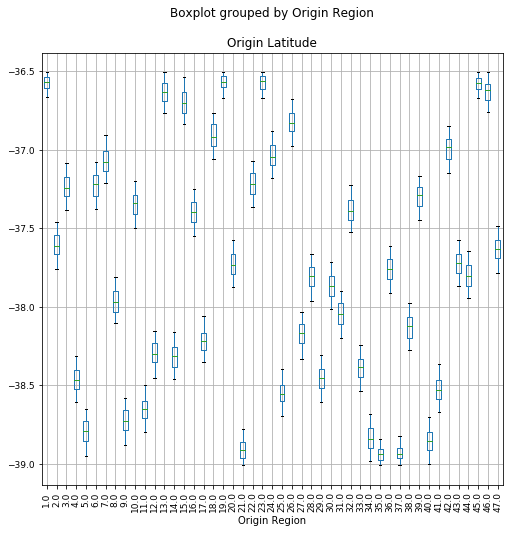

In [64]:
data.boxplot('Origin Latitude',by='Origin Region',rot=90,fontsize=9,figsize=(8,8))

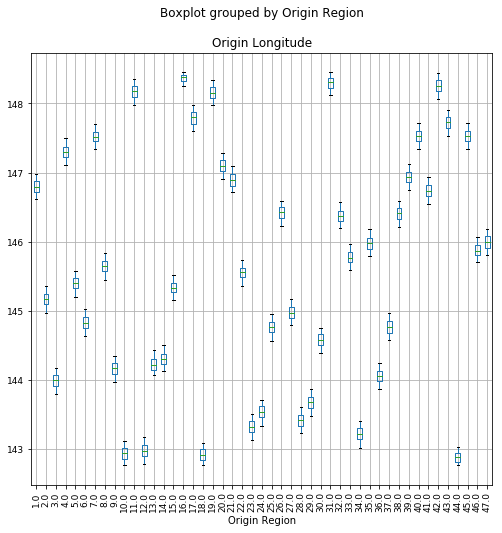

In [65]:
data.boxplot('Origin Longitude',by='Origin Region',rot=90,fontsize=9,figsize=(8,8))

### 4.8 Origin Region (Coverage Error - Missing Values)

We know from the EDA that <b>Origin Region</b> contains 10 missing values. Also in Section 3.3.2, we found out that <b>Origin Region</b> is a categorical representation based on the <b>Origin Latitude</b> and <b>Origin Longitude</b>.

In [66]:
data.loc[data['Origin Region'].isnull(),:]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
38,ID1975815560,2.0,0.0,25.655,NaN,2.0,-36.952246,148.112123,-37.626433,145.069693,279.686,2018-02-09,06:50:31,273.03,11:23:32,135.39,1
4123,ID1661617511,1.0,0.0,5.141,NaN,47.0,-38.848237,146.975309,-37.712827,146.024248,151.263,2018-04-13,03:16:46,157.93,5:54:41,107.13,3
6178,ID1478153520,1.0,0.0,39.654,NaN,32.0,-38.477483,147.470908,-37.501100,146.404776,143.391,2018-04-02,03:50:12,150.06,6:20:15,106.62,3
8223,ID1905146399,3.0,0.0,30.839,NaN,11.0,-37.842200,144.173330,-38.635876,148.073250,352.207,2018-02-03,06:20:59,288.77,11:09:45,174.12,1
14381,ID5311817849,1.0,1.0,33.091,NaN,39.0,-38.223250,146.286303,-37.168518,146.940719,130.795,2018-01-24,13:58:27,137.46,16:15:54,134.95,2
16419,ID1168741194,3.0,0.0,15.089,NaN,27.0,-38.560927,148.052669,-38.187001,144.947713,274.133,2018-06-28,20:46:03,226.31,0:32:21,178.06,2
18005,ID1391855399,1.0,0.0,5.126,NaN,2.0,-36.602904,146.716703,-37.603004,145.049147,185.230,2018-06-15,01:53:04,191.90,5:04:58,107.08,3
18476,ID1779546026,3.0,0.0,15.123,NaN,2.0,-38.724449,144.213740,-37.634914,145.330377,155.744,2018-03-26,06:33:40,131.59,8:45:15,160.56,1
32800,ID1225487173,3.0,0.0,8.806,NaN,23.0,-38.190258,147.602585,-36.559082,143.325108,419.644,2018-03-27,18:18:17,342.72,0:01:00,195.23,2
39350,ID1773872114,1.0,0.0,23.352,NaN,20.0,-38.569921,146.570257,-37.731385,146.938934,98.765,2018-02-08,04:49:00,105.43,6:34:25,103.16,3


Hence, we make use of the same technique we fixed errors in <b>Origin Region</b> in Section 4.7 by making use of the two columns to impute the 10 missing <b>Origin Region</b>. For each <b>Origin Region</b>, we get the mean value of <b>Origin Latitude</b> and <b>Origin Longitude</b>.

In [67]:
data.loc[:,['Origin Latitude','Origin Longitude']].groupby(data['Origin Region']).mean().sort_values(by=['Origin Latitude','Origin Longitude'])

,Origin Latitude,Origin Longitude
Origin Region,,
35.0,-38.938321,145.983004
37.0,-38.929510,144.768973
21.0,-38.907527,146.897526
40.0,-38.851432,147.528155
34.0,-38.833509,143.219679
5.0,-38.791001,145.394546
9.0,-38.725478,144.170648
11.0,-38.655282,148.172540
25.0,-38.550592,144.764958


For each of the row, we compare it's <b>Origin Latitude</b> and <b>Origin Longitude</b> across the means of the two columns for all <b>Origin Region</b>, and impute the missing <b>Origin Region</b> with the <b>Origin Region</b> that has the smallest difference between the mean and the values in this particular row.

In [68]:
# store the index of this rows in a variable so we can compare after making changes to them
missing_indexes=data.index[data['Origin Region'].isnull()].tolist()
# first we get the mean of each 'Origin Longitude' for each 'Origin Region' using groupby function and store it in a list
olong_mean=np.around(list(data['Origin Longitude'].groupby(data['Origin Region']).mean()),2)
# then we get the mean of each 'Origin Latitude' for each 'Origin Region' using groupby function and store it in a list
olat_mean=np.around(list(data['Origin Latitude'].groupby(data['Origin Region']).mean()),2)
# we then store the 'Origin Latitude' of the 10 rows with missing 'Origin Region' in a list to compare with olat_mean
olat_compare=np.around(list(data.loc[(data['Origin Region'].isnull()),'Origin Latitude']),2)
# we then store the 'Origin Longitude' of the 10 rows with missing 'Origin Region' in a list to compare with olon_mean
olong_compare=np.around(list(data.loc[(data['Origin Region'].isnull()),'Origin Longitude']),2)
# we then use for-loops to help us match 'Origin Latitude' and 'Origin Longitude' with the closest to the mean of these 2 columns from the whole data
# we will get a result which stores the 'imputed' 'Origin Region' for the 10 missing rows after comparing 'Origin Longitude/Latitude'
# initialise empty list to store imputed 'Origin Region'
result=[]
# loop through each of the 10 latitude
for i in range(0,len(olat_compare)):
    temp_result=[]
    # add index of olat_mean to temp_result if the difference between this latitude and the latitude mean is <=0.2
    for j in range(0,len(olat_mean)):
        if (abs(olat_mean[j]-olat_compare[i])<=0.2):
            temp_result.append(j)
    # for each index in temp_result, we compare the olong_mean and longitude of this particular row i
    for each in temp_result:
        # if the difference is <=0.2, we the index+1 to result which represent the imputed 'Origin Region'
        if (abs(olong_mean[each]-olong_compare[i])<=0.2):
            result.append(float(each+1))

# we can then assign the imputed 'Origin Region' to the 10 missing rows
data.loc[(data['Origin Region'].isnull()),'Origin Region']=result
# note the 10 missing 'Origin Region' has been imputed
data.iloc[missing_indexes]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
38,ID1975815560,2.0,0.0,25.655,42.0,2.0,-36.952246,148.112123,-37.626433,145.069693,279.686,2018-02-09,06:50:31,273.03,11:23:32,135.39,1
4123,ID1661617511,1.0,0.0,5.141,21.0,47.0,-38.848237,146.975309,-37.712827,146.024248,151.263,2018-04-13,03:16:46,157.93,5:54:41,107.13,3
6178,ID1478153520,1.0,0.0,39.654,4.0,32.0,-38.477483,147.470908,-37.501100,146.404776,143.391,2018-04-02,03:50:12,150.06,6:20:15,106.62,3
8223,ID1905146399,3.0,0.0,30.839,36.0,11.0,-37.842200,144.173330,-38.635876,148.073250,352.207,2018-02-03,06:20:59,288.77,11:09:45,174.12,1
14381,ID5311817849,1.0,1.0,33.091,38.0,39.0,-38.223250,146.286303,-37.168518,146.940719,130.795,2018-01-24,13:58:27,137.46,16:15:54,134.95,2
16419,ID1168741194,3.0,0.0,15.089,11.0,27.0,-38.560927,148.052669,-38.187001,144.947713,274.133,2018-06-28,20:46:03,226.31,0:32:21,178.06,2
18005,ID1391855399,1.0,0.0,5.126,1.0,2.0,-36.602904,146.716703,-37.603004,145.049147,185.230,2018-06-15,01:53:04,191.90,5:04:58,107.08,3
18476,ID1779546026,3.0,0.0,15.123,9.0,2.0,-38.724449,144.213740,-37.634914,145.330377,155.744,2018-03-26,06:33:40,131.59,8:45:15,160.56,1
32800,ID1225487173,3.0,0.0,8.806,17.0,23.0,-38.190258,147.602585,-36.559082,143.325108,419.644,2018-03-27,18:18:17,342.72,0:01:00,195.23,2
39350,ID1773872114,1.0,0.0,23.352,41.0,20.0,-38.569921,146.570257,-37.731385,146.938934,98.765,2018-02-08,04:49:00,105.43,6:34:25,103.16,3


### 4.9 Destination Region (Semantic Error - Inconsistent Values)

In Section 3.3.3, it was discussed that there were some points in <b>Destination Region</b> in which it's <b>Destination Latitude</b> and <b>Destination Longitude</b> does not lie in that <b>Destination Region</b>.

We can make use of the mean of <b>Destination Latitude</b> and <b>Destination Longitude</b> across each <b>Destination Region</b>, and compare all the rows in our dataframe with the means based on each <b>Destination Region</b>, and then identify the rows whose <b>Destination Region</b> does not tally with it's <b>Destination Latitude</b> and <b>Destination Longitude</b>

We will first write a function to identify these rows.

In [69]:
# create a dataframe to store the mean of Destination Latitude and Destination Longitude across the 47 Destination Region
dest_mean=pd.DataFrame(data.loc[:,['Destination Latitude','Destination Longitude']].groupby(data['Destination Region']).mean())
# write a function to identify the rows with errors in Destination Region
def region_error(dataframe):
    # if Destination Region is not null
    if not np.isnan(dataframe['Destination Region']):
        # return error if Destination latitude or Destination longitude differs by more than 0.3 as compared to the means in dest_mean
        if ((abs(dest_mean.iloc[int(dataframe['Destination Region'])-1,0]-dataframe['Destination Latitude'])>0.3) or (abs(dest_mean.iloc[int(dataframe['Destination Region'])-1,1]-dataframe['Destination Longitude'])>0.3)):
            return "Error"
        # return okay if there's no error or Origin Region
        else:
            return "Okay"
    else:
        return "NAN"

After which, we will create a new column <b>Check</b> in data dataframe which will return `Error`,`NAN` or `Okay` if that the <b>Destination Region</b> in that particular row contains error with respect to it's <b>Destination Latitude</b> and <b>Destination Longitude</b>, NAN values or otherwise respectively. 

There are a total of 19 such rows with errors in <b>Destination Region</b> based on their <b>Destination Latitude</b> and <b>Destination Longitude</b>.

In [70]:
# classify rows to Error, NAN or Okay based on Destination Region by applying region_error function
data['Check']=data.apply(region_error,axis=1)
# return number of rows with errors in Destination Region
print(len(data.loc[data['Check']=='Error',:]))
# return first 10 rows with errors in Destination Region
data.loc[data['Check']=='Error',:].head(10)

19


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Check
304,ID1282413530,1.0,0.0,16.488,12.0,9.0,-38.398171,142.846849,-38.944567,144.582839,162.670,2018-07-07,01:23:19,169.34,4:12:39,107.94,3,Error
1255,ID1670006239,2.0,0.0,22.128,20.0,22.0,-37.754791,147.080603,-38.334043,147.835791,92.416,2018-01-18,12:43:25,94.68,14:18:05,128.55,2,Error
2353,ID5162730290,1.0,1.0,29.250,25.0,26.0,-38.520163,144.795549,-38.830732,147.585939,244.941,2018-03-21,10:50:46,251.61,15:02:22,126.28,1,Error
2356,ID1261835530,1.0,0.0,35.445,31.0,37.0,-38.111853,148.159451,-38.755831,147.637204,84.927,2018-07-15,18:12:36,91.59,19:44:11,86.84,2,Error
2359,ID1913763377,3.0,0.0,16.201,18.0,39.0,-36.895943,142.846762,-36.547386,145.254167,218.273,2018-07-02,06:50:48,181.62,9:52:25,163.67,1,Error
2369,ID5595253446,1.0,1.0,13.107,23.0,26.0,-36.635980,143.346360,-37.622836,145.876151,249.941,2018-04-08,17:33:04,256.61,21:49:40,142.35,2,Error
8487,ID1227606099,1.0,0.0,36.120,29.0,9.0,-38.363184,143.671426,-38.765461,148.136625,391.181,2018-05-02,09:14:02,397.85,15:51:53,104.49,1,Error
12600,ID1388151952,1.0,0.0,13.904,30.0,23.0,-37.880331,144.670032,-38.121932,146.397788,153.920,2018-02-04,10:00:30,160.59,12:41:05,87.96,1,Error
16676,ID1556722916,2.0,0.0,7.689,41.0,3.0,-38.501272,146.931187,-37.734959,143.372585,323.093,2018-03-05,04:05:28,314.37,9:19:50,160.17,3,Error
16786,ID1734668992,2.0,0.0,36.669,4.0,17.0,-38.431275,147.479590,-37.847401,144.002861,311.236,2018-03-27,07:58:26,303.08,13:01:30,137.13,1,Error


In order to correct this, we make use of the means of <b>Destination Latitude</b> and <b>Destination Longitude</b> across each <b>Destination Region</b> and for each of the row with error, we compare it's <b>Destination Latitude</b> and <b>Destination Longitude</b> across the means of the two columns for all <b>Destination Region</b>, and replace the <b>Destination Region</b> with the <b>Destination Region</b> that has the smallest difference between the mean and the values in this particular row.

In [71]:
# store the index of this rows in a variable so we can compare after making changes to them
error_indexes=data.index[data['Check']=='Error'].tolist()
# first we get the mean of each 'Destination Longitude' for each 'Destination Region' using groupby function and store it in a list
dlong_mean=np.around(list(data['Destination Longitude'].groupby(data['Destination Region']).mean()),2)
# then we get the mean of each 'Destination Latitude' for each 'Destination Region' using groupby function and store it in a list
dlat_mean=np.around(list(data['Destination Latitude'].groupby(data['Destination Region']).mean()),2)
# we then store the 'Destination Latitude' of the rows with 'Destination Region' errors in a list to compare with dlat_mean
dlat_compare=np.around(list(data.loc[(data['Check']=='Error'),'Destination Latitude']),2)
# we then store the 'Origin Longitude' of the rows with 'Origin Region' errors in a list to compare with dlon_mean
dlong_compare=np.around(list(data.loc[(data['Check']=='Error'),'Destination Longitude']),2)
# we then use for-loops to help us match 'Destination Latitude' and 'Destination Longitude' with the closest to the mean of these 2 columns from the whole data
# we will get a result which stores the 'imputed' 'Destination Region' for the error rows after comparing 'Destination Longitude/Latitude'
# initialise empty list to store imputed 'Destination Region'
result=[]
# loop through each of the latitude
for i in range(0,len(dlat_compare)):
    temp_result=[]
    # add index of dlat_mean to temp_result if the difference between this latitude and the latitude mean is <=0.3
    for j in range(0,len(dlat_mean)):
        if (abs(dlat_mean[j]-dlat_compare[i])<=0.3):
            temp_result.append(j)
    # for each index in temp_result, we compare the dlong_mean and dlongitude of this particular row i
    for each in temp_result:
        # if the difference is <=0.3, we the index+1 to result which represent the imputed 'Destination Region'
        if (abs(dlong_mean[each]-dlong_compare[i])<=0.3):
            result.append(float(each+1))

# we can then assign the imputed 'Destination Region' to the error rows
data.loc[(data['Check']=='Error'),'Destination Region']=result
# drop the column 'Check'
data=data.drop(['Check'],1)
# note the 19 'Destination Region' errors has been fixed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
304,ID1282413530,1.0,0.0,16.488,12.0,37.0,-38.398171,142.846849,-38.944567,144.582839,162.670,2018-07-07,01:23:19,169.34,4:12:39,107.94,3
1255,ID1670006239,2.0,0.0,22.128,20.0,17.0,-37.754791,147.080603,-38.334043,147.835791,92.416,2018-01-18,12:43:25,94.68,14:18:05,128.55,2
2353,ID5162730290,1.0,1.0,29.250,25.0,40.0,-38.520163,144.795549,-38.830732,147.585939,244.941,2018-03-21,10:50:46,251.61,15:02:22,126.28,1
2356,ID1261835530,1.0,0.0,35.445,31.0,40.0,-38.111853,148.159451,-38.755831,147.637204,84.927,2018-07-15,18:12:36,91.59,19:44:11,86.84,2
2359,ID1913763377,3.0,0.0,16.201,18.0,15.0,-36.895943,142.846762,-36.547386,145.254167,218.273,2018-07-02,06:50:48,181.62,9:52:25,163.67,1
2369,ID5595253446,1.0,1.0,13.107,23.0,47.0,-36.635980,143.346360,-37.622836,145.876151,249.941,2018-04-08,17:33:04,256.61,21:49:40,142.35,2
8487,ID1227606099,1.0,0.0,36.120,29.0,11.0,-38.363184,143.671426,-38.765461,148.136625,391.181,2018-05-02,09:14:02,397.85,15:51:53,104.49,1
12600,ID1388151952,1.0,0.0,13.904,30.0,38.0,-37.880331,144.670032,-38.121932,146.397788,153.920,2018-02-04,10:00:30,160.59,12:41:05,87.96,1
16676,ID1556722916,2.0,0.0,7.689,41.0,28.0,-38.501272,146.931187,-37.734959,143.372585,323.093,2018-03-05,04:05:28,314.37,9:19:50,160.17,3
16786,ID1734668992,2.0,0.0,36.669,4.0,36.0,-38.431275,147.479590,-37.847401,144.002861,311.236,2018-03-27,07:58:26,303.08,13:01:30,137.13,1


We see in the two boxplots below that the 19 errors in <b>Destination Region</b> has been fixed.

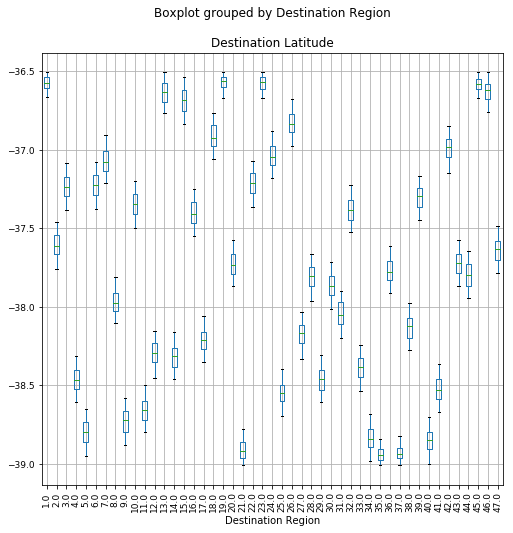

In [72]:
data.boxplot('Destination Latitude',by='Destination Region',rot=90,fontsize=9,figsize=(8,8))

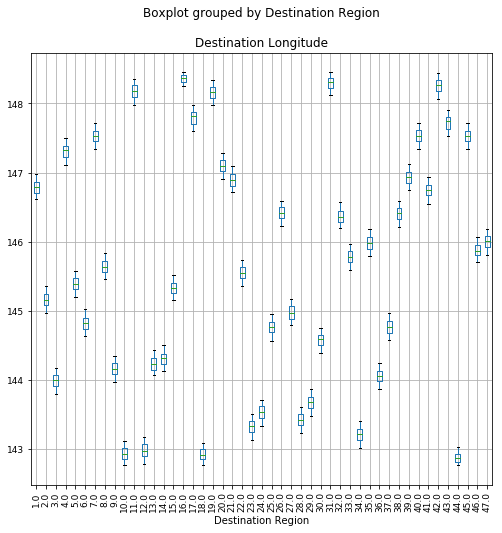

In [73]:
data.boxplot('Destination Longitude',by='Destination Region',rot=90,fontsize=9,figsize=(8,8))

### 4.10 Destination Region (Coverage Error - Missing Values)

We know from the EDA that <b>Destination Region</b> contains 10 missing values. Also in Section 3.3.3, we found out that <b>Destination Region</b> is a categorical representation based on the <b>Destination Latitude</b> and <b>Destination Longitude</b>.

In [74]:
data.loc[data['Destination Region'].isnull(),:]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
51,ID5977202234,1.0,1.0,33.246,21.0,NaN,-38.935166,146.735323,-37.484562,146.253738,166.880,2018-05-20,04:13:24,173.55,7:06:57,142.42,3
53,ID1159012822,2.0,0.0,28.306,36.0,NaN,-37.745920,143.995922,-38.520907,145.729105,174.558,2018-04-02,20:48:00,172.91,23:40:54,135.28,2
59,ID5116764316,1.0,1.0,14.304,2.0,NaN,-37.566900,145.234004,-36.617177,144.422094,127.960,2018-03-19,09:11:45,134.63,11:26:22,123.50,1
18494,ID1410937071,1.0,0.0,12.485,14.0,NaN,-38.281102,144.192075,-36.799394,142.875848,201.743,2018-06-02,08:09:36,208.41,11:38:00,87.49,1
18496,ID1869896442,2.0,0.0,8.696,13.0,NaN,-36.591795,144.305745,-36.988099,143.639881,73.957,2018-05-12,17:20:15,77.10,18:37:20,130.35,2
22585,ID1266769608,1.0,0.0,19.232,47.0,NaN,-37.694358,146.045895,-38.887753,147.370856,176.202,2018-01-19,00:54:41,182.87,3:57:33,108.30,3
26269,ID5353093648,1.0,1.0,30.219,36.0,NaN,-37.899683,144.079768,-37.039587,143.617674,104.084,2018-02-19,19:48:35,110.75,21:39:20,130.33,2
28735,ID1339372525,1.0,0.0,20.831,19.0,NaN,-36.608714,148.303905,-37.921017,145.758827,268.641,2018-02-20,23:29:40,275.31,4:04:58,116.95,3
30728,ID1229493428,2.0,0.0,16.220,33.0,NaN,-38.348192,145.721019,-37.666716,146.059449,81.461,2018-05-22,12:20:18,84.25,13:44:33,128.85,2
36925,ID1855362189,2.0,0.0,15.387,34.0,NaN,-38.774657,143.111211,-37.039903,148.181933,485.330,2018-03-18,21:22:17,468.89,5:11:10,168.04,3


Hence, we make use of the same technique we fixed errors in <b>Destination Region</b> in Section 4.9 by making use of the two columns to impute the 10 missing <b>Destination Region</b>. For each <b>Destination Region</b>, we get the mean value of <b>Destination Latitude</b> and <b>Destination Longitude</b>.

In [75]:
data.loc[:,['Destination Latitude','Destination Longitude']].groupby(data['Destination Region']).mean().sort_values(by=['Destination Latitude','Destination Longitude'])

,Destination Latitude,Destination Longitude
Destination Region,,
35.0,-38.938941,145.984910
37.0,-38.928120,144.768011
21.0,-38.910976,146.894148
40.0,-38.847266,147.533850
34.0,-38.837008,143.212676
5.0,-38.797389,145.391843
9.0,-38.727210,144.164184
11.0,-38.655728,148.175627
25.0,-38.548973,144.761893


For each of the row, we compare it's <b>Destination Latitude</b> and <b>Destination Longitude</b> across the means of the two columns for all <b>Destination Region</b>, and impute the missing <b>Destination Region</b> with the <b>Destination Region</b> that has the smallest difference between the mean and the values in this particular row.

In [76]:
# store the index of this rows in a variable so we can compare after making changes to them
missing_indexes=data.index[data['Destination Region'].isnull()].tolist()
# first we get the mean of each 'Destination Longitude' for each 'Destination Region' using groupby function and store it in a list
dlong_mean=np.around(list(data['Destination Longitude'].groupby(data['Destination Region']).mean()),2)
# then we get the mean of each 'Destination Latitude' for each 'Destination Region' using groupby function and store it in a list
dlat_mean=np.around(list(data['Destination Latitude'].groupby(data['Destination Region']).mean()),2)
# we then store the 'Destination Latitude' of the 10 rows with missing 'Destination Region' in a list to compare with dlat_mean
dlat_compare=np.around(list(data.loc[(data['Destination Region'].isnull()),'Destination Latitude']),2)
# we then store the 'Origin Longitude' of the 10 rows with missing 'Origin Region' in a list to compare with dlon_mean
dlong_compare=np.around(list(data.loc[(data['Destination Region'].isnull()),'Destination Longitude']),2)
# we then use for-loops to help us match 'Destination Latitude' and 'Destination Longitude' with the closest to the mean of these 2 columns from the whole data
# we will get a result which stores the 'imputed' 'Destination Region' for the 10 missing rows after comparing 'Destination Longitude/Latitude'
# initialise empty list to store imputed 'Destination Region'
result=[]
# loop through each of the 10 latitude
for i in range(0,len(dlat_compare)):
    temp_result=[]
    # add index of dlat_mean to temp_result if the difference between this latitude and the latitude mean is <=0.2
    for j in range(0,len(dlat_mean)):
        if (abs(dlat_mean[j]-dlat_compare[i])<=0.2):
            temp_result.append(j)
    # for each index in temp_result, we compare the dlong_mean and dlongitude of this particular row i
    for each in temp_result:
        # if the difference is <=0.2, we the index+1 to result which represent the imputed 'Destination Region'
        if (abs(dlong_mean[each]-dlong_compare[i])<=0.2):
            result.append(float(each+1))

# we can then assign the imputed 'Destination Region' to the 10 missing rows
data.loc[(data['Destination Region'].isnull()),'Destination Region']=result
# note the 10 missing 'Destination Region' has been imputed
data.iloc[missing_indexes]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
51,ID5977202234,1.0,1.0,33.246,21.0,32.0,-38.935166,146.735323,-37.484562,146.253738,166.880,2018-05-20,04:13:24,173.55,7:06:57,142.42,3
53,ID1159012822,2.0,0.0,28.306,36.0,33.0,-37.745920,143.995922,-38.520907,145.729105,174.558,2018-04-02,20:48:00,172.91,23:40:54,135.28,2
59,ID5116764316,1.0,1.0,14.304,2.0,13.0,-37.566900,145.234004,-36.617177,144.422094,127.960,2018-03-19,09:11:45,134.63,11:26:22,123.50,1
18494,ID1410937071,1.0,0.0,12.485,14.0,18.0,-38.281102,144.192075,-36.799394,142.875848,201.743,2018-06-02,08:09:36,208.41,11:38:00,87.49,1
18496,ID1869896442,2.0,0.0,8.696,13.0,24.0,-36.591795,144.305745,-36.988099,143.639881,73.957,2018-05-12,17:20:15,77.10,18:37:20,130.35,2
22585,ID1266769608,1.0,0.0,19.232,47.0,40.0,-37.694358,146.045895,-38.887753,147.370856,176.202,2018-01-19,00:54:41,182.87,3:57:33,108.30,3
26269,ID5353093648,1.0,1.0,30.219,36.0,24.0,-37.899683,144.079768,-37.039587,143.617674,104.084,2018-02-19,19:48:35,110.75,21:39:20,130.33,2
28735,ID1339372525,1.0,0.0,20.831,19.0,8.0,-36.608714,148.303905,-37.921017,145.758827,268.641,2018-02-20,23:29:40,275.31,4:04:58,116.95,3
30728,ID1229493428,2.0,0.0,16.220,33.0,47.0,-38.348192,145.721019,-37.666716,146.059449,81.461,2018-05-22,12:20:18,84.25,13:44:33,128.85,2
36925,ID1855362189,2.0,0.0,15.387,34.0,42.0,-38.774657,143.111211,-37.039903,148.181933,485.330,2018-03-18,21:22:17,468.89,5:11:10,168.04,3


### 4.11 Journey Distance (Semantic Error - Invalid Values)

We know in the EDA in Section 3.3.5 that <b>Journey Distance</b> contains semantic error in which there are 15 rows with <b>Journey Distance</b> that does not tally with the calculated distance between <b>Origin/Destination Latitude/Longitude</b> using the haversine formula.

In [77]:
# create a new column 'Calculated Distance' which store the calculated distance after applying haversine function
data['Calculated Distance']=haversine(data['Origin Longitude'],data['Origin Latitude'],data['Destination Longitude'],data['Destination Latitude'])
# create another column 'Dist Diff' which store the difference between 'Calculated Distance' and 'Journey Distance'
data['Dist Diff']=abs(data['Calculated Distance']-data['Journey Distance'])
#return first 10 rows with significant Dist Diff
data.loc[data['Dist Diff']>0.001,:].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Calculated Distance,Dist Diff
2279,ID1197075289,1.0,0.0,37.986,23.0,14.0,-36.525059,143.228321,-38.377477,144.386945,236.321,2018-01-18,03:43:38,236.89,7:40:31,116.13,3,230.221,6.1
4318,ID1627211112,1.0,0.0,8.038,21.0,17.0,-38.984131,146.952464,-38.240824,147.853328,117.157,2018-06-20,00:28:39,120.62,2:29:16,110.14,3,113.957,3.2
6365,ID1735456635,1.0,0.0,5.645,40.0,6.0,-38.840154,147.570518,-37.281397,144.799955,303.428,2018-05-18,05:03:02,305.09,10:08:07,118.61,3,298.428,5.0
6381,ID1882488438,1.0,0.0,29.610,35.0,9.0,-38.953835,145.805104,-38.761136,144.346285,134.061,2018-07-07,20:34:20,134.93,22:49:15,94.61,2,128.261,5.8
8417,ID1622705442,1.0,0.0,6.266,20.0,35.0,-37.872880,147.054729,-38.968449,145.798313,162.948,2018-01-25,03:11:09,170.61,6:01:45,104.11,3,163.948,1.0
8419,ID5993610598,2.0,1.0,39.332,16.0,37.0,-37.395265,148.271057,-38.948939,144.701937,354.689,2018-02-10,03:18:36,346.66,9:05:15,196.54,3,356.989,2.3
10275,ID1414961628,3.0,0.0,34.278,7.0,32.0,-37.164566,147.470662,-37.469235,146.304506,113.567,2018-03-18,21:17:21,93.93,22:51:16,183.83,3,108.667,4.9
12506,ID5448310823,1.0,1.0,10.467,13.0,4.0,-36.720297,144.166873,-38.446053,147.415145,346.848,2018-04-18,09:22:58,351.61,15:14:34,133.92,1,344.948,1.9
12520,ID1202616534,2.0,0.0,27.357,9.0,6.0,-38.718571,144.269222,-37.268685,144.969007,171.376,2018-03-02,10:51:39,171.12,13:42:46,121.70,1,172.676,1.3
14375,ID1159653111,1.0,0.0,32.801,12.0,19.0,-38.293179,142.832308,-36.533965,148.099219,504.677,2018-01-22,11:02:45,511.74,19:34:29,115.74,1,505.077,0.4


We can fix this error by replacing the value of <b>Journey Distance</b> with <b>Calculated Distance</b>, which was based upon applying haversine formula on the set of <b>Origin/Destination Latitude/Longitude</b>.

After fixing the errors, we plot the <b>Journey Distance</b> against <b>Calculated Distance</b> and we now see a completely positive linear line with no points lying out of this line.

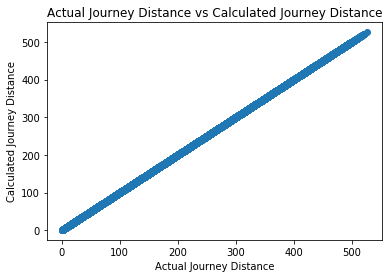

In [78]:
# replace Journey Distance with Calculated Distance
data.loc[data['Dist Diff']>0.001,'Journey Distance']=data.loc[data['Dist Diff']>0.001,'Calculated Distance']

# we plot Journey Distance against Calculated Distance to ensure the changes have been made
plt.scatter('Journey Distance','Calculated Distance',data=data)
plt.xlabel('Actual Journey Distance')
plt.ylabel('Calculated Journey Distance')
plt.title('Actual Journey Distance vs Calculated Journey Distance')
plt.show()

# drop the 2 columns 'Calculated Distance' and 'Dist Diff'
data=data.drop(['Calculated Distance','Dist Diff'],1)

### 4.12 Departure Date (Syntactic Error - Wrong Date Format)

In the EDA in Section 3.2.1, we found out that there were some dates which were in format of yyyy-dd-mm compared to the majority which were in yyyy-mm-dd format.

Since <b>Departure Date</b> is in string format, we can write functions to extract the year, month and day from the column and create new columns `Year`, `Month` and `Day` respectively to make our analysis easier.

In [79]:
# we first write a function to extract the year from a date string
def year_extract(date):
     return date.split('-')[0]
# create a new column 'Year' with the 1st set of integers from 'Departure Date' column
data['Year']=data['Departure Date'].apply(year_extract)

# write a function to extract the 2nd set of integers from a date string
def month_extract(date):
     return date.split('-')[1]
# create a new column 'Month' with the 2nd set of integers from 'Departure Date' column and we assume it as 'Month'
data['Month']=data['Departure Date'].apply(month_extract)

# we then write another function to extract the 3rd set of integers from a date string in order to confirm our suspicion
def day_extract(date):
     return date.split('-')[2]
# create a new column 'Day' with the 3rd set of integers from 'Departure Date' column and we assume it as 'Day'
data['Day']=data['Departure Date'].apply(day_extract)

Once we have created `Year`, `Month` and `Day` columns, we first look at the values of `Year` column to have a greater understanding of our dataset.

Note that all the deliveries in this dataset happened in year 2018.

In [80]:
data.Year.value_counts()

2018    39873
Name: Year, dtype: int64

Now let's look at the values of all the <b>Month</b> in this dataset.

Notice that majority of the data has <b>Month</b> from 01 to 07 while minority contains values greater than 12.

Also note that with the majority of the data with values from 01 to 07 in <b>Month</b>, we know the dataset we are working with lies in the period 2018 January to 2018 July.

In [81]:
data.Month.value_counts()

06    5835
03    5738
02    5673
05    5670
07    5652
04    5626
01    5569
16      11
14      10
27       9
28       8
18       8
15       8
25       7
20       7
13       7
17       6
26       6
19       5
22       5
23       4
21       4
24       4
30       1
Name: Month, dtype: int64

Since we know there was an issue whereby the month and day have been switched, and the correct <b>Departure Date</b> format should be in yyyy-mm-dd, we can filter out those data with <b>Month</b> greater than 12 as we know one year only contains twelve months.

Doing a cross-tabulation of <b>Month</b> > 12 with the <b>Day</b> column, we see these rows with <b>Month</b> > 12 have values from 01 to 07 in their <b>Day</b>.

Thus, we can confirm there is indeed a syntactic error whereby 110 records in <b>Departure Date</b> have their month and day switched.

In [82]:
# returns number of rows with Month > 12
print(len(data.Month[data.Month>'12']))
# Crosstab of Month>12 and their Day
pd.crosstab(data.Month[data.Month>'12'], data["Day"][data.Month>'12'])

110


Day,01,02,03,04,05,06,07
Month,,,,,,,
13,2,2,0,1,0,1,1
14,1,2,1,1,1,1,3
15,2,0,1,0,0,4,1
16,1,0,2,1,1,4,2
17,0,0,2,1,0,1,2
18,1,1,1,1,0,2,2
19,0,1,1,1,0,1,1
20,0,0,1,2,2,1,1
21,0,2,0,1,1,0,0


To fix this, we can write a function that extract the year,day and month from <b>Departure Date</b> with <b>Month</b> > 12 and return <b>Departure Date</b> as yyyy-mm-dd.

In [83]:
# we first store the indexes of these 110 rows in a variable in order to check whether they are correctly changed after that
error_indexes=data.loc[data['Month']>'12','Departure Date'].index.tolist()

# we create a function to split a date into 3 and concatenate a result with the initial 2nd and 3rd set of integers switched
def change_date(date):
    [y,d,m]=date.split('-')
    newdate=y + '-' + m + '-' + d
    return newdate

# apply change_date function to those with inverted months and days
data.loc[data['Month']>'12','Departure Date']=data.loc[data['Month']>'12','Departure Date'].apply(change_date)

# drop the columns Year, Month and Day
data=data.drop(['Year','Month','Day'],1)

# We see that now the 110 incorrect date format in Departure Date has been fixed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
381,ID1779602606,2.0,0.0,20.403,44.0,14.0,-37.672175,142.924291,-38.232930,144.310871,136.780,2018-05-26,00:42:37,136.93,2:59:32,142.09,3
823,ID1398788501,1.0,0.0,35.849,42.0,31.0,-36.896579,148.297740,-37.952499,148.440358,118.216,2018-04-20,16:53:27,124.88,18:58:19,94.92,2
826,ID1545529013,2.0,0.0,5.210,47.0,22.0,-37.584472,145.951433,-37.195052,145.635992,51.551,2018-02-13,23:51:07,55.76,0:46:52,136.72,3
1018,ID1591608821,2.0,0.0,10.441,9.0,33.0,-38.663976,144.323313,-38.493600,145.668566,118.592,2018-04-20,15:07:50,119.61,17:07:26,131.52,2
1024,ID5518422347,3.0,1.0,24.025,22.0,4.0,-37.195052,145.635992,-38.459570,147.305166,203.348,2018-02-14,11:26:37,169.68,14:16:17,210.70,1
1050,ID5456564238,1.0,1.0,20.247,45.0,1.0,-36.535556,147.473389,-36.535271,146.715995,67.743,2018-01-16,10:45:36,74.41,12:00:00,111.71,1
1064,ID1981060073,1.0,0.0,21.287,44.0,34.0,-37.847166,142.980169,-38.932324,143.307335,124.123,2018-03-20,17:58:44,130.79,20:09:31,93.77,2
1150,ID5205650505,1.0,1.0,21.469,3.0,46.0,-37.232504,144.144822,-36.674031,145.916771,169.439,2018-03-27,05:39:51,176.11,8:35:57,141.05,3
1191,ID1757818682,2.0,0.0,9.412,33.0,34.0,-38.391814,145.916319,-38.965299,143.126172,250.719,2018-06-22,09:29:03,245.45,13:34:29,130.48,1
1217,ID5288678262,3.0,1.0,31.453,13.0,30.0,-36.534544,144.236943,-37.880367,144.644594,154.110,2018-06-30,16:08:42,130.29,18:18:59,209.63,2


### 4.13 Departure Date (Syntactic Error - Invalid Dates)

Since we now know the time period of our dataset is from 2018 January to 2018 July, we should check if there are any invalid dates such as February 29, etc.

Making use of the functions we used to create <b>Month</b> and <b>Day</b> columns in Section 4.12, we do a cross-tabulation between these two columns after creating the two columns again.

Note that the following invalid dates [2] have been identified:
1. February 30 - 36 records
2. April 31 - 28 records
3. June 31 - 36 records

In [84]:
# create a column 'Month' by using the month_extract function defined previously on 'Departure Date'
data['Month']=data['Departure Date'].apply(month_extract)
# create a column 'Day' by using the day_extract function defined previously on 'Departure Date'
data['Day']=data['Departure Date'].apply(day_extract)
# crosstab of Month and Day
pd.crosstab(data.Month, data.Day)

Day,01,02,03,04,05,06,07,08,09,10,...,21,22,23,24,25,26,27,28,30,31
Month,,,,,,,,,,,,,,,,,,,,,
01,198,199,194,203,176,208,196,199,225,186,...,213,205,173,208,196,185,213,178,0,0
02,214,185,174,207,208,216,196,194,200,243,...,189,212,195,196,220,189,182,203,36,0
03,210,210,218,207,190,187,220,191,205,212,...,203,187,224,203,198,198,226,238,0,0
04,198,212,177,179,241,219,189,207,172,194,...,195,217,171,203,212,203,179,205,37,28
05,178,199,179,212,207,197,217,217,203,204,...,191,205,220,203,181,213,189,213,0,0
06,194,207,219,221,224,223,220,215,233,203,...,194,195,200,196,212,199,214,215,34,36
07,221,181,217,205,200,192,200,193,230,189,...,211,183,202,185,194,221,207,202,0,0


We can correct these 100 rows with invalid dates by treating the invalid dates as a miscalculations and replacing them with the correct dates:

1. Feb 30 to be replaced by Mar 02 (as Feb 30 was 2 days after Feb 28, and 2 days after Feb 28 2018 should have been Mar 02)
2. Apr 31 to be replaced by May 01 (as Apr 31 was 1 day after Apr 30, and 1 day after Apr 30 2018 should have been May 01)
3. Jun 31 to be replaced by Jul 01 (as Jun 31 was 1 day after Jun 30, and 1 day after Jun 30 2018 should have been Jul 01)

Once we have made the changes, we apply the same functions in Section 4.6 to create `Month` and `Day` once again and do a cross tabulation to ensure the changes to these 100 rows with invalid dates have been correctly changed.

In [85]:
# replace '2018-02-30' with '2018-03-02' as Feb 30 is two days after Feb 28, the correct date should be Mar 2
data.loc[(data['Month']=='02') & (data['Day']=='30'),'Departure Date']='2018-03-02'
# replace '2018-04-31' with '2018-05-01' as Apr 31 is one day afte Apr 30, the correct date should be May 1
data.loc[(data['Month']=='04') & (data['Day']=='31'),'Departure Date']='2018-05-01'
# replace '2018-06-31' with '2018-07-01' as Jun 31 is one day after Jun 30, the correct date should be Jul 1
data.loc[(data['Month']=='06') & (data['Day']=='31'),'Departure Date']='2018-07-01'
# once changes have been made, we recalculate column 'Month' and 'Day' so that we can do a crosstab again
data['Month']=data['Departure Date'].apply(month_extract)
data['Day']=data['Departure Date'].apply(day_extract)
# we see the 100 errors in 'Departure Date' have been made
pd.crosstab(data.Month, data.Day)

Day,01,02,03,04,05,06,07,08,09,10,...,20,21,22,23,24,25,26,27,28,30
Month,,,,,,,,,,,,,,,,,,,,,
01,198,199,194,203,176,208,196,199,225,186,...,182,213,205,173,208,196,185,213,178,0
02,214,185,174,207,208,216,196,194,200,243,...,214,189,212,195,196,220,189,182,203,0
03,210,246,218,207,190,187,220,191,205,212,...,190,203,187,224,203,198,198,226,238,0
04,198,212,177,179,241,219,189,207,172,194,...,204,195,217,171,203,212,203,179,205,37
05,206,199,179,212,207,197,217,217,203,204,...,202,191,205,220,203,181,213,189,213,0
06,194,207,219,221,224,223,220,215,233,203,...,196,194,195,200,196,212,199,214,215,34
07,257,181,217,205,200,192,200,193,230,189,...,198,211,183,202,185,194,221,207,202,0


In [86]:
# remove the 'Month' and 'Day' column from data dataframe after fixing the error
data=data.drop(['Month','Day'],1)

### 4.14 Delivery Time/Departure Time (Semantic Error - Not tallying with Travel Time)

Earlier in the EDA in Section 3.3.4, when we created a column <b>Calculated Time</b> based on the difference between <b>Delivery Time</b> and <b>Departure Time </b>, we noticed that there were entries whereby the <b>Calculated Time</b> did not tally with <b>Travel Time</b>.

We first create the columns <b>Delivery Minutes</b>, <b>Departure Minutes</b> using the `time_to_min` function we defined in Section 3.3.4 to convert <b>Delivery Time</b> and <b>Departure Time</b> into minutes. Then we create <b>Calculated Time</b> based on the difference between <b>Delivery Minutes</b> and <b>Departure Minutes</b>. Note that after that, we will need to add one day worth of minutes (i.e. 1440 minutes) to those deliveries that were delivered the next day.

Once done, we have previously identified that we have some <b>Calculated Time</b> that was above 1000 minutes (i.e. 40 cases) and looking at the first 10 rows of these, we noticed <b>Travel Time</b> seems to make more sense if we use <b>Departure Time</b> - <b>Delivery Time</b>.

In [87]:
# Create a column 'Delivery Minutes' which is 'Delivery Time' in minutes
data['Delivery Minutes']=data['Delivery Time'].apply(time_to_min)
# Create a column 'Departure Minutes' which is 'Departure Time' in minutes
data['Departure Minutes']=data['Departure Time'].apply(time_to_min)
# create a column 'Calculated Time' using 'Delivery Minutes' - 'Departure Minutes'
data['Calculated Time']=data['Delivery Minutes']-data['Departure Minutes']
# adding one day worth of minutes to those Delivery Time one day after Departure Time
data.loc[data['Calculated Time']<0,'Calculated Time']+= 1440

# returns number of rows with Calculated Time > 1000
print (len(data.loc[(data['Calculated Time']>1000),:]))
# returns 1st 10 rows of Calculated Time > 1000
data.loc[(data['Calculated Time']>1000),:].head(10)

40


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Delivery Minutes,Departure Minutes,Calculated Time
762,ID1479439566,2.0,0.0,5.008,1.0,6.0,-36.581841,146.730593,-37.155480,144.704071,191.431,2018-04-15,16:03:45,188.98,12:54:47,131.66,2,774.783333,963.750000,1251.033333
766,ID1128656837,2.0,0.0,34.076,2.0,1.0,-37.757637,145.136078,-36.550378,146.828202,201.484,2018-02-15,16:00:56,198.56,12:42:23,137.37,2,762.383333,960.933333,1241.450000
793,ID1757677866,1.0,0.0,22.015,36.0,16.0,-37.829297,144.157921,-37.327455,148.315477,370.981,2018-04-13,23:37:01,377.65,17:19:23,111.34,3,1039.383333,1417.016667,1062.366667
799,ID1648563842,1.0,0.0,28.280,17.0,33.0,-38.262222,147.727579,-38.350628,145.766534,171.579,2018-06-07,22:13:28,178.25,19:15:13,98.10,3,1155.216667,1333.466667,1261.750000
2171,ID1348620108,1.0,0.0,11.196,5.0,16.0,-38.692621,145.408449,-37.407901,148.444526,302.105,2018-05-13,22:46:16,308.77,17:37:30,105.70,3,1057.500000,1366.266667,1131.233333
2800,ID1382723485,3.0,0.0,26.846,45.0,46.0,-36.540672,147.408585,-36.727639,145.939882,132.835,2018-02-10,21:03:00,113.27,19:09:44,170.05,3,1149.733333,1263.000000,1326.733333
6170,ID5380894668,1.0,1.0,40.232,27.0,35.0,-38.253590,144.983722,-38.892562,146.092731,119.893,2018-03-09,19:15:37,126.56,17:09:04,132.44,2,1029.066667,1155.616667,1313.450000
6888,ID1204706270,1.0,0.0,39.165,5.0,35.0,-38.678401,145.324527,-38.860616,145.949486,57.909,2018-03-27,20:07:20,64.58,19:02:46,85.49,2,1142.766667,1207.333333,1375.433333
8992,ID5556310854,3.0,1.0,17.780,12.0,20.0,-38.383068,142.953946,-37.791815,147.177972,375.856,2018-05-16,13:32:45,307.69,08:25:04,215.94,2,505.066667,812.750000,1132.316667
9028,ID1258739605,1.0,0.0,9.478,47.0,7.0,-37.626143,145.902297,-37.051044,147.472679,153.018,2018-02-14,23:00:55,159.68,20:21:15,89.46,3,1221.250000,1380.916667,1280.333333


We can fix these 40 rows by switching their <b>Delivery Time</b> and <b>Departure Time</b>.

Once the switch have been made, we calculate the <b>Calculated Time</b> again with the new <b>Delivery Minutes</b> and <b>Departure Minutes</b>.

In [88]:
# we first store the indexes of these 40 rows in a variable in order to check whether they are correctly changed after that
error_indexes=data.loc[(data['Calculated Time']>1000),:].index.tolist()

# switch Departure Time with Delivery Time
data.loc[(data['Calculated Time']>1000,'Departure Time')],data.loc[(data['Calculated Time']>1000,'Delivery Time')]=data.loc[(data['Calculated Time']>1000,'Delivery Time')],data.loc[(data['Calculated Time']>1000,'Departure Time')]

# Create a column 'Delivery Minutes' which is 'Delivery Time' in minutes
data['Delivery Minutes']=data['Delivery Time'].apply(time_to_min)
# Create a column 'Departure Minutes' which is 'Departure Time' in minutes
data['Departure Minutes']=data['Departure Time'].apply(time_to_min)
# create a column 'Calculated Time' using 'Delivery Minutes' - 'Departure Minutes'
data['Calculated Time']=data['Delivery Minutes']-data['Departure Minutes']
# adding one day worth of minutes to those Delivery Time one day after Departure Time
data.loc[data['Calculated Time']<0,'Calculated Time']+= 1440

# print out the first 10 rows after the switch has been made
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Delivery Minutes,Departure Minutes,Calculated Time
762,ID1479439566,2.0,0.0,5.008,1.0,6.0,-36.581841,146.730593,-37.155480,144.704071,191.431,2018-04-15,12:54:47,188.98,16:03:45,131.66,2,963.750000,774.783333,188.966667
766,ID1128656837,2.0,0.0,34.076,2.0,1.0,-37.757637,145.136078,-36.550378,146.828202,201.484,2018-02-15,12:42:23,198.56,16:00:56,137.37,2,960.933333,762.383333,198.550000
793,ID1757677866,1.0,0.0,22.015,36.0,16.0,-37.829297,144.157921,-37.327455,148.315477,370.981,2018-04-13,17:19:23,377.65,23:37:01,111.34,3,1417.016667,1039.383333,377.633333
799,ID1648563842,1.0,0.0,28.280,17.0,33.0,-38.262222,147.727579,-38.350628,145.766534,171.579,2018-06-07,19:15:13,178.25,22:13:28,98.10,3,1333.466667,1155.216667,178.250000
2171,ID1348620108,1.0,0.0,11.196,5.0,16.0,-38.692621,145.408449,-37.407901,148.444526,302.105,2018-05-13,17:37:30,308.77,22:46:16,105.70,3,1366.266667,1057.500000,308.766667
2800,ID1382723485,3.0,0.0,26.846,45.0,46.0,-36.540672,147.408585,-36.727639,145.939882,132.835,2018-02-10,19:09:44,113.27,21:03:00,170.05,3,1263.000000,1149.733333,113.266667
6170,ID5380894668,1.0,1.0,40.232,27.0,35.0,-38.253590,144.983722,-38.892562,146.092731,119.893,2018-03-09,17:09:04,126.56,19:15:37,132.44,2,1155.616667,1029.066667,126.550000
6888,ID1204706270,1.0,0.0,39.165,5.0,35.0,-38.678401,145.324527,-38.860616,145.949486,57.909,2018-03-27,19:02:46,64.58,20:07:20,85.49,2,1207.333333,1142.766667,64.566667
8992,ID5556310854,3.0,1.0,17.780,12.0,20.0,-38.383068,142.953946,-37.791815,147.177972,375.856,2018-05-16,08:25:04,307.69,13:32:45,215.94,2,812.750000,505.066667,307.683333
9028,ID1258739605,1.0,0.0,9.478,47.0,7.0,-37.626143,145.902297,-37.051044,147.472679,153.018,2018-02-14,20:21:15,159.68,23:00:55,89.46,3,1380.916667,1221.250000,159.666667


After the switch has been made, we plot the <b>Calculated Time</b> against <b>Travel Time</b> and notice there are still some points in which the two values are different.

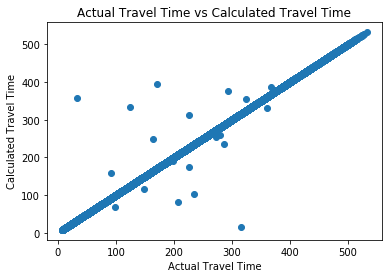

In [89]:
plt.scatter('Travel Time','Calculated Time',data=data)
plt.xlabel('Actual Travel Time')
plt.ylabel('Calculated Travel Time')
plt.title('Actual Travel Time vs Calculated Travel Time')
plt.show()

### 4.15 Delivery Time (Semantic Error - Does not tally with Departure Time & Travel Time)

To explore those points we saw in Section 4.14 whereby there are difference between <b>Calculated Time</b> and <b>Travel Time</b>, we first create another column which is the difference between the two.

There are a total of 20 cases whereby the <b>Calculated Time</b> and <b>Travel Time</b> did not tally.

Since we know <b>Journey Distance</b> is correlated to <b>Travel Time</b>, looking at these two columns together with <b>Calculated Time</b> for the 20 cases, it seems to suggest that <b>Travel Time</b> is correct instead of <b>Calculated Time</b>. For instance, a <b>Journey Distance</b> of 89.479 km makes more sense of a <b>Travel Time</b> in 91.88 minutes compared to <b>Calculated Time</b> of 157.983 minutes.

In [90]:
# Create another column to compare the difference between 'Calculated Time' and 'Travel Time'
data['Diff Time']=abs(data['Travel Time']-data['Calculated Time'])

# returns number of rows with difference
print(len(data.loc[data['Diff Time']>1,:]))
# returns Journey Distance, Travel Time, Calculated Time
data.loc[data['Diff Time']>1,['Journey Distance','Travel Time','Calculated Time']]

20


,Journey Distance,Travel Time,Calculated Time
2519,361.178,367.84,386.916667
4583,317.569,324.24,355.466667
8670,286.759,293.43,377.050000
12750,172.174,170.64,394.033333
16845,89.479,91.88,157.983333
16851,353.940,360.61,331.483333
20598,192.230,198.90,191.266667
21566,349.512,286.61,235.866667
22606,117.356,124.02,333.950000
23462,250.689,207.55,82.450000


We fix the 20 rows by adding it's <b>Travel Time</b> to <b>Departure Time</b>, in order to get the correct <b>Delivery Time</b>.

In [91]:
# we first store the indexes of these 20 rows in a variable in order to check whether they are correctly changed after that
error_indexes=data.loc[(data['Diff Time']>1),:].index.tolist()

# compute new Delivery Time by adding Departure Minutes and Travel Time
data.loc[(data['Diff Time']>1),'Delivery Time']=pd.to_datetime((data['Departure Minutes']+data['Travel Time']), unit='m').dt.strftime('%H:%M:%S')

# drop columns Delivery Minutes, Departure Minutes, Calculated Time, Diff Time
data=data.drop(['Delivery Minutes','Departure Minutes','Calculated Time','Diff Time'],1)

# print out the first 10 rows after the error has been fixed
data.iloc[error_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
2519,ID1838883773,1.0,0.0,10.246,43.0,29.0,-37.792099,147.776083,-38.360613,143.717749,361.178,2018-02-06,06:59:06,367.84,13:06:56,100.16,1
4583,ID5211359553,1.0,1.0,19.122,16.0,27.0,-37.401411,148.333866,-38.289335,144.900327,317.569,2018-06-21,20:57:31,324.24,02:21:45,146.10,2
8670,ID1309733442,1.0,0.0,22.230,44.0,46.0,-37.803148,143.024903,-36.508346,145.819414,286.759,2018-06-03,18:20:36,293.43,23:14:01,105.56,2
12750,ID1612804809,2.0,0.0,12.518,30.0,46.0,-37.880583,144.729247,-36.661888,145.926138,172.174,2018-02-20,08:47:57,170.64,11:38:35,124.56,1
16845,ID1156662416,2.0,0.0,12.437,30.0,3.0,-37.865105,144.598434,-37.248103,143.948531,89.479,2018-06-09,06:11:37,91.88,07:43:29,118.83,1
16851,ID5891193620,1.0,1.0,25.601,34.0,20.0,-38.786976,143.313799,-37.631166,147.083913,353.940,2018-01-16,10:21:47,360.61,16:22:23,141.36,1
20598,ID1605960256,1.0,0.0,19.394,7.0,11.0,-37.142338,147.484611,-38.790826,148.137114,192.230,2018-04-02,05:47:01,198.90,09:05:55,108.71,3
21566,ID5619767333,3.0,1.0,37.522,13.0,43.0,-36.651047,144.076774,-37.737121,147.775364,349.512,2018-03-28,13:33:54,286.61,18:20:30,226.36,2
22606,ID5149839805,1.0,1.0,19.397,35.0,8.0,-38.960706,146.144132,-37.975148,145.666026,117.356,2018-06-01,14:08:48,124.02,16:12:49,134.50,2
23462,ID1958149947,3.0,0.0,12.680,46.0,21.0,-36.719686,145.848005,-38.859011,146.738363,250.689,2018-07-09,00:07:49,207.55,03:35:22,182.13,3


### 4.16 Travel Time (Coverage Error - Missing Values)

We identified in the EDA that <b>Travel Time</b> contains 40 missing values. We can impute these missing values by using the difference between <b>Delivery Time</b> and <b>Departure Time</b> after having fix the errors in these two columns in Section 4.14 and 4.15.

We first use the function `time_to_min` in Section 3.3.4 to create two new columns <b>Delivery Minutes</b> and <b>Departure Minutes</b> which converts <b>Delivery Time</b> and <b>Departure Time</b> into minutes respectively. We then create a third column <b>Calculated Time</b> based on the difference of the previous two columns. Finally, we will impute the missing <b>Travel Time</b> with the value of <b>Calculated Time</b> for these 40 rows.

In [92]:
# store the index of this rows in a variable so we can compare after making changes to them
missing_indexes=data.index[data['Travel Time'].isnull()].tolist()

# Create a column 'Delivery Minutes' which is 'Delivery Time' in minutes
data['Delivery Minutes']=data['Delivery Time'].apply(time_to_min)
# Create a column 'Departure Minutes' which is 'Departure Time' in minutes
data['Departure Minutes']=data['Departure Time'].apply(time_to_min)
# create a column 'Calculated Time' using 'Delivery Minutes' - 'Departure Minutes'
data['Calculated Time']=data['Delivery Minutes']-data['Departure Minutes']
# fix those with Delivery Time one day after Departure Time by adding one day worth of minutes (i.e. 1440 minutes)
data.loc[data['Calculated Time']<0,'Calculated Time']+= 1440

# therefore, we can the 40 NA 'Travel Time' with these values in minutes
data.loc[data['Travel Time'].isnull(),'Travel Time']=np.around(data.loc[data['Travel Time'].isnull(),'Calculated Time'],2)

# drop columns Delivery Minutes, Departure Minutes, Calculated Time
data=data.drop(['Delivery Minutes','Departure Minutes','Calculated Time'],1)

# We see that we have imputed the 40 missing 'Travel Time'
data.iloc[missing_indexes].head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
78,ID5155834974,1.0,1.0,11.654,47.0,36.0,-37.656717,145.848915,-37.837967,143.901518,172.591,2018-05-12,04:24:05,179.25,7:23:20,149.36,3
2130,ID1799763468,1.0,0.0,23.682,19.0,23.0,-36.597423,148.290328,-36.555856,143.472084,430.704,2018-07-17,02:56:25,437.37,10:13:47,127.18,3
2485,ID1641750791,1.0,0.0,28.657,41.0,23.0,-38.510368,146.546644,-36.530840,143.272864,363.413,2018-04-19,07:47:39,370.07,13:57:43,100.92,1
4970,ID1822117718,1.0,0.0,9.329,3.0,26.0,-37.141587,144.000210,-36.737140,146.443135,221.960,2018-07-10,12:40:30,228.62,16:29:07,102.07,2
6575,ID1637262162,2.0,0.0,6.523,19.0,37.0,-36.654097,148.074507,-38.915499,144.641514,393.119,2018-01-05,01:29:08,381.07,7:50:12,166.42,3


### 4.17 Drone Type (Semantic Error -  Does not tally with speed)

We know in the EDA in Section 3 that <b>Drone Type</b> contains 10 missing values.
We were told in the description in Section 1 that each drone has three phases of flight and they may have different speeds at different phases. We further know that takeOff and Landing phases each take five minutes.

Using these information together with <b>Journey Distance</b> and <b>Travel Time</b>, we can calculate the overall average onRoute speed for each drone and formulate the following: <br>

5 * takeoff speed + 5 * landing speed = 60 * <b>Travel Distance</b> - (<b>Travel Time</b> - 10) ** average onRoute speed for drone x

Each drone will have a unique range of values for (5 * takeoff speed + 5 * landing speed), and we can use these to impute the missing values in <b>Drone Type</b>.

We first calculate the average onRoute speed for each drone. Afterwhich, we apply the above formula to the dataframe and create a column <b>Speed</b> which holds value of (5 * takeoff speed + 5 * landing speed)

In [93]:
# calculate onroute average speed for Drone Type 1
drone1_mean_time=(data.loc[data['Drone Type']==1.0,'Travel Time'].groupby(data['Post Type']).mean()/60).tolist()
drone1_mean_dist=data.loc[data['Drone Type']==1.0,'Journey Distance'].groupby(data['Post Type']).mean().tolist()
drone1_mean_speed=abs(drone1_mean_dist[0]-drone1_mean_dist[1])/abs(drone1_mean_time[0]-drone1_mean_time[1])

# calculate onroute average speed for Drone Type 2
drone2_mean_time=(data.loc[data['Drone Type']==2.0,'Travel Time'].groupby(data['Post Type']).mean()/60).tolist()
drone2_mean_dist=data.loc[data['Drone Type']==2.0,'Journey Distance'].groupby(data['Post Type']).mean().tolist()
drone2_mean_speed=abs(drone2_mean_dist[0]-drone2_mean_dist[1])/abs(drone2_mean_time[0]-drone2_mean_time[1])

# calculate onroute average speed for Drone Type 3
drone3_mean_time=(data.loc[data['Drone Type']==3.0,'Travel Time'].groupby(data['Post Type']).mean()/60).tolist()
drone3_mean_dist=data.loc[data['Drone Type']==3.0,'Journey Distance'].groupby(data['Post Type']).mean().tolist()
drone3_mean_speed=abs(drone3_mean_dist[0]-drone3_mean_dist[1])/abs(drone3_mean_time[0]-drone3_mean_time[1])

# function to return value of (5 * takeoff speed + 5 * landing speed) for each row based on 'Drone Type'
def cal_speed(dataframe):
    if not np.isnan(dataframe['Drone Type']):
        if dataframe['Drone Type']==1.0:
            return 60*dataframe['Journey Distance'] - drone1_mean_speed*(dataframe['Travel Time']-10)
        elif dataframe['Drone Type']==2.0:
            return 60*dataframe['Journey Distance'] - drone2_mean_speed*(dataframe['Travel Time']-10)
        elif dataframe['Drone Type']==3.0:
            return 60*dataframe['Journey Distance'] - drone3_mean_speed*(dataframe['Travel Time']-10)
    else:
        return 'NAN'

# create column 'Speed' by applying cal_speed function
data['Speed']=data.apply(cal_speed,axis=1).astype(float)
data.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Speed
0,ID1647165072,2.0,0.0,39.026,37.0,10.0,-38.952201,144.703351,-37.317709,142.848358,243.882,2018-06-04,11:04:36,238.94,15:03:32,128.28,1,233.556661
1,ID5409408834,2.0,1.0,36.443,23.0,39.0,-36.634606,143.201274,-37.287760,146.951739,341.399,2018-04-26,13:50:32,331.81,19:22:20,185.86,2,243.444167
2,ID1860010758,1.0,0.0,27.170,5.0,13.0,-38.884370,145.426791,-36.758926,144.082466,264.476,2018-07-23,21:31:03,271.14,2:02:11,115.01,3,405.364535
3,ID1704840028,2.0,0.0,13.864,42.0,45.0,-36.970133,148.265338,-36.599126,147.638070,69.519,2018-04-25,08:18:31,72.88,9:31:23,117.30,1,216.252402
4,ID5788248903,1.0,1.0,18.974,2.0,24.0,-37.549350,145.105556,-37.154190,143.586818,141.405,2018-04-18,07:47:19,148.07,10:15:23,120.89,1,308.595788


If we were to look at the boxplot <b>Speed</b>, we notice there might be possible upper outliers for type 1 and possible lower and upper outliers in type 2.

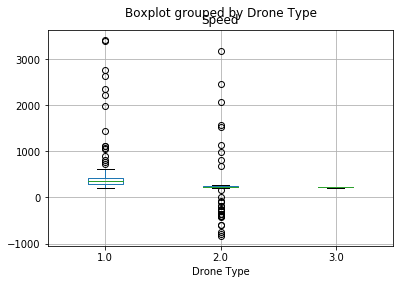

In [94]:
data.boxplot(column='Speed',by='Drone Type')

If we were to look at the distribution for <b>Speed</b>, the means across the 3 groups varies although type 2 and type 3 have rather close means. Type 1 has a max of 3426.3686 which highlights potential outlier as shown in the boxplot above, while Type 2 also has potential outliers with min at -835.9969 and max of 3182.6035. Type 3 seems to be correct without any errors.

In [95]:
data['Speed'].groupby(data['Drone Type']).describe()

,count,mean,std,min,25%,50%,75%,max
Drone Type,,,,,,,,
1.0,20098.0,367.801593,99.159380,198.159802,298.959331,358.005304,424.348117,3426.368660
2.0,11885.0,231.078605,52.532083,-835.996963,222.460379,229.886127,238.563759,3182.603500
3.0,7880.0,220.793658,2.219618,214.926407,219.281149,221.018024,222.513313,225.560449


Hence we recalculate the IQR and see if there are any possible outliers for each group.
From the boxplot above, we see that there are upper outliers in type 1 and possible lower and upper outlier in type 2.

For <b>Drone Type 1.0</b>:
Upper outlier if x > 424.348117 + 1.5 (424.348117 - 298.959331) = 612.4313

For <b>Drone Type 2.0</b>:
Lower outlier if x < 222.460379 - 1.5 (238.563759 - 222.460379) = 198.3053
Upper outlier if x > 238.563759 + 1.5 (238.563759 - 222.460379) = 262.7188

There's a total of 16 upper outliers in <b>Drone Type 1</b>.

In [96]:
# return number of upper outliers in Drone Type 1
print(len(data.loc[(data['Drone Type']==1.0)&(data['Speed']>612.4313),:]))
# return first 10 rows of upper outliers in Drone Type 1
data.loc[(data['Drone Type']==1.0)&(data['Speed']>612.4313),:].head()

16


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Speed
4773,ID1948889093,1.0,0.0,22.927,36.0,39.0,-37.712976,144.086838,-37.406452,146.941196,254.168,2018-06-23,04:13:17,210.33,7:43:36,185.66,3,3387.699869
4822,ID1500351959,1.0,0.0,15.794,47.0,25.0,-37.585890,146.120399,-38.514984,144.697624,162.019,2018-04-18,06:07:05,136.61,8:23:41,165.66,1,2224.030489
8805,ID1849769563,1.0,0.0,39.797,44.0,12.0,-37.842127,142.850590,-38.244700,142.995815,46.587,2018-06-13,15:10:36,44.27,15:54:52,162.65,2,765.949461
10888,ID1266664961,1.0,0.0,27.632,6.0,28.0,-37.154819,144.805283,-37.795790,143.337042,148.036,2018-01-27,14:07:37,147.65,16:35:16,135.32,2,731.325751
12986,ID1152327476,1.0,0.0,15.994,40.0,22.0,-38.926237,147.477080,-37.258451,145.444052,257.260,2018-07-05,07:39:54,212.81,11:12:42,165.64,1,3426.368660


There's a total of 31 outliers in <b>Drone Type 2</b>.

In [97]:
# return number of lower/upper outliers in Drone Type 2
print(len(data.loc[(data['Drone Type']==2.0)&((data['Speed']<198.3053)|(data['Speed']>262.7188)),:]))
# return first 10 rows of upper outliers in Drone Type 1
data.loc[(data['Drone Type']==2.0)&((data['Speed']<198.3053)|(data['Speed']>262.7188)),:].head(10)

31


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period,Speed
608,ID1545145710,2.0,0.0,13.030,15.0,17.0,-36.724311,145.274538,-38.089511,147.896434,277.188,2018-06-03,08:52:09,283.85,13:36:00,96.55,1,-592.733499
675,ID5447666321,2.0,1.0,11.236,47.0,25.0,-37.551698,145.993590,-38.624114,144.684870,165.521,2018-02-13,02:46:47,172.19,5:38:58,144.62,3,-269.809013
2629,ID1160540186,2.0,0.0,21.010,45.0,36.0,-36.573047,147.558778,-37.844065,144.211288,328.751,2018-03-13,14:56:02,335.42,20:31:27,104.73,2,-742.489654
2719,ID1291113648,2.0,0.0,16.073,30.0,3.0,-37.938188,144.619147,-37.296253,143.852088,98.390,2018-01-09,19:28:01,85.71,20:53:43,166.68,2,1141.559350
2762,ID1759410862,2.0,0.0,27.068,26.0,16.0,-36.871960,146.502690,-37.328824,148.349368,171.659,2018-05-13,08:20:49,178.33,11:19:08,84.62,1,-287.709196
6787,ID1698419144,2.0,0.0,9.369,41.0,11.0,-38.450142,146.904136,-38.670864,148.125647,109.127,2018-06-26,09:34:06,115.79,11:29:53,85.15,1,-106.126168
10835,ID1207579565,2.0,0.0,12.189,29.0,6.0,-38.543872,143.635730,-37.358469,144.831678,168.616,2018-05-14,14:39:41,175.28,17:34:57,95.26,2,-278.457020
10893,ID1269737063,2.0,0.0,22.589,31.0,45.0,-38.163675,148.312335,-36.517970,147.582075,194.259,2018-04-14,04:08:27,200.93,7:29:22,111.66,3,-353.154166
14948,ID1128358245,2.0,0.0,28.890,36.0,46.0,-37.824959,143.956631,-36.702382,145.901229,212.817,2018-06-03,09:09:21,219.48,12:48:49,88.44,1,-406.391165
15003,ID1327803113,2.0,0.0,24.008,39.0,28.0,-37.177043,146.815619,-37.686460,143.376803,309.197,2018-05-04,05:31:08,254.36,9:45:29,192.50,3,3182.603500


For the 47 outliers above, we suspect they might be classified wrongly for <b>Drone Type</b> since we have already <b>Journey Distance</b> in Section 4.11 and <b>Travel Time</b> in Section 4.14 to Section 4.16.

Hence, we will reassign the <b>Drone Type</b> column for these 47 rows using their <b>Journey Distance</b> and <b>Travel Time</b>.

We will use for loop to loop through each <b>Journey Distance</b> and <b>Travel Time</b>, and calculate 3 different set of (5 * takeoff speed + 5 * landing speed). Based on this 3 different values, we then return the <b>Drone Type</b> based on the most appropriate set of value.

In [98]:
# store the Journey Distance of these 47 rows in a list
temp_dist=data.loc[((data['Drone Type']==2.0)&((data['Speed']<198.3053)|(data['Speed']>262.7188)))|(data['Drone Type']==1.0)&(data['Speed']>612.4313),'Journey Distance'].tolist()
# store the Travel Time of these 47 rows in a list
temp_time=data.loc[((data['Drone Type']==2.0)&((data['Speed']<198.3053)|(data['Speed']>262.7188)))|(data['Drone Type']==1.0)&(data['Speed']>612.4313),'Travel Time'].tolist()
# create an empty list to store the new Drone Type
new_type=[]

# for loop to loop through the Journey Distance and Travel Time, and return the Drone Type based on formula to calculate Drone Type
for i in range(0,len(temp_dist)):
    temp=[]
    temp.append(60*temp_dist[i] - drone1_mean_speed*(temp_time[i]-10))
    temp.append(60*temp_dist[i] - drone2_mean_speed*(temp_time[i]-10))
    temp.append(60*temp_dist[i] - drone3_mean_speed*(temp_time[i]-10))
    if sorted(temp)[0]<0 and sorted(temp)[1]>200:
        next_min=sorted(temp)[1]
    elif sorted(temp)[0]<0 and sorted(temp)[2]>200:
        next_min=sorted(temp)[2]
    elif sorted(temp)[0]>200:
        next_min=sorted(temp)[0]
    if temp[0]==next_min:
        new_type.append(1.0)
    elif temp[1]==next_min:
        new_type.append(2.0)
    else:
        new_type.append(3.0)

# assign the new_type to the Drone Type of these 47 rows
data.loc[((data['Drone Type']==2.0)&((data['Speed']<198.3053)|(data['Speed']>262.7188)))|(data['Drone Type']==1.0)&(data['Speed']>612.4313),'Drone Type']=new_type

We then recalculate the column <b>Speed</b> and plot a boxplot to see if the 47 outliers have been fixed.

Looking at the boxplot, there are no possible outliers in <b>Drone Type</b>.

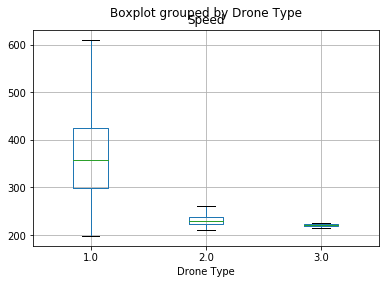

In [99]:
# recalculate column Speed
data['Speed']=data.apply(cal_speed,axis=1).astype(float)
# boxplot of Speed by Drone Type
data.boxplot(column='Speed',by='Drone Type')
# drop the column Speed
data=data.drop(['Speed'],1)

### 4.18 Drone Type (Coverage Error - Missing Values)

There were 10 missing values in <b>Drone Type</b> identified in EDA in Section 3. And in Section 4.1.7, we saw that each <b>Drone Type</b> have a unique range of <b>Speed</b> (takeoff + Landing) which is obtained by applying the formula in Section 4.17 on <b>Journey Distance</b> and <b>Travel Time</b>. 

We can use the similar method where we fixed the outliers in <b>Drone Type</b> in Section 4.1.7 by using each of their <b>Journey Distance</b> and <b>Travel Time</b> and calculate 3 different set of (5 * takeoff speed + 5 * landing speed). Based on this 3 different values, we then return the <b>Drone Type</b> based on the most appropriate set of value.

In [100]:
# calculate column Speed based on cal_speed function in Section 4.1.7
data['Speed']=data.apply(cal_speed,axis=1).astype(float)
# store the index of this rows in a variable so we can compare after making changes to them
missing_indexes=data.index[data['Drone Type'].isnull()].tolist()

# store the Journey Distance of these 10 rows in a list
temp_dist=data.loc[data['Drone Type'].isnull(),'Journey Distance'].tolist()
# store the Travel Time of these 10 rows in a list
temp_time=data.loc[data['Drone Type'].isnull(),'Travel Time'].tolist()
# create an empty list to store the imputed Drone Type
new_type=[]

# for loop to loop through the Journey Distance and Travel Time, and return the Drone Type based on formula to calculate Drone Type
for i in range(0,len(temp_dist)):
    temp=[]
    temp.append(60*temp_dist[i] - drone1_mean_speed*(temp_time[i]-10))
    temp.append(60*temp_dist[i] - drone2_mean_speed*(temp_time[i]-10))
    temp.append(60*temp_dist[i] - drone3_mean_speed*(temp_time[i]-10))
    if sorted(temp)[0]<0 and sorted(temp)[1]>200:
        next_min=sorted(temp)[1]
    elif sorted(temp)[0]<0 and sorted(temp)[2]>200:
        next_min=sorted(temp)[2]
    elif sorted(temp)[0]>200:
        next_min=sorted(temp)[0]
    if temp[0]==next_min:
        new_type.append(1.0)
    elif temp[1]==next_min:
        new_type.append(2.0)
    else:
        new_type.append(3.0)

new_type
# assign the new_type to the Drone Type of these 10 rows
data.loc[data['Drone Type'].isnull(),'Drone Type']=new_type
# drop columns 'Speed'
data=data.drop(['Speed'],1)
# return rows of imputed Drone Type
data.iloc[missing_indexes]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
2069,ID1462345606,2.0,0.0,23.654,5.0,23.0,-38.837863,145.343636,-36.535461,143.383261,309.029,2018-01-01,00:09:18,300.98,5:10:16,155.33,3
6154,ID5819965696,1.0,1.0,13.233,17.0,22.0,-38.168605,147.736135,-37.219100,145.654237,211.653,2018-07-06,12:02:45,218.32,15:41:04,138.34,2
12821,ID1708802693,3.0,0.0,22.115,11.0,41.0,-38.668510,148.217531,-38.579461,146.636029,137.894,2018-06-13,08:36:17,117.32,10:33:36,157.36,1
20488,ID1439190721,1.0,0.0,19.942,37.0,39.0,-38.869830,144.590200,-37.237169,146.909951,272.703,2018-03-19,21:08:25,279.37,1:47:47,121.63,3
24594,ID1569503884,1.0,0.0,9.129,47.0,28.0,-37.668596,145.907195,-37.815057,143.371568,223.791,2018-05-27,07:30:28,230.46,11:20:55,91.84,1
25260,ID1990409705,1.0,0.0,39.739,44.0,1.0,-37.803038,142.959113,-36.518467,146.794701,369.054,2018-02-28,19:46:52,375.72,2:02:35,116.40,2
26637,ID1596954083,2.0,0.0,30.613,33.0,1.0,-38.326182,145.893163,-36.577262,146.814315,211.014,2018-04-15,05:52:41,207.63,9:20:18,152.25,3
26638,ID1247032381,3.0,0.0,21.310,46.0,11.0,-36.554064,145.754257,-38.610994,148.199700,314.563,2018-02-17,04:08:47,258.65,8:27:25,191.50,3
28697,ID1787078954,3.0,0.0,9.990,32.0,16.0,-37.496991,146.344339,-37.463689,148.259536,169.220,2018-02-12,03:32:40,142.38,5:55:02,182.78,3
36184,ID1207184301,2.0,0.0,32.949,43.0,27.0,-37.802429,147.762804,-38.292287,145.018848,246.635,2018-03-06,14:59:58,241.56,19:01:31,142.69,2


### 4.19 Post Type (Coverage Error - Missing Values)

We saw in Section 3 that <b>Post Type</b> contains 20 missing values and in Section 3.3.6, we know that <b>Post Type</b> has some form of correlation with <b>Delivery Fare</b> as well as possibly <b>Time Period</b>, which was based on the company specific rule in the <b>Departure Time</b>.

In [101]:
data['Delivery Fare'].groupby([data['Post Type']]).mean()

Post Type
0.0    132.781496
1.0    170.767706
Name: Delivery Fare, dtype: float64

In [102]:
pd.crosstab(data['Time Period'],data["Post Type"],values=data['Delivery Fare'],aggfunc=np.mean)

Post Type,0.0,1.0
Time Period,,
1,119.480102,158.267155
2,130.832994,169.306281
3,143.680989,180.914877


Hence, we will impute the 20 missing <b>Post Type</b> by comparing their <b>Delivery Fare</b> as well as <b>Time Period</b>. For each <b>Time Period</b>, we will see it's <b>Delivery Fare</b> is closest to the mean of <b>Delivery Fare</b> in <b>Post Type 0.0</b> or <b>Post Type 1.0</b> and assign the missing values accordingly.

In [103]:
# store the index of this rows in a variable so we can compare after making changes to them
missing_indexes=data.index[data['Post Type'].isnull()].tolist()

# we first store the mean of 'Delivery Fare' across each 'Post Type' and 'Time Period' in a list    
fare_means=list(data['Delivery Fare'].groupby([data['Post Type'],data['Time Period']]).mean())
# we then create a list to store the 'Time Period' of the 20 rows with missing 'Post Type'
time_period_20=list(data.loc[(data['Post Type'].isnull()),'Time Period'])
# we then create another list to store the 'Delivery Fare' of the 20 rows with missing 'Delivery Fare'
delivery_fare_20=list(data.loc[(data['Post Type'].isnull()),'Delivery Fare'])
# we then loop through both list and assign 'Post Type' based on 'Time Period' and 'Delivery Fare'
result=[]
for i in range(0,len(time_period_20)):
    if time_period_20[i]==1.0:
        # post-type is 0.0 if it's delivery fare is closer to the mean of delivery fare when post type is 0.0 from the data
        if (abs(delivery_fare_20[i]-fare_means[0])) < (abs(delivery_fare_20[i]-fare_means[3])):
            result.append(0.0)
        # post-type is 1.0 if it's delivery fare is closer to the mean of delivery fare when post type is 1.0 from the data
        else:
            result.append(1.0)
    if time_period_20[i]==2.0:
        if (abs(delivery_fare_20[i]-fare_means[1])) < (abs(delivery_fare_20[i]-fare_means[4])):
            result.append(0.0)
        else:
            result.append(1.0)
    if time_period_20[i]==3.0:
        if (abs(delivery_fare_20[i]-fare_means[2])) < (abs(delivery_fare_20[i]-fare_means[5])):
            result.append(0.0)
        else:
            result.append(1.0)

# we can then assign the imputed 'Post Type' to the 20 missing rows
data.loc[(data['Post Type'].isnull()),'Post Type']=result
# note the 20 missing 'Post Type' has been imputed
data.iloc[missing_indexes].head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
149,ID5946616445,1.0,0.0,20.007,22.0,32.0,-37.278122,145.602276,-37.485853,146.210888,58.590,2018-07-13,10:19:16,65.26,11:24:31,109.41,1
519,ID1998063666,1.0,0.0,20.329,38.0,8.0,-38.136236,146.516555,-38.023297,145.637799,78.019,2018-06-20,04:06:13,84.69,5:30:54,102.47,3
5826,ID5584863608,2.0,1.0,9.971,19.0,10.0,-36.581643,148.082763,-37.408538,142.823433,476.499,2018-03-22,13:13:18,460.47,20:53:46,196.45,2
6262,ID5692647136,1.0,0.0,34.905,30.0,34.0,-37.849615,144.635766,-38.775806,143.043469,173.120,2018-04-23,11:01:38,179.79,14:01:25,127.59,1
8340,ID1968358153,2.0,0.0,11.169,13.0,30.0,-36.690979,144.288301,-37.788209,144.421484,122.709,2018-01-01,11:57:09,123.53,14:00:40,120.83,1
10379,ID1185547727,1.0,0.0,22.342,8.0,13.0,-38.085557,145.680695,-36.677874,144.249583,201.436,2018-03-17,23:40:22,208.10,3:08:27,111.96,3
12439,ID5118429958,1.0,0.0,18.291,1.0,27.0,-36.551788,146.963863,-38.078374,144.934320,247.298,2018-05-23,01:10:51,253.96,5:24:48,158.41,3
14701,ID1653877532,1.0,0.0,16.243,37.0,41.0,-38.960485,144.632002,-38.453157,146.693401,187.757,2018-06-22,09:21:41,194.42,12:36:06,90.68,1
16501,ID1463358225,2.0,1.0,12.435,7.0,10.0,-37.065065,147.575131,-37.298505,142.844234,420.337,2018-06-16,08:04:42,406.99,14:51:41,141.29,1
18554,ID1932017326,1.0,0.0,5.938,43.0,31.0,-37.696145,147.821712,-38.115847,148.269294,61.059,2018-03-19,15:36:40,67.73,16:44:23,86.92,2


### 4.20 Delivery Fare (Coverage Error - Missing Values)

We know from the EDA in Section 3 that <b>Delivery Fare</b> contains 30 missing values and from Section 3.1.3 that it contains 1 outlier, and the outlier happens in the group where <b>Package Weight</b> is greater than 46.0g.

We will look at whether the 30 missing values happen in any particular group (i.e. < 41.0g or > 46.0g in <b>Package Weight</b>) or does it happen generally across both groups.

Notice that all the 30 missing values belong to the group whereby <b>Package Weight</b> is less than 41.0g since an empty dataframe was returned for those with <b>Package Weight</b> above 46.0g and <b>Delivery Fare</b> is null.

In [104]:
data.loc[(data['Delivery Fare'].isnull()) & (data['Package Weight']>=46.0),:]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period


We were told in the description in Section 1 that <b>Delivery Fare</b> has a linear relation with some of the attributes of the dataset, and in Section 3.3, we discovered that <b>Delivery Fare</b> appears to have correlation with <b>Drone Type</b>, <b>Post Type</b>, <b>Package Weight</b>, <b>Journey Distance</b> and <b>Time Period</b>.

Hence, we try training a linear regression model using data containing only <b>Package Weight</b> < 41.0g to help us predict the 30 missing values in <b>Delivery Fare</b>.

Target Variable: <br>
<b>Delivery Fare</b>

Predictor Variable: <br>
<b>Drone Type</b><br>
<b>Post Type</b><br>
<b>Journey Distance</b><br>
<b>Package Weight</b><br>
<b>Time Period</b>
    
We will drop the 30 rows with missing values first in order to train the model. 

In [105]:
# create a copy of the data dataframe
lm_data=data.copy()

# extract data of Package Weight < 41.0 and the 6 columns for model fitting (39474 rows)
lm_data=lm_data.loc[data['Package Weight']<41.0,['Drone Type','Post Type','Journey Distance','Package Weight','Time Period','Delivery Fare']]
# drop the 30 NAN 'Delivery Fare' in order to fit the model (39444 rows)
lm_data_dropna=lm_data.dropna(subset=['Delivery Fare'])
# instantiate
lm_model_1=LinearRegression()
# fit the model using 'Drone Type','Post Type','Journey Distance','Package Weight','Time Period' and predict 'Delivery Fare'
lm_model_1.fit(lm_data_dropna[[x for x in lm_data_dropna.columns if x != 'Delivery Fare']],lm_data_dropna['Delivery Fare'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Once we have fitted the model, we do cross-validation by splitting our data into testing and training set. We can then examine the R-squared value of the linear model we have just fitted to see how well does the fitted linear model explains all the variability of the predictor data around its mean. A higher R-squared score (i.e. close to 1) means a better fit and more robust model.

We see that the R-squared for the fitted model is 0.9932 which is really close to 1, which indicates the model is a good fit and robust model.

In [106]:
# split the lm_data we used to fit the model into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lm_data_dropna.iloc[:,:-1],lm_data_dropna.iloc[:,-1:], random_state = 1)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
# we fit the model using the training data
model_full = lm_model_1.fit(X_train,y_train)
# we predict using the testing the data
predictions_full = lm_model_1.predict(X_test)
# compared the predicted value and compare with the true value to obtain R-square
print ('R-Squared for fitted model = ',model_full.score(X_test,y_test))

R-Squared for fitted model =  0.9931643695756964


If we were to look at the mean squared error which measures the average of the squares of the errors between predicted values and the true values, and the better the model, the closer it will be to zero [4]. 

The MSE of the model we just fitted is at 9.434

In [107]:
mean_squared_error(lm_data_dropna['Delivery Fare'], lm_model_1.predict(lm_data_dropna.drop(['Delivery Fare'],axis=1)))

9.43372726117052

To avoid the issue on overfitting, we can try looking at the coefficients of this regression model, we observed that <b>Journey Distance</b> and <b>Package Weight</b> does not actually affect <b>Delivery Fare</b> much.

0.0716 unit increase in <b>Journey Distance</b> leads to 1 unit increase in <b>Delivery Fare</b><br>
0.0810 unit increase in <b>Package Weight</b> leads to 1 unit increase in <b>Delivery Fare</b><br>

We can consider dropping them from our model.

In [108]:
pd.concat([pd.DataFrame(lm_data.columns[:-1]),pd.DataFrame(np.transpose(model_full.coef_))], axis = 1)

,0,0
0,Drone Type,37.868639
1,Post Type,38.020140
2,Journey Distance,0.071660
3,Package Weight,0.079285
4,Time Period,11.139441


Since all the 30 missing values belong to the group whereby <b>Package Weight</b> is less than 41.0g, we can try looking at the correlation matrix of data containing only <b>Package Weight</b> less than 41.0g, and see if the relationship between the variables with <b>Delivery Fare</b> which might possibly improve the model we just fitted.

Looking at the correlation matrix of data containing only <b>Package Weight</b> less than 41.0g, we see that <b>Delivery Fare</b> appears to have correlation with <b>Drone Type</b>, <b>Post Type</b>, <b>Journey Distance</b>, <b>Travel Time</b> and <b>Time Period</b>.

In [109]:
data.loc[data['Package Weight']<=41.0,:].corr()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Time Period
Drone Type,1.000000,0.003368,-0.004962,-0.007326,-0.004498,-0.005358,-0.003874,-0.007471,-0.004232,0.003818,-0.139909,0.813064,0.007566
Post Type,0.003368,1.000000,0.000022,-0.005308,-0.008967,0.005356,0.000949,-0.007218,-0.010896,0.009020,0.008369,0.478414,-0.004371
Package Weight,-0.004962,0.000022,1.000000,-0.001845,-0.002228,0.001406,-0.004699,-0.004490,-0.004611,0.002749,0.003624,0.019309,0.001334
Origin Region,-0.007326,-0.005308,-0.001845,1.000000,-0.002476,-0.083669,0.121748,-0.002960,-0.001266,-0.006846,-0.005625,-0.010758,-0.003362
Destination Region,-0.004498,-0.008967,-0.002228,-0.002476,1.000000,0.003713,0.002424,-0.069361,0.123013,0.005558,0.005280,-0.007359,0.000674
Origin Latitude,-0.005358,0.005356,0.001406,-0.083669,0.003713,1.000000,0.030611,0.000334,-0.004353,0.043234,0.043459,0.010134,0.007736
Origin Longitude,-0.003874,0.000949,-0.004699,0.121748,0.002424,0.030611,1.000000,-0.004259,0.004325,-0.000835,-0.000917,-0.002095,0.003716
Destination Latitude,-0.007471,-0.007218,-0.004490,-0.002960,-0.069361,0.000334,-0.004259,1.000000,0.034645,0.055280,0.056027,0.003156,0.000713
Destination Longitude,-0.004232,-0.010896,-0.004611,-0.001266,0.123013,-0.004353,0.004325,0.034645,1.000000,-0.001852,-0.000509,-0.010747,-0.006878
Journey Distance,0.003818,0.009020,0.002749,-0.006846,0.005558,0.043234,-0.000835,0.055280,-0.001852,1.000000,0.985434,0.227029,-0.000634


Hence, we train another linear regression model using a different set of features compared to the first model we just fitted.

Target Variable: <br>
<b>Delivery Fare</b>

Predictor Variable: <br>
<b>Drone Type</b><br>
<b>Post Type</b><br>
<b>Journey Distance</b><br>
<b>Travel Time</b><br>
<b>Time Period</b>
    
We will drop the 30 rows with missing values first in order to train the model. 

In [110]:
# create a copy of the data dataframe
lm_data_2=data.copy()

# extract data of Package Weight < 41.0 and the 6 columns for model fitting (39474 rows)
lm_data_2=lm_data_2.loc[lm_data_2['Package Weight']<41.0,['Drone Type','Post Type','Journey Distance','Travel Time','Time Period','Delivery Fare']]
# drop the 30 NAN 'Delivery Fare' in order to fit the model (39444 rows)
lm_data_dropna_2=lm_data_2.dropna(subset=['Delivery Fare'])
# instantiate
lm_model_2=LinearRegression()
# fit the model using 'Drone Type','Post Type','Journey Distance','Package Weight','Time Period' and predict 'Delivery Fare'
lm_model_2.fit(lm_data_dropna_2[[x for x in lm_data_dropna_2.columns if x != 'Delivery Fare']],lm_data_dropna_2['Delivery Fare'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Once we have fitted the model, we do cross-validation as carried out in the previous model above.

We see that the R-squared for the fitted model is 0.9926 which is really close to 1, which indicates the model is a good fit and robust model.

In [111]:
# split the lm_data_2 we used to fit the model into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lm_data_dropna_2.iloc[:,:-1],lm_data_dropna_2.iloc[:,-1:], random_state = 1)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
# we fit the model using the training data
model_full_2 = lm_model_2.fit(X_train,y_train)
# we predict using the testing the data
predictions_full_2 = lm_model_2.predict(X_test)
# compared the predicted value and compare with the true value to obtain R-square
print ('R-Squared for fitted model = ',model_full_2.score(X_test,y_test))

R-Squared for fitted model =  0.9926340911520507


The MSE of the model we just fitted is at 10.119

In [112]:
mean_squared_error(lm_data_dropna_2['Delivery Fare'], lm_model_2.predict(lm_data_dropna_2.drop(['Delivery Fare'],axis=1)))

10.118539011181731

And if we were to look at the coefficients of this regression model, we observed that <b>Journey Distance</b> and <b>Travel Time</b> does not actually affect <b>Delivery Fare</b> much.

0.0736 unit increase in <b>Journey Distance</b> leads to 1 unit increase in <b>Delivery Fare</b><br>
-0.00202 unit increase in <b>Travel Time</b> leads to 1 unit increase in <b>Delivery Fare</b><br>

We can consider dropping them in our final model.

In [113]:
pd.concat([pd.DataFrame(lm_data_2.columns[:-1]),pd.DataFrame(np.transpose(model_full_2.coef_))], axis = 1)

,0,0
0,Drone Type,37.826168
1,Post Type,38.016464
2,Journey Distance,0.073573
3,Travel Time,-0.002020
4,Time Period,11.138455


Comparing both models, the first model is slightly better with a higher R-Squared of 0.9943 and lower MSE of 9.434, compared to the second model of R-Squared at 0.9926 and MSE of 10.119.

However to avoid the issue on overfitting, when we look at the coefficients of both models, the variables that affect <b>Delivery Fare</b> more significantly are the same <b>Drone Type</b>, <b>Post Type</b> and <b>Time Period</b>.

Hence, we build our final model to impute the missing values based on:

Target Variable: <br>
<b>Delivery Fare</b>

Predictor Variable: <br>
<b>Drone Type</b><br>
<b>Post Type</b><br>
<b>Time Period</b>

In [114]:
# extract the indexes of the 30 missing 'Delivery Fare' based on the whole data
missing_indexes=data.index[data['Delivery Fare'].isnull()].tolist()
# extract data of Package Weight < 41.0 and the 4 columns for model fitting (39474 rows)
lm_data=data.loc[data['Package Weight']<41.0,['Drone Type','Post Type','Time Period','Delivery Fare']]
# reset the indexes of the extracted dataframe
lm_data=lm_data.reset_index(drop=True)
# extract the indexes of the 30 missing 'Delivery Fare' based on the extracted data
temp_missing_indexes=lm_data.index[lm_data['Delivery Fare'].isnull()].tolist()
# drop the 30 NAN 'Delivery Fare' in order to fit the model (39444 rows)
lm_data_dropna=lm_data.dropna(subset=['Delivery Fare'])
# instantiate
lm_model=LinearRegression()
# fit the model using 'Drone Type','Post Type','Journey Distance','Package Weight','Time Period' and predict 'Delivery Fare'
lm_model.fit(lm_data_dropna[[x for x in lm_data_dropna.columns if x != 'Delivery Fare']],lm_data_dropna['Delivery Fare'])

# predict the 30 missing values of 'Delivery Fare' using the fitted model
lm_data['Delivery Fare'][lm_data['Delivery Fare'].isnull()] = lm_model.predict(lm_data.drop(['Delivery Fare'],axis=1))
# assign the 30 imputed 'Delivery Fare' into overall dataframe data based on the indexes
data.loc[data['Delivery Fare'].isnull(),'Delivery Fare']=np.around(lm_data.iloc[temp_missing_indexes,3].tolist(),2)
# print out the first 10 rows with imputed 'Delivery Fare'
data.iloc[missing_indexes].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
157,ID5856246662,2.0,1.0,31.202,20.0,23.0,-37.674438,146.957276,-36.634606,143.450860,331.901,2018-05-08,23:55:57,322.76,5:18:42,188.33,3
162,ID1734904335,3.0,0.0,29.444,19.0,25.0,-36.582414,148.170933,-38.631799,144.828361,372.692,2018-05-26,01:53:24,305.15,6:58:32,188.09,3
178,ID5518421682,1.0,1.0,40.629,29.0,21.0,-38.354040,143.764234,-38.873079,146.876889,276.820,2018-04-15,19:49:53,283.49,0:33:22,139.30,2
6339,ID1825525091,3.0,0.0,26.252,29.0,18.0,-38.596025,143.590203,-36.799783,142.989894,206.824,2018-04-16,16:17:37,172.46,19:10:04,176.98,2
8391,ID5445721091,1.0,1.0,12.309,45.0,15.0,-36.671059,147.505034,-36.712920,145.269623,199.584,2018-03-21,20:13:02,206.25,23:39:17,139.30,2
10644,ID5936797835,1.0,1.0,22.055,3.0,43.0,-37.359626,143.915275,-37.828341,147.698120,337.687,2018-01-19,03:51:33,344.35,9:35:54,150.41,3
11636,ID5342249658,1.0,1.0,33.335,46.0,32.0,-36.593894,145.948725,-37.381362,146.542787,102.343,2018-02-25,21:52:39,109.01,23:41:39,150.41,3
12491,ID5174763492,2.0,1.0,28.569,28.0,15.0,-37.731530,143.555255,-36.623198,145.241575,193.880,2018-06-07,01:52:01,191.31,5:03:19,188.33,3
14492,ID1968697382,1.0,0.0,25.373,33.0,5.0,-38.393136,145.905456,-38.904243,145.379460,72.994,2018-05-06,19:26:50,79.66,20:46:29,101.14,2
16590,ID1317956875,2.0,0.0,25.424,22.0,40.0,-37.299180,145.447517,-38.846406,147.576801,253.917,2018-06-28,21:36:55,248.49,1:45:24,150.17,3


### 4.21 Delivery Fare (Syntactic Error - Outliers)

There is one instance of outlier in <b>Delivery Fare</b> (i.e. <b>Delivery Fare</b> > 1146.596) that we have yet to replace/remove. As discussed in Section 4.20, the outlier came from the group whereby <b>Package Weight</b> is greater than 46.0g. Instead of removing the outlier straightaway, we can try imputing the value so that we will keep as much data as possible. One way to do this is as per Section 4.20, where we trained a linear regression model to impute the missing values in <b>Delivery Fare</b>.

We first use the model using the features that we have identified in the EDA that is possibly correlated to <b>Delivery Fare</b> as a whole, and in Section 4.20, it was also observed that this model has a higher R-Squared value and lower MSE.

Hence, we try training a linear regression model using data containing only <b>Package Weight</b> > 46.0g to help us predict a new value for the outlier.

Target Variable: <br>
<b>Delivery Fare</b>

Predictor Variable: <br>
<b>Drone Type</b><br>
<b>Post Type</b><br>
<b>Journey Distance</b><br>
<b>Package Weight</b><br>
<b>Time Period</b>

We will drop the outlier row first in order to train a better and more robust model. 

In [115]:
# create a copy of the data dataframe
lm_data_3=data.copy()

# extract data of Package Weight > 46.0 and the 6 columns for model fitting (399 rows)
lm_data_3=lm_data_3.loc[lm_data_3['Package Weight']>46.0,['Drone Type','Post Type','Journey Distance','Package Weight','Time Period','Delivery Fare']]
# reset the indexes of the extracted dataframe
lm_data_3=lm_data_3.reset_index(drop=True)
# extract the index of the outlier in 'Delivery Fare' based on the extracted data
temp_outlier_index=lm_data_3.index[lm_data_3['Delivery Fare']>1146.596].tolist()
# drop the outlier row in order to fit the model (398 rows)
lm_data_dropoutlier=lm_data_3.drop(temp_outlier_index,axis=0)
# instantiate
lm_model_3=LinearRegression()
# fit the model using 'Drone Type','Post Type','Journey Distance','Package Weight','Time Period' and predict 'Delivery Fare'
lm_model_3.fit(lm_data_dropoutlier[[x for x in lm_data_dropoutlier.columns if x != 'Delivery Fare']],lm_data_dropoutlier['Delivery Fare'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Once we have fitted the model, we do cross-validation by splitting our data into testing and training set. We can then examine the R-squared value of the linear model we have just fitted to see how well does the fitted linear model explains all the variability of the predictor data around its mean. A higher R-squared score (i.e. close to 1) means a better fit and more robust model.

We see that the R-squared for the fitted model is 0.9992 which is really close to 1, which indicates the model is a good fit and robust model.

In [116]:
# split the lm_data_3 we used to fit the model into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lm_data_dropoutlier.iloc[:,:-1],lm_data_dropoutlier.iloc[:,-1:], random_state = 1)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
# we fit the model using the training data
model_full_3 = lm_model_3.fit(X_train,y_train)
# we predict using the testing the data
predictions_full_3 = lm_model_3.predict(X_test)
# compared the predicted value and compare with the true value to obtain R-square
print ('R-Squared for fitted model = ',model_full_3.score(X_test,y_test))

R-Squared for fitted model =  0.9992077768433323


The MSE of the model we just fitted is at 47.293

In [117]:
mean_squared_error(lm_data_dropoutlier['Delivery Fare'], lm_model_3.predict(lm_data_dropoutlier.drop(['Delivery Fare'],axis=1)))

47.2930719968176

And if we were to look at the coefficients of this regression model, we observed that for all the variables, an unit increase in them actually contribute a significant amount towards <b>Delivery Fare</b>.

In [118]:
pd.concat([pd.DataFrame(lm_data_3.columns[:-1]),pd.DataFrame(np.transpose(model_full_3.coef_))], axis = 1)

,0,0
0,Drone Type,37.773376
1,Post Type,37.501346
2,Journey Distance,1.977242
3,Package Weight,8.701096
4,Time Period,11.043735


Since the outlier row belong to the group whereby <b>Package Weight</b> is greater than 46.0g, we can try looking at the correlation matrix of data containing only <b>Package Weight</b> greater than 46.0g, and see if the relationship between the variables with <b>Delivery Fare</b> which might possibly improve the model we just fitted.

Looking at the correlation matrix of data containing only <b>Package Weight</b> greater than 46.0g, we see that <b>Delivery Fare</b> seems to have a really strong correlation with <b>Journey Distance</b> and <b>Travel Time</b> as the correlation coefficient is close to 1.0.

In [119]:
data.loc[data['Package Weight']>=46.0,:].corr()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,Time Period
Drone Type,1.000000,-0.035401,0.045355,-0.049098,0.053026,-0.022860,0.033757,-0.022897,0.003917,0.033900,-0.112734,0.164901,0.011758
Post Type,-0.035401,1.000000,-0.004629,0.007045,-0.048790,-0.034813,-0.000922,-0.017399,-0.014233,-0.041443,-0.032726,0.027091,-0.067964
Package Weight,0.045355,-0.004629,1.000000,0.030407,0.027634,-0.086665,-0.031076,0.023136,0.002928,-0.093480,-0.099323,-0.036513,-0.081619
Origin Region,-0.049098,0.007045,0.030407,1.000000,-0.073867,-0.103003,0.113631,-0.028394,-0.050660,-0.062349,-0.058700,-0.066138,0.022806
Destination Region,0.053026,-0.048790,0.027634,-0.073867,1.000000,0.054988,-0.012308,-0.125303,0.098755,-0.013913,-0.026556,-0.008798,-0.001962
Origin Latitude,-0.022860,-0.034813,-0.086665,-0.103003,0.054988,1.000000,-0.012815,0.086001,0.000086,0.129035,0.129209,0.118365,0.088472
Origin Longitude,0.033757,-0.000922,-0.031076,0.113631,-0.012308,-0.012815,1.000000,-0.043447,0.022380,0.083484,0.073361,0.085097,0.048236
Destination Latitude,-0.022897,-0.017399,0.023136,-0.028394,-0.125303,0.086001,-0.043447,1.000000,0.024742,0.108551,0.116370,0.104070,-0.014226
Destination Longitude,0.003917,-0.014233,0.002928,-0.050660,0.098755,0.000086,0.022380,0.024742,1.000000,-0.071669,-0.069912,-0.067536,0.040990
Journey Distance,0.033900,-0.041443,-0.093480,-0.062349,-0.013913,0.129035,0.083484,0.108551,-0.071669,1.000000,0.985082,0.986212,0.116905


Hence, we train another linear regression model using a different set of features compared to the first model we just fitted.

Target Variable: <br>
<b>Delivery Fare</b>

Predictor Variable: <br>
<b>Drone Type</b><br>
<b>Origin Latitude</b><br>
<b>Destination Latitude</b><br>
<b>Journey Distance</b><br>
<b>Travel Time</b><br>
<b>Time Period</b>
    
We will drop the row with outlier (i.e. <b>Delivery Fare > 1146.596) first in order to train the model. 

In [120]:
# create a copy of the data dataframe
lm_data_4=data.copy()

# extract data of Package Weight > 46.0 and the 7 columns for model fitting (399 rows)
lm_data_4=lm_data_4.loc[lm_data_4['Package Weight']>46.0,['Drone Type','Origin Latitude','Destination Latitude','Journey Distance','Travel Time','Time Period','Delivery Fare']]
# reset the indexes of the extracted dataframe
lm_data_4=lm_data_4.reset_index(drop=True)
# extract the index of the outlier in 'Delivery Fare' based on the extracted data
temp_outlier_index=lm_data_4.index[lm_data_4['Delivery Fare']>1146.596].tolist()
# drop the outlier row in order to fit the model (398 rows)
lm_data_dropoutlier_2=lm_data_4.drop(temp_outlier_index,axis=0)
# instantiate
lm_model_4=LinearRegression()
# fit the model using 'Drone Type','Origin Latitude','Destination Latitude','Journey Distance','Travel Time','Time Period' and predict 'Delivery Fare'
lm_model_4.fit(lm_data_dropoutlier_2[[x for x in lm_data_dropoutlier_2.columns if x != 'Delivery Fare']],lm_data_dropoutlier_2['Delivery Fare'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Once we have fitted the model, we do cross-validation like what we did in the previous model.

We see that the R-squared for the fitted model is 0.991 which is really close to 1, which indicates the model is a good fit and robust model.

In [121]:
# split the lm_data we used to fit the model into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lm_data_4.iloc[:,:-1],lm_data_4.iloc[:,-1:], random_state = 1)
map(pd.np.shape,[X_train, X_test, y_train, y_test])
# we fit the model using the training data
model_full_4 = lm_model_4.fit(X_train,y_train)
# we predict using the testing the data
predictions_full_4 = lm_model_4.predict(X_test)
# compared the predicted value and compare with the true value to obtain R-square
print ('R-Squared for fitted model = ',model_full_4.score(X_test,y_test))

R-Squared for fitted model =  0.9912621956551809


The MSE of the model we just fitted is at 476.83.

In [122]:
mean_squared_error(lm_data_dropoutlier_2['Delivery Fare'], lm_model_4.predict(lm_data_dropoutlier_2.drop(['Delivery Fare'],axis=1)))

476.82572100807334

And if we were to look at the coefficients of this regression model, we observed that <b>Origin Latitude</b>, <b>Destination Latitude</b>,<b>Journey Distance</b> and <b>Travel Time</b> does not actually affect <b>Delivery Fare</b> much.

-1.9098 unit increase in <b>Origin Latitude</b> leads to 1 unit increase in <b>Delivery Fare</b> <br>
-0.5079 unit increase in <b>Destination Latitude</b> leads to 1 unit increase in <b>Delivery Fare</b> <br>
1.9513 unit increase in <b>Journey Distance</b> leads to 1 unit increase in <b>Delivery Fare</b> <br>
0.01804 unit increase in <b>Travel Time</b> leads to 1 unit increase in <b>Delivery Fare</b> <br>

We can consider dropping them in our final model.

In [123]:
pd.concat([pd.DataFrame(lm_data_4.columns[:-1]),pd.DataFrame(np.transpose(model_full_4.coef_))], axis = 1)

,0,0
0,Drone Type,37.904630
1,Origin Latitude,-1.909880
2,Destination Latitude,-0.507948
3,Journey Distance,1.951331
4,Travel Time,0.018043
5,Time Period,9.348349


Comparing both models, the first model is slightly better with a higher R-Squared of 0.9992 and lower MSE of 47.293, compared to the second model of R-Squared at 0.9913 and MSE of 476.83.

However to avoid the issue on overfitting, when we look at the coefficients of both models, the variables that affect <b>Delivery Fare</b> more significantly are <b>Drone Type</b>, <b>Post Type</b> and <b>Time Period</b>. And looking at the correlation matrix, we know that <b>Travel Time</b> and <b>Journey Distance</b> are strongly correlated to <b>Delivery Fare</b> despite their coefficients in the models not being that significant.

Hence, we build our final model to impute the missing values based on:

Target Variable: <br>
<b>Delivery Fare</b>

Predictor Variable: <br>
<b>Drone Type</b><br>
<b>Post Type</b><br>
<b>Time Period</b>
<b>Travel Time</b>
<b>Journey Distance</b>

In [124]:
# extract the index of the outlier in 'Delivery Fare' based on the whole data
outlier_index=data.index[data['Delivery Fare']>1146.596].tolist()
# extract data of Package Weight > 46.0 and the 6 columns for model fitting (399 rows)
lm_data_3=data.loc[data['Package Weight']>46.0,['Drone Type','Post Type','Time Period','Journey Distance','Travel Time','Delivery Fare']]
# reset the indexes of the extracted dataframe
lm_data_3=lm_data_3.reset_index(drop=True)
# extract the index of the outlier in 'Delivery Fare' based on the extracted data
temp_outlier_index=lm_data_3.index[lm_data_3['Delivery Fare']>1146.596].tolist()
# drop the outlier row in order to fit the model (398 rows)
lm_data_dropoutlier=lm_data_3.drop(temp_outlier_index,axis=0)
# instantiate
lm_model_3=LinearRegression()
# fit the model using 'Drone Type','Origin Latitude','Destination Latitude',Journey Distance','Travel Time','Time Period' and predict 'Delivery Fare'
lm_model_3.fit(lm_data_dropoutlier[[x for x in lm_data_dropoutlier.columns if x != 'Delivery Fare']],lm_data_dropoutlier['Delivery Fare'])

# predict the value of 'Delivery Fare' in the outlier row using the fitted model
lm_data_3['Delivery Fare'][lm_data_3['Delivery Fare']>1146.596] = lm_model_3.predict(lm_data_3.drop(['Delivery Fare'],axis=1))
# assign the value of 'Delivery Fare' in the outlier row into overall dataframe data based on the index
data.loc[data['Delivery Fare']>1146.596,'Delivery Fare']=np.around(lm_data_3.iloc[temp_outlier_index,5].tolist(),2)
# print out the outlier row with imputed 'Delivery Fare'
data.iloc[outlier_index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Time Period
472,ID1183058545,2.0,0.0,49.724,34.0,19.0,-38.774657,143.177588,-36.588407,148.304793,512.972,2018-06-05,01:59:26,495.21,10:14:38,1142.12,3


We see now that the new value of <b>Delivery Fare</b> in the outlier row is 1142.12 which is lower than the limit of the upper outlier (1146.596). Hence, we keep this data row and not remove it after replacing it's value using linear regression model.

In [125]:
# drop column 'Time Period'
data=data.drop(['Time Period'],1)

In [126]:
# output final dataframe to csv
data.to_csv('29442826.csv',index=False)

## 5. Summary

Summarising the 21 errors that were found and fixed in this dataset:

Syntactic Errors
1. <b>Origin Latitude</b> - Positive value instead of negative value (Section 4.3)
2. <b>Origin Longitude</b> - Negative value instead of positive value (Section 4.4)
3. <b>Destination Latitude</b> - Positive value instead of negative value (Section 4.5)
4. <b>Destination Longitude</b> - Negative value instead of positive value (Section 4.6)
5. <b>Departure Date</b> - Inconsistent date format (yyyy-dd-mm instead of yyyy-mm-dd) (Section 4.12)
6. <b>Departure Date</b> - Invalid dates in 2018 (Section 4.13)
7. <b>Delivery Fare</b> - One outlier (Section 4.21)

Semantic Errors
1. <b>Id</b> - Duplicated values (Section 4.1)
2. <b>Departure Time</b> - Does not tally with <b>Travel Time</b> (Section 4.14)
3. <b>Delivery Time</b> - Does not tally with <b>Travel Time</b> (Section 4.15)
4. <b>Journey Distance</b> - Does not tally with <b>Origin/Destination Latitude/Longitude</b> based on haversine formula (Section 4.11)
5. <b>Origin Region</b> - Does not tally with <b>Origin Latitude</b> and <b>Origin Longitude</b> (Section 4.7)
6. <b>Destination Region</b> - Does not tally with <b>Destination Latitude</b> and <b>Destination Longitude</b> (Section 4.9)
7. <b>Drone Type</b> - Does not tally with calculated speed using <b>Journey Distance</b> and <b>Travel Time</b> (Section 4.17)

Coverage Errors
1. <b>Id</b> - 24 missing values (Section 4.2)
2. <b>Drone Type</b> - 10 missing values (Section 4.18)
3. <b>Post Type</b> - 20 missing values (Section 4.19)
4. <b>Origin Region</b> - 10 missing values (Section 4.8)
5. <b>Destination Region</b> - 10 missing values (Section 4.10)
6. <b>Travel Time</b> - 40 missing values (Section 4.16)
7. <b>Delivery Fare</b> - 30 missing values (Section 4.20)

Initial shape of dataset: 39933 rows, 16 columns
Final shape of dataset: 39873 rows, 16 columns (removal of 36 duplicated and 24 NAN <b>ID</b> rows)

## 6. References

[1] - https://en.wikipedia.org/wiki/Victoria_(Australia) <br>
[2] - http://www.howmanydaysin.com/ <br>
[3] - https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points <br>
[4] - https://en.wikipedia.org/wiki/Mean_squared_error